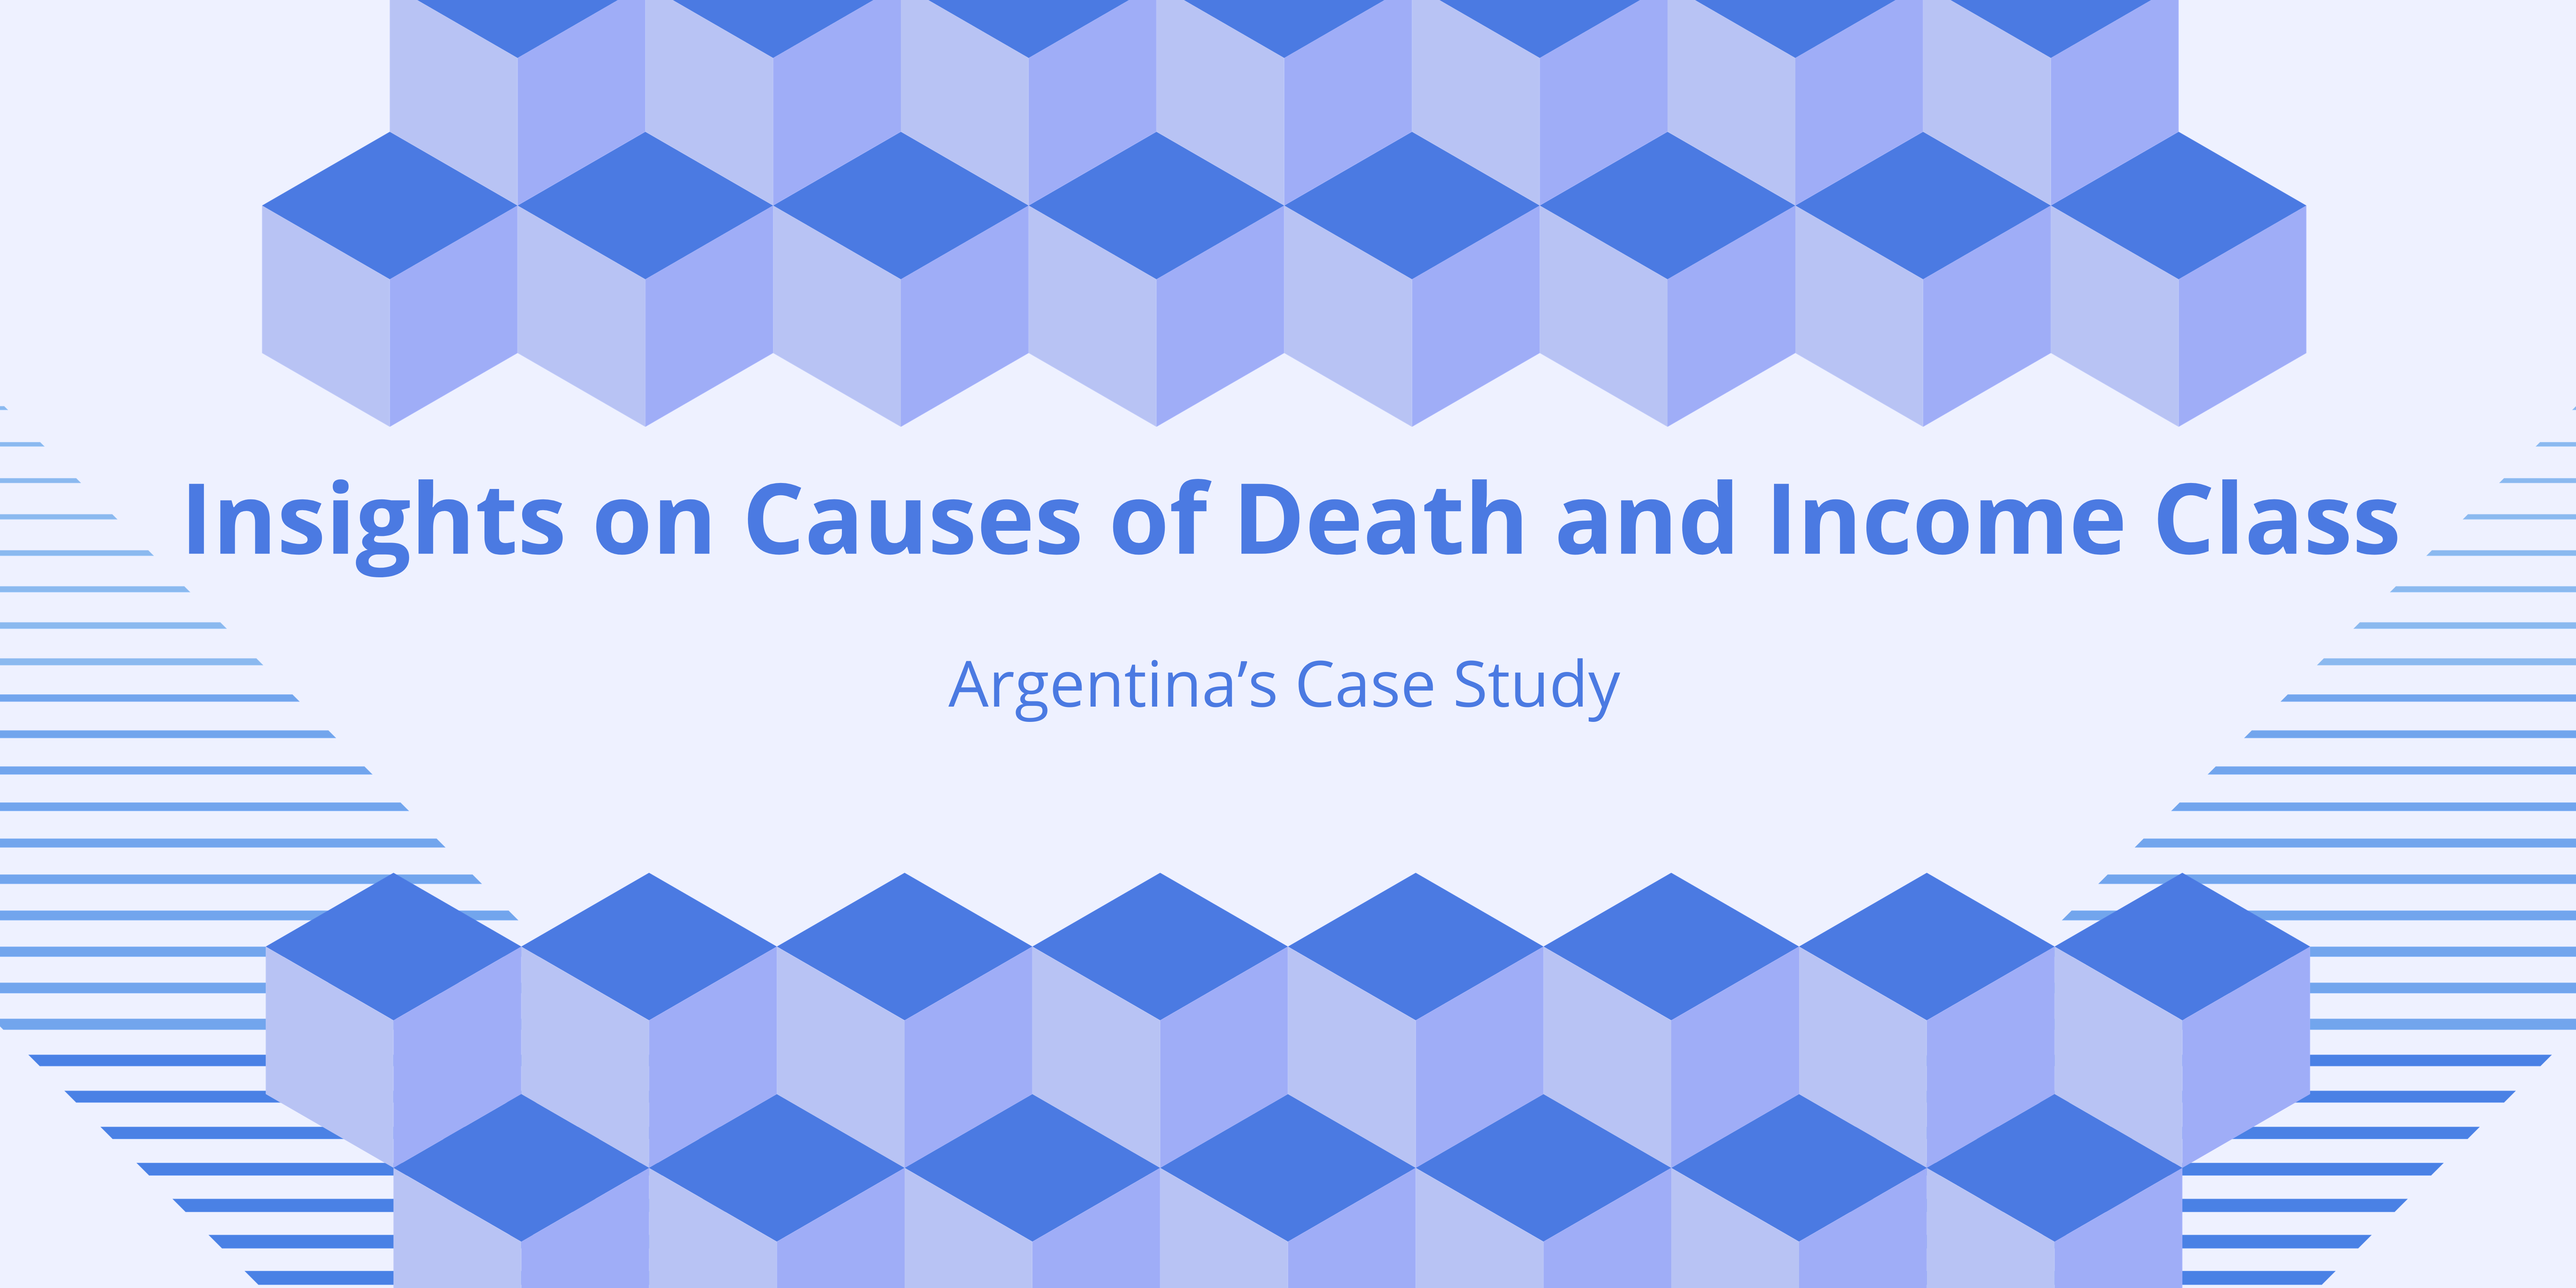

***
**Assignment made by: Guido Rocatti**

***
# $\color{blue}{\text{Table of Contents}}$

- ### Database Information & Source
- ### Introduction
- ### Objectives
- ### Data Preparation
    - #### Imports
    - #### Data Load
    - #### Data Formatting
- ### Exploratory Data Analyses
    - #### Global Scale
    - #### Income Classes
    - #### Argentina
    - #### Latin America & Caribbean
- ### Global Data & Trends
    - #### Total Number of Deaths by Cause
    - #### Cause of Death Rates
- ### Income Classes & Causes of Death
    - #### Cause of Death Rates
    - #### Comparing Causes of Death between Income Classes
- ### Argentina & Latin America
    - #### Argentina
    - #### Latin America & Caribbean
    - #### Argentina, Latin America & Caribbean and High Income Countries
- ### Conclusions


***

***
# $\color{blue}{\text{Database Information & Source}}$
***

For this assignment I have selected a database that gathers data from the most recent publication of the **2019 Global Burden of Disease study by the Institute for Health Metrics and Evaluation (IHME)**, and the **Global Terrorism Database**.

It includes the records for **31 different causes of death**, organized by country (and other entities) and by year, covering the period between **1990 and 2019**.

Each death was assigned a single cause, based on data on the ‘underlying cause of death’ listed on death certificates, verbal autopsies, and statistical modeling. This is a simplification, as people often have multiple diseases or injuries that contribute to their death, which may also be listed on death certificates.

This is a very rich database which could allow us to address an enormous amount of subjects and trends on causes of death at a worldwide scale. For this reason, here I will explore only a portion of these subjects.


**Source**: https://ourworldindata.org/causes-of-death?insight=death-rates-from-communicable-and-non-communicable-disease-vary-widely-around-the-world#key-insights



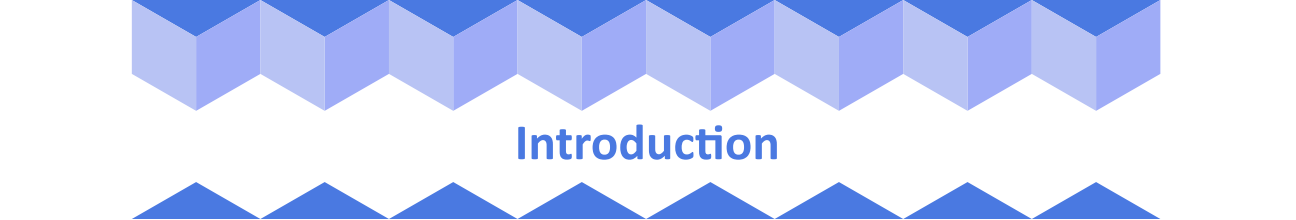

The continuously widening gap between the developed countries and the poorest communities of the developing world has been a central issue over the last decades. This gap affects several aspects beyond economic indicators like the income level. Among other issues, the **gap between high- and low-income countries** has been pointed out as one of the factors associated with the prevalence of different **causes of death**. According to several studies and reports from [scientists](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7124315/) or organizations such as the [WHO](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries#:~:text=More%20than%2090%25%20of%20road,involved%20in%20road%20traffic%20crashes), the UN and the [World Bank](https://www.worldbank.org/en/news/press-release/2018/01/09/road-deaths-and-injuries-hold-back-economic-growth-in-developing-countries), countries with low income show a higher prevalence of deaths caused by **infections, malnutrition, perinatal inconvenients and traffic-related injuries**. Worse living conditions like low access to safe drinking water and difficulties to access basic health services and nutrition security tend to be tightly related to infections or nutritional deficiencies. 93% of the world's fatalities on the road occur in low- and middle-income countries, even though these have more than half of the world's vehicles. One of the goals of the present work is to examine possible associations between the income level and these causes of death. Is the difference between the prevalence of these type of deaths in high- and low-income countries significant?

I will also study a particular case. Although **Argentina** was not a high-income country in the past three decades, and in spite of the subsequent economic crises this country went through, its public health service and policies are renowned as one of the best in the Latin American region. Here, I will explore if the death causes of Argentina coincide with those of high-income countries and those of the **Latin American and Caribbean** region as a whole. And how these causes trends behaved along the last thirty years.

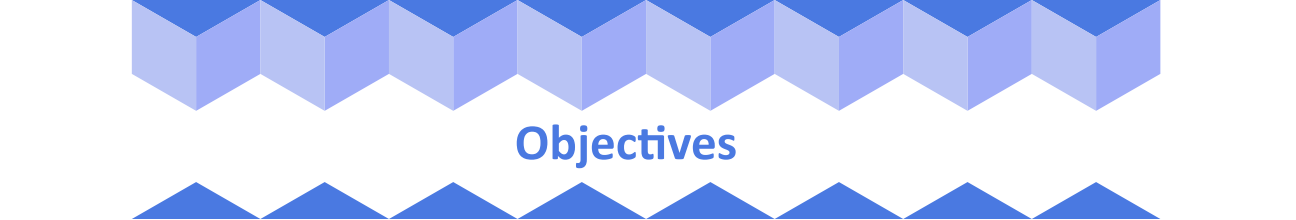


- **a)** Explore from a wide scope which are the trends of death causes.


- **b)** Examine possible associations between the income level and distinct death causes (i.e. road injuries, infections, malnutrition, dementias).


- **c)** Analyze the main causes of death in Argentina and how are these related to those of the rest of the Latin American region and to high income countries.





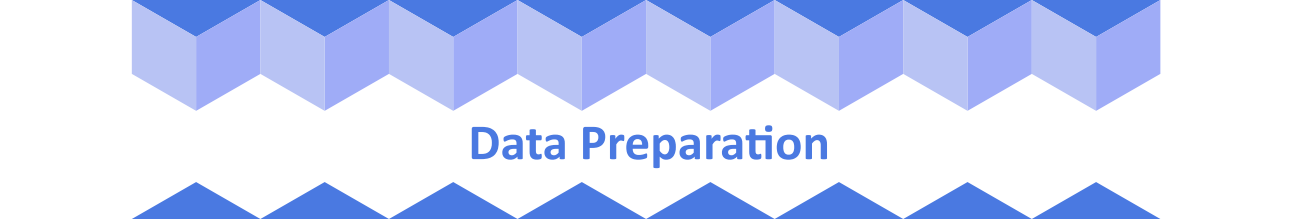

## $\color{blue}{\text{Imports}}$
***

In [134]:
# Data processing and formatting
import pandas as pd
import numpy as np
import time

# Maps and geo data
import geopandas as gpd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import squarify

# Statistics
from scipy.stats import mannwhitneyu


## $\color{blue}{\text{Data Load}}$
***

In [2]:
data = pd.read_csv('annual-number-of-deaths-by-cause.csv', sep = ',')

## $\color{blue}{\text{Data Formatting}}$
***

### Data shape

In [3]:
data.shape

(6840, 34)

### Data Preview

In [4]:
data.head(3)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                               2159          
1                                               2218          
2                                               2475          

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
0                                               1116                                       
1                                               1136                                       
2                                               1162                                       

   Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
0                                                371                   
1                                                374                   
2                                                378                   

   Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
0                                               2087                        
1                                               2153                        
2                                               2441                        

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                 93       
1                                                189       
2                                                239       

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
0                                               1370        
1                                               1391        
2                                               1514        

   Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  ...  \
0                                               1538                     ...   
1                                               2001                     ...   
2                                               2299                     ...   

   Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)  \
0                                               2108                 
1                                               2120                 
2                                               2153                 

   Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)  \
0                                               3709                      
1                                               3724                      
2                                               3776                      

   Deaths - Poisonings - Sex: Both - Age: All Ages (Number)  \
0                                                338          
1                                                351          
2                                                386          

   Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)  \
0                                               2054                           
1                                               2119                           
2                                               2404                           

   Deaths - Road injuries - Sex: Both - Age: All Ages (Number)  \
0                                               4154             
1                                               4472             
2                                               5106             

   Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)  \
0                                               5945                            
1                                               6050                            
2                                               6223                            

   Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)  \
0                      

In [5]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)',
       'Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (

### Changing and Simplifying Column Names

Column names are unnecessarily complex, though informative. So I will split and simplify the names. From this moment on, I'll consider all features as an overall for both sexes and all ages.

In [6]:
columns_to_skip = ['Entity', 'Code', 'Year'] # I don't want to change the first column names

for column in data.columns:
    if column not in columns_to_skip:
        if '-' in column:
            new_column_name = column.split('-')[1].strip() # Keeping only the 2nd segment after the first hyphen
            data.rename(columns={column: new_column_name}, inplace=True) # Renaming the column using 2nd segment
        else:
            new_column_name = column.strip()
            data.rename(columns={column: new_column_name}, inplace=True) # Just in case

In [7]:
# Making some specific column names shorter
data.rename(columns={'Cirrhosis and other chronic liver diseases': 'Liver diseases'}, inplace=True)
data.rename(columns={'Environmental heat and cold exposure': 'Heat/Cold Exposure'}, inplace=True)
data.rename(columns={"Alzheimer's disease and other dementias": "Alzheimer's/Other dementias"}, inplace=True)
data.rename(columns={"Lower respiratory infections": "Respiratory infections"}, inplace=True)
data.rename(columns={"Chronic respiratory diseases": "Chronic respiratory"}, inplace=True)
data.rename(columns={"Exposure to forces of nature": "Forces of Nature"}, inplace=True)

In [8]:
# Checking new column names
data.columns

Index(['Entity', 'Code', 'Year', 'Meningitis', 'Alzheimer's/Other dementias',
       'Parkinson's disease', 'Nutritional deficiencies', 'Malaria',
       'Drowning', 'Interpersonal violence', 'Maternal disorders', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Cardiovascular diseases',
       'Respiratory infections', 'Neonatal disorders', 'Alcohol use disorders',
       'Self', 'Forces of Nature', 'Diarrheal diseases', 'Heat/Cold Exposure',
       'Neoplasms', 'Conflict and terrorism', 'Diabetes mellitus',
       'Chronic kidney disease', 'Poisonings', 'Protein', 'Road injuries',
       'Chronic respiratory', 'Liver diseases', 'Digestive diseases',
       'Fire, heat, and hot substances', 'Acute hepatitis'],
      dtype='object')

### Checking Data Types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entity                          6840 non-null   object
 1   Code                            6150 non-null   object
 2   Year                            6840 non-null   int64 
 3   Meningitis                      6840 non-null   int64 
 4   Alzheimer's/Other dementias     6840 non-null   int64 
 5   Parkinson's disease             6840 non-null   int64 
 6   Nutritional deficiencies        6840 non-null   int64 
 7   Malaria                         6840 non-null   int64 
 8   Drowning                        6840 non-null   int64 
 9   Interpersonal violence          6840 non-null   int64 
 10  Maternal disorders              6840 non-null   int64 
 11  HIV/AIDS                        6840 non-null   int64 
 12  Drug use disorders              6840 non-null   

### Checking Null Instances

In [10]:
data.isnull().sum()

Entity                              0
Code                              690
Year                                0
Meningitis                          0
Alzheimer's/Other dementias         0
Parkinson's disease                 0
Nutritional deficiencies            0
Malaria                             0
Drowning                            0
Interpersonal violence              0
Maternal disorders                  0
HIV/AIDS                            0
Drug use disorders                  0
Tuberculosis                        0
Cardiovascular diseases             0
Respiratory infections              0
Neonatal disorders                  0
Alcohol use disorders               0
Self                                0
Forces of Nature                    0
Diarrheal diseases                  0
Heat/Cold Exposure                  0
Neoplasms                           0
Conflict and terrorism              0
Diabetes mellitus                   0
Chronic kidney disease              0
Poisonings  

- All null cases belong to the 'Code' column. I will now explore which entities should these missing codes refer to.

In [11]:
data[data['Code'].isnull()].Entity.value_counts()

African Region (WHO)                  30
Region of the Americas (WHO)          30
World Bank Lower Middle Income        30
World Bank Low Income                 30
World Bank High Income                30
Western Pacific Region (WHO)          30
Wales                                 30
Sub-Saharan Africa (WB)               30
South-East Asia Region (WHO)          30
South Asia (WB)                       30
Scotland                              30
OECD Countries                        30
East Asia & Pacific (WB)              30
Northern Ireland                      30
North America (WB)                    30
Middle East & North Africa (WB)       30
Latin America & Caribbean (WB)        30
G20                                   30
European Region (WHO)                 30
Europe & Central Asia (WB)            30
England                               30
Eastern Mediterranean Region (WHO)    30
World Bank Upper Middle Income        30
Name: Entity, dtype: int64

Analyzing the data, I realize that most of the null cases in the "Code" variable correspond to different major geographical regions or international organizations (i.e. 'Europe'; 'Latin America and the Caribbean';'G20'). I find this information useful, so I have decided to separate the data in two distinct dataframes: one for the original country scale data, and the second one for a regional scopus. Keeping the original dataframe as it is would affect posterior results, and in a certain way, it would mean the repetition of information, since the regional and organizations' data already include data from each country.

Moreover, three countries do not possess a code: England, Scotland and Wales. So before I continue with the process of splitting the data, I will assign a unique code for each of these countries.

### Assigning Missing Codes to Three Countries

In [12]:
#Before starting this process I always prefer to make a copy of my data
data1 = data

In [13]:
#Assigning codes for England, Scotland and Wales
pd.options.mode.chained_assignment = None  # default='warn'

for n in range(len(data.Entity)):
    if data1['Entity'][n] == 'England':
        data1['Code'][n] = 'ENG'
    elif data1['Entity'][n] == 'Scotland':
        data1['Code'][n] = 'SCO'
    elif data1['Entity'][n] == 'Wales':
        data1['Code'][n] = 'WAL'

In [14]:
data1[data1['Code'].isnull()].Entity.value_counts()

African Region (WHO)                  30
East Asia & Pacific (WB)              30
World Bank Lower Middle Income        30
World Bank Low Income                 30
World Bank High Income                30
Western Pacific Region (WHO)          30
Sub-Saharan Africa (WB)               30
South-East Asia Region (WHO)          30
South Asia (WB)                       30
Region of the Americas (WHO)          30
OECD Countries                        30
Northern Ireland                      30
North America (WB)                    30
Middle East & North Africa (WB)       30
Latin America & Caribbean (WB)        30
G20                                   30
European Region (WHO)                 30
Europe & Central Asia (WB)            30
Eastern Mediterranean Region (WHO)    30
World Bank Upper Middle Income        30
Name: Entity, dtype: int64

In [15]:
#Checking the codes were correctly assigned
data1.loc[data['Entity']=='England'].head()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
1800  England  ENG  1990         446                        15700   
1801  England  ENG  1991         442                        16078   
1802  England  ENG  1992         395                        16461   
1803  England  ENG  1993         398                        16881   
1804  England  ENG  1994         392                        17204   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
1800                 4098                       167        0       363   
1801                 4122                       164        0       347   
1802                 4116                       161        0       331   
1803                 4132                       160        0       317   
1804                 4084                       152        0       309   

      Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
1800                     472  ...               6727                    3995   
1801                     466  ...               6703                    3834   
1802                     480  ...               6588                    3655   
1803                     581  ...               6386                    3727   
1804                     585  ...               6129                    3659   

      Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
1800         227       70           4763                31523            3949   
1801         228       69           4544                31635            4025   
1802         228       69           4278                31648            4119   
1803         239       68           4084                32029            4286   
1804         239       67           3918                31557            4413   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
1800               17533                             626               19  
1801               17682                             605               19  
1802               17861                             581               19  
1803               18179                             566               19  
1804               18277                             656               19  

[5 rows x 34 columns]

In [16]:
data1.loc[data['Entity']=='Scotland'].head()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
5160  Scotland  SCO  1990          52                         1430   
5161  Scotland  SCO  1991          53                         1467   
5162  Scotland  SCO  1992          48                         1507   
5163  Scotland  SCO  1993          51                         1546   
5164  Scotland  SCO  1994          46                         1574   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
5160                  374                        21        0        50   
5161                  374                        20        0        48   
5162                  380                        20        0        46   
5163                  388                        19        0        43   
5164                  381                        18        0        42   

      Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
5160                      83  ...                559                     563   
5161                      80  ...                555                     557   
5162                      92  ...                556                     552   
5163                      97  ...                562                     562   
5164                     101  ...                548                     545   

      Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
5160          32        9            603                 3221             597   
5161          32        8            571                 3235             612   
5162          32        8            538                 3293             637   
5163          32        8            510                 3414             684   
5164          31        8            484                 3362             721   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
5160                2026                              90                2  
5161                2042                              87                2  
5162                2092                              83                2  
5163                2169                              81                2  
5164                2194                              76                2  

[5 rows x 34 columns]

In [17]:
data1.loc[data['Entity']=='Wales'].head()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
6540  Wales  WAL  1990          27                          958   
6541  Wales  WAL  1991          27                          993   
6542  Wales  WAL  1992          25                         1031   
6543  Wales  WAL  1993          26                         1065   
6544  Wales  WAL  1994          25                         1093   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
6540                  245                        12        0        23   
6541                  248                        11        0        23   
6542                  252                        11        0        22   
6543                  256                        11        0        21   
6544                  255                        10        0        21   

      Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
6540                      30  ...                427                     281   
6541                      30  ...                425                     267   
6542                      32  ...                425                     255   
6543                      34  ...                412                     257   
6544                      36  ...                399                     253   

      Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
6540          16        5            273                 2096             247   
6541          16        5            261                 2112             253   
6542          16        5            253                 2142             261   
6543          17        5            245                 2183             276   
6544          17        4            235                 2168             288   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
6540                1035                              41                1  
6541                1043                              39                1  
6542                1071                              38                1  
6543                1101                              38                1  
6544                1123                              36                1  

[5 rows x 34 columns]

### Splitting the data frame in two

In [18]:
# Extracting nulls from original dataframe into a new regional scale data frame.
regional_data = data1[data1['Code'].isnull()]

In [19]:
# Checking new dataframe's shape. It should contain the same number of rows as null cases
regional_data.shape

(600, 34)

In [20]:
# Previewing regional dataframe
regional_data.head()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
30  African Region (WHO)  NaN  1990      172206                        24312   
31  African Region (WHO)  NaN  1991      174087                        25173   
32  African Region (WHO)  NaN  1992      178190                        26141   
33  African Region (WHO)  NaN  1993      179299                        27051   
34  African Region (WHO)  NaN  1994      178971                        28014   

    Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
30                 6573                    215934   588508     27182   
31                 6754                    216068   607330     27357   
32                 6988                    217480   620445     27469   
33                 7182                    217090   638935     27435   
34                 7414                    215874   650973     27428   

    Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
30                   50714  ...              74790                   64609   
31                   52671  ...              76945                   66230   
32                   56013  ...              79846                   68274   
33                   59415  ...              81711                   69626   
34                   58643  ...              84769                   71447   

    Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
30       17453   208628         130403               123351          119201   
31       17461   208785         132658               125505          121587   
32       17712   210192         136413               128229          124268   
33       17734   209852         136847               129724          126184   
34       17835   208675         139782               132378          128478   

    Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
30              198446                           19552            17666  
31              202452                           19696            17844  
32              207105                           20040            18069  
33              210463                           20066            18164  
34              214555                           20307            18447  

[5 rows x 34 columns]

In [21]:
#Removing null cases from country dataframe.
country_data = data1.dropna(subset=['Code'])
country_data.shape

(6240, 34)

In [22]:
country_data.tail()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
6835  Zimbabwe  ZWE  2015        1439                          754   
6836  Zimbabwe  ZWE  2016        1457                          767   
6837  Zimbabwe  ZWE  2017        1460                          781   
6838  Zimbabwe  ZWE  2018        1450                          795   
6839  Zimbabwe  ZWE  2019        1450                          812   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
6835                  215                      3019     2518       770   
6836                  219                      3056     2050       801   
6837                  223                      2990     2116       818   
6838                  227                      2918     2088       825   
6839                  232                      2884     2068       827   

      Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
6835                    1302  ...               3176                    2108   
6836                    1342  ...               3259                    2160   
6837                    1363  ...               3313                    2196   
6838                    1396  ...               3381                    2240   
6839                    1434  ...               3460                    2292   

      Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
6835         381     2990           2373                 2751            1956   
6836         393     3027           2436                 2788            1962   
6837         398     2962           2473                 2818            2007   
6838         400     2890           2509                 2849            2030   
6839         405     2855           2554                 2891            2065   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
6835                4202                             632              146  
6836                4264                             648              146  
6837                4342                             654              144  
6838                4377                             657              139  
6839                4437                             662              136  

[5 rows x 34 columns]

In a more advanced stage of this project I found out that some rows were apparently taking into account values corresponding to the world as a whole. So I should move those 30 rows from the country dataframe to the regional dataframe. I will use pandas concat() function to achieve this.

In [23]:
#country_data.loc[country_data['Code'] == 'OWID_WRL']

In [24]:
# Select specific rows from country_data
world_rows = country_data.loc[country_data['Code'] == 'OWID_WRL']

# Concatenate regional_data and the selected rows
regional_data = pd.concat([regional_data, world_rows], ignore_index=True)

regional_data.Entity.value_counts()

African Region (WHO)                  30
Region of the Americas (WHO)          30
World Bank Upper Middle Income        30
World Bank Lower Middle Income        30
World Bank Low Income                 30
World Bank High Income                30
Western Pacific Region (WHO)          30
Sub-Saharan Africa (WB)               30
South-East Asia Region (WHO)          30
South Asia (WB)                       30
OECD Countries                        30
East Asia & Pacific (WB)              30
Northern Ireland                      30
North America (WB)                    30
Middle East & North Africa (WB)       30
Latin America & Caribbean (WB)        30
G20                                   30
European Region (WHO)                 30
Europe & Central Asia (WB)            30
Eastern Mediterranean Region (WHO)    30
World                                 30
Name: Entity, dtype: int64

In [25]:
regional_data.shape

(630, 34)

In [26]:
# Removing 'World' rows from country_data dataframe

indices_to_remove = country_data[country_data['Code'] == 'OWID_WRL'].index

country_data.drop(indices_to_remove, inplace=True)

In [27]:
country_data.shape

(6210, 34)

### Formatting International Organizations' and Regional Data

- #### Dropping 'Code' empty column

In [28]:
regional_data.drop('Code',axis = 1, inplace=True)

- #### Checking final Entity values

In [29]:
regional_data['Entity'].value_counts()

African Region (WHO)                  30
Region of the Americas (WHO)          30
World Bank Upper Middle Income        30
World Bank Lower Middle Income        30
World Bank Low Income                 30
World Bank High Income                30
Western Pacific Region (WHO)          30
Sub-Saharan Africa (WB)               30
South-East Asia Region (WHO)          30
South Asia (WB)                       30
OECD Countries                        30
East Asia & Pacific (WB)              30
Northern Ireland                      30
North America (WB)                    30
Middle East & North Africa (WB)       30
Latin America & Caribbean (WB)        30
G20                                   30
European Region (WHO)                 30
Europe & Central Asia (WB)            30
Eastern Mediterranean Region (WHO)    30
World                                 30
Name: Entity, dtype: int64

- #### Resetting Index

In [30]:
regional_data.reset_index(inplace=True)

In [31]:
# Dropping previous index column
regional_data.drop('index',axis = 1, inplace=True)

- #### Adding 'Total Deaths' New Column

In [32]:
columns_to_sum = regional_data.iloc[:, 2:34]

# Sum across the rows (axis=1)
row_sums = columns_to_sum.sum(axis=1)

# Agrega la nueva columna al final del DataFrame
regional_data['Total Deaths'] = row_sums

In [33]:
regional_data.tail()

Entity  Year  Meningitis  Alzheimer's/Other dementias  \
625  World  2015      267947                      1395701   
626  World  2016      261408                      1452620   
627  World  2017      250281                      1510447   
628  World  2018      241812                      1569449   
629  World  2019      236222                      1623276   

     Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
625               321963                    278979   703065    254407   
626               330916                    273382   660569    248984   
627               339540                    267638   629854    242003   
628               351517                    258265   631744    240434   
629               362907                    251577   643381    237242   

     Interpersonal violence  Maternal disorders  ...  Chronic kidney disease  \
625                  417393              208626  ...                 1287809   
626                  413573              203912  ...                 1325894   
627                  418221              199369  ...                 1352271   
628                  420305              198237  ...                 1388601   
629                  415180              196471  ...                 1427232   

     Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
625       81013   237901        1202132              3692439         1385734   
626       79987   232715        1194268              3742353         1404943   
627       78518   227199        1189003              3797538         1426787   
628       77847   218382        1196641              3888249         1448499   
629       77162   212242        1198289              3974315         1472012   

     Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  \
625             2405760                          110255            88786   
626             2441045                          109936            84761   
627             2479463                          109262            82507   
628             2516671                          110739            80924   
629             2557689                          111292            79176   

     Total Deaths  
625      51886332  
626      52367811  
627      52820613  
628      53576403  
629      54394314  

[5 rows x 34 columns]

- The final shape of the regional data frame is: 600 rows and 34 columns

- #### Checking Duplicates

In [34]:
regional_data.duplicated().any()

False

The regional data frame has no duplicate cases

### Formatting Country Data

- #### Resetting Index

In [35]:
country_data.reset_index(inplace=True)

In [36]:
# Dropping previous index column
country_data.drop('index',axis = 1, inplace=True)

In [37]:
country_data.tail()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
6205  Zimbabwe  ZWE  2015        1439                          754   
6206  Zimbabwe  ZWE  2016        1457                          767   
6207  Zimbabwe  ZWE  2017        1460                          781   
6208  Zimbabwe  ZWE  2018        1450                          795   
6209  Zimbabwe  ZWE  2019        1450                          812   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
6205                  215                      3019     2518       770   
6206                  219                      3056     2050       801   
6207                  223                      2990     2116       818   
6208                  227                      2918     2088       825   
6209                  232                      2884     2068       827   

      Interpersonal violence  ...  Diabetes mellitus  Chronic kidney disease  \
6205                    1302  ...               3176                    2108   
6206                    1342  ...               3259                    2160   
6207                    1363  ...               3313                    2196   
6208                    1396  ...               3381                    2240   
6209                    1434  ...               3460                    2292   

      Poisonings  Protein  Road injuries  Chronic respiratory  Liver diseases  \
6205         381     2990           2373                 2751            1956   
6206         393     3027           2436                 2788            1962   
6207         398     2962           2473                 2818            2007   
6208         400     2890           2509                 2849            2030   
6209         405     2855           2554                 2891            2065   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  
6205                4202                             632              146  
6206                4264                             648              146  
6207                4342                             654              144  
6208                4377                             657              139  
6209                4437                             662              136  

[5 rows x 34 columns]

- #### Checking Duplicates

In [38]:
country_data.duplicated().any()

False

The countries data frame has no duplicate cases.

- #### Adding 'Total Deaths' New Column

I want to add an extra column at the end of the dataframe with the total sum of each row (total deaths per country per year)

In [39]:
columns_to_sum = country_data.iloc[:, 3:35]

# Sum across the rows (axis=1)
row_sums = columns_to_sum.sum(axis=1)

# Adding Total Deaths column at the end of the data frame
country_data['Total Deaths'] = row_sums

In [40]:
country_data.tail()

Entity Code  Year  Meningitis  Alzheimer's/Other dementias  \
6205  Zimbabwe  ZWE  2015        1439                          754   
6206  Zimbabwe  ZWE  2016        1457                          767   
6207  Zimbabwe  ZWE  2017        1460                          781   
6208  Zimbabwe  ZWE  2018        1450                          795   
6209  Zimbabwe  ZWE  2019        1450                          812   

      Parkinson's disease  Nutritional deficiencies  Malaria  Drowning  \
6205                  215                      3019     2518       770   
6206                  219                      3056     2050       801   
6207                  223                      2990     2116       818   
6208                  227                      2918     2088       825   
6209                  232                      2884     2068       827   

      Interpersonal violence  ...  Chronic kidney disease  Poisonings  \
6205                    1302  ...                    2108         381   
6206                    1342  ...                    2160         393   
6207                    1363  ...                    2196         398   
6208                    1396  ...                    2240         400   
6209                    1434  ...                    2292         405   

      Protein  Road injuries  Chronic respiratory  Liver diseases  \
6205     2990           2373                 2751            1956   
6206     3027           2436                 2788            1962   
6207     2962           2473                 2818            2007   
6208     2890           2509                 2849            2030   
6209     2855           2554                 2891            2065   

      Digestive diseases  Fire, heat, and hot substances  Acute hepatitis  \
6205                4202                             632              146   
6206                4264                             648              146   
6207                4342                             654              144   
6208                4377                             657              139   
6209                4437                             662              136   

      Total Deaths  
6205        130080  
6206        128274  
6207        126515  
6208        123506  
6209        123540  

[5 rows x 35 columns]

- The final shape of the country data frame is: 6240 rows and 35 columns

### Creating New Dataframes with Death Rates for each Cause

#### Since the original dataset contains absolute frequencies of the number of deaths for each cause, it is not methodologically appropriate to compare these numbers between different countries, for their population size varies. Thanks to the fact that I have already added a new column with the total number of deaths for each row, I can now estimate the death rates for each cause. Using the number of deaths for each cause per 100k deaths would allow me to compare with distinct cases.

In [41]:
#Death Rates per country new dataframe

# Creating new Data Frame for death rates per 100,000 deaths
country_rates_df = country_data[['Entity', 'Code', 'Year']].copy()

# Calculate death rates per 100,000 deaths for each cause
for cause_column in country_data.columns[3:-1]:  # Excluding the first 3 and the last column
    country_rates_df[f'{cause_column}/100k'] = round(((country_data[cause_column] / country_data['Total Deaths']) * 100000), 2)

In [42]:
print(f"Number of rows in new dataframe: {country_rates_df.shape[0]}")
print(f"Number of columns in new dataframe: {country_rates_df.shape[1]}")

Number of rows in new dataframe: 6210
Number of columns in new dataframe: 34


In [43]:
#Death Rates per region/organization/class new dataframe

# Creating new DataFrame for death rates per 100,000 deaths
regional_rates_df = regional_data[['Entity', 'Year']].copy()

# Calculate death rates per 100,000 deaths for each cause
for cause_column in regional_data.columns[2:-1]:  # Excluding the first 2 and the last column
    regional_rates_df[f'{cause_column}/100k'] = round(((regional_data[cause_column] / regional_data['Total Deaths']) * 100000), 2)

In [44]:
print(f"Number of rows in new dataframe: {regional_rates_df.shape[0]}")
print(f"Number of columns in new dataframe: {regional_rates_df.shape[1]}")

Number of rows in new dataframe: 630
Number of columns in new dataframe: 33


### Creating New Dataframes for High- and Low-Income Classes

**The regional and other entities dataframe already contains data about causes of death organized by the World Bank's income classification. I will now extract the data related to High and Low Income classes.**

In [45]:
# High Income Countries Causes of Death
high_income = regional_data[regional_data['Entity'].isin(['World Bank High Income'])].copy()
high_income.shape

(30, 34)

In [46]:
# High Income Countries Death Rates per Cause
hi_income_rates = regional_rates_df[regional_rates_df['Entity'].isin(['World Bank High Income'])].copy()
hi_income_rates.shape

(30, 33)

In [47]:
# Low Income Countries Causes of Death
low_income = regional_data[regional_data['Entity'].isin(['World Bank Low Income'])].copy()
low_income.shape

(30, 34)

In [48]:
# Low Income Countries Death Rates per Cause
lo_income_rates = regional_rates_df[regional_rates_df['Entity'].isin(['World Bank Low Income'])].copy()
lo_income_rates.shape

(30, 33)

### Creating New Dataframes for Argentine Data

In [49]:
arg_causes = country_data[country_data['Entity'] == 'Argentina']
#arg_causes.describe().T.sort_values('max', ascending = False)
arg_causes.shape

(30, 35)

In [50]:
arg_drates = country_rates_df[country_rates_df['Entity'] == 'Argentina']
arg_drates.shape

(30, 34)

### Creating New Dataframes for Latin America and the Caribbean Data

In [51]:
latam_causes = regional_data[regional_data['Entity'].isin(['Latin America & Caribbean (WB)'])].copy()
#latam_causes.describe().T.sort_values('max', ascending = False)
latam_causes.shape

(30, 34)

In [52]:
latam_drates = regional_rates_df[regional_rates_df['Entity'].isin(['Latin America & Caribbean (WB)'])].copy()
#latam_drates.describe().T.sort_values('mean', ascending = False)
latam_drates.shape

(30, 33)

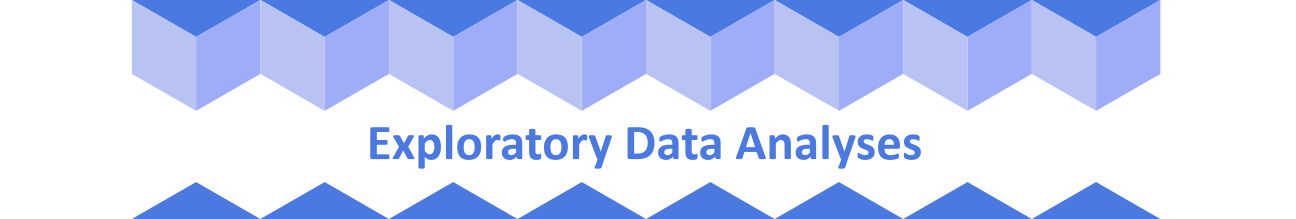

## $\color{blue}{\text{Global Scale}}$
***

### Descriptive Statistics

In [53]:
(country_rates_df.loc[:, country_rates_df.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False)

count      mean       std      min  \
Cardiovascular diseases/100k         6210.0  31360.64  14297.59  1455.93   
Neoplasms/100k                       6210.0  15965.38   9301.90   631.13   
Respiratory infections/100k          6210.0   6139.59   3780.66     0.00   
Neonatal disorders/100k              6210.0   4868.31   4639.89     0.00   
Digestive diseases/100k              6210.0   4446.36   1613.50     0.00   
Chronic respiratory/100k             6210.0   4365.19   2587.89   380.70   
Diabetes mellitus/100k               6210.0   3601.63   3341.70   196.82   
HIV/AIDS/100k                        6210.0   3402.13   7852.94     0.00   
Diarrheal diseases/100k              6210.0   3352.90   4799.37     0.00   
Road injuries/100k                   6210.0   2695.14   2640.88     0.00   
Chronic kidney disease/100k          6210.0   2516.62   1697.63     0.00   
Liver diseases/100k                  6210.0   2506.08   1292.02     0.00   
Tuberculosis/100k                    6210.0   2278.77   2808.23     0.00   
Alzheimer's/Other dementias/100k     6210.0   2113.76   1683.43     0.00   
Year                                 6210.0   2004.50      8.66  1990.00   
Malaria/100k                         6210.0   1974.86   4416.05     0.00   
Self/100k                            6210.0   1438.40   1113.49     0.00   
Interpersonal violence/100k          6210.0   1108.79   1685.13     0.00   
Nutritional deficiencies/100k        6210.0    959.57   1633.55     0.00   
Protein/100k                         6210.0    902.67   1600.45     0.00   
Meningitis/100k                      6210.0    712.23    993.99     0.00   
Drowning/100k                        6210.0    630.70    519.99     0.00   
Parkinson's disease/100k             6210.0    525.80    347.38     0.00   
Maternal disorders/100k              6210.0    519.47    644.00     0.00   
Conflict and terrorism/100k          6210.0    398.04   2631.83     0.00   
Alcohol use disorders/100k           6210.0    336.16    470.46     0.00   
Fire, heat, and hot substances/100k  6210.0    288.96    292.90     0.00   
Poisonings/100k                      6210.0    146.53    134.42     0.00   
Acute hepatitis/100k                 6210.0    142.16    225.75     0.00   
Drug use disorders/100k              6210.0    124.22    238.53     0.00   
Forces of Nature/100k                6210.0     90.96   1253.62     0.00   
Heat/Cold Exposure/100k              6210.0     88.00    169.07     0.00   

                                          25%       50%       75%       max  
Cardiovascular diseases/100k         20018.71  32487.91  40783.05  68904.32  
Neoplasms/100k                        8127.48  14553.89  22934.41  43859.65  
Respiratory infections/100k           3192.78   5206.07   8459.20  22881.47  
Neonatal disorders/100k                608.73   3487.48   8117.62  22077.45  
Digestive diseases/100k               3296.38   4213.08   5196.00  11436.99  
Chronic respiratory/100k              2380.76   3731.74   5745.33  21890.41  
Diabetes mellitus/100k                1376.14   2416.08   4445.49  24098.91  
HIV/AIDS/100k                           67.70    390.76   2252.40  56951.04  
Diarrheal diseases/100k                196.24    803.47   5072.57  25519.57  
Road injuries/100k                    1325.07   1973.16   3154.80  22037.93  
Chronic kidney disease/100k           1265.25   2034.88   3465.81  11908.66  
Liver diseases/100k                   1685.39   2170.96   3014.48  10349.57  
Tuberculosis/100k                      219.98    851.86   3911.10  13500.16  
Alzheimer's/Other dementias/100k       702.90   1678.77   3080.38  12036.59  
Year                                  1997.00   2004.50   2012.00   2019.00  
Malaria/100k                             0.00      0.00    625.52  24632.29  
Self/100k                              733.63   1148.58   1840.15  12839.51  
Interpersonal violence/100k            255.35    584.83   1182.85  18446.24  
Nutritional deficiencies/100k           65.81  

The previous table shows us central tendency and dispersion measures of the cause of death rates, considering all countries and years. These are some aspects that can be highlighted:

- **Cardiovascular diseases** are, by far, the cause with the **highest rate**, with a mean of 31360.64/100k deaths. Nevertheless, this death cause rate also shows a **wide range** of values, and an **apparent normal distribution behavior**, as the median (separating both halves of our instances) is close to the mean.
- Cardiovascular diseases mean rate is followed by **Neoplasms** (15965.38 deaths/100k, approximately half of that of cardiovascular issues) and **Respiratory infections** (6139.59 deaths/100k).
- **6 out of the top 10 death causes** highest mean rates show a **minimum value of zero**. This could presumably mean that more than half of the top death causes are **controlled or eradicated in some countries**.
- 3 out of all death causes present a **median of value zero**. These correspond to death causes referring to **isolated events** (like natural disasters, terrorist attacks and wars) or to **endemic diseases** like malaria, which is mostly limited to the tropics.
- The **lowest death mean rate** is shown by the exposure to **extreme temperatures** cause.

In [54]:
#(country_data.loc[:, country_data.columns != 'Total Deaths'].describe().round(2).T).sort_values('max', ascending=False, inplace=False)

### Boxplots - Top 10 Global Death Causes Rates

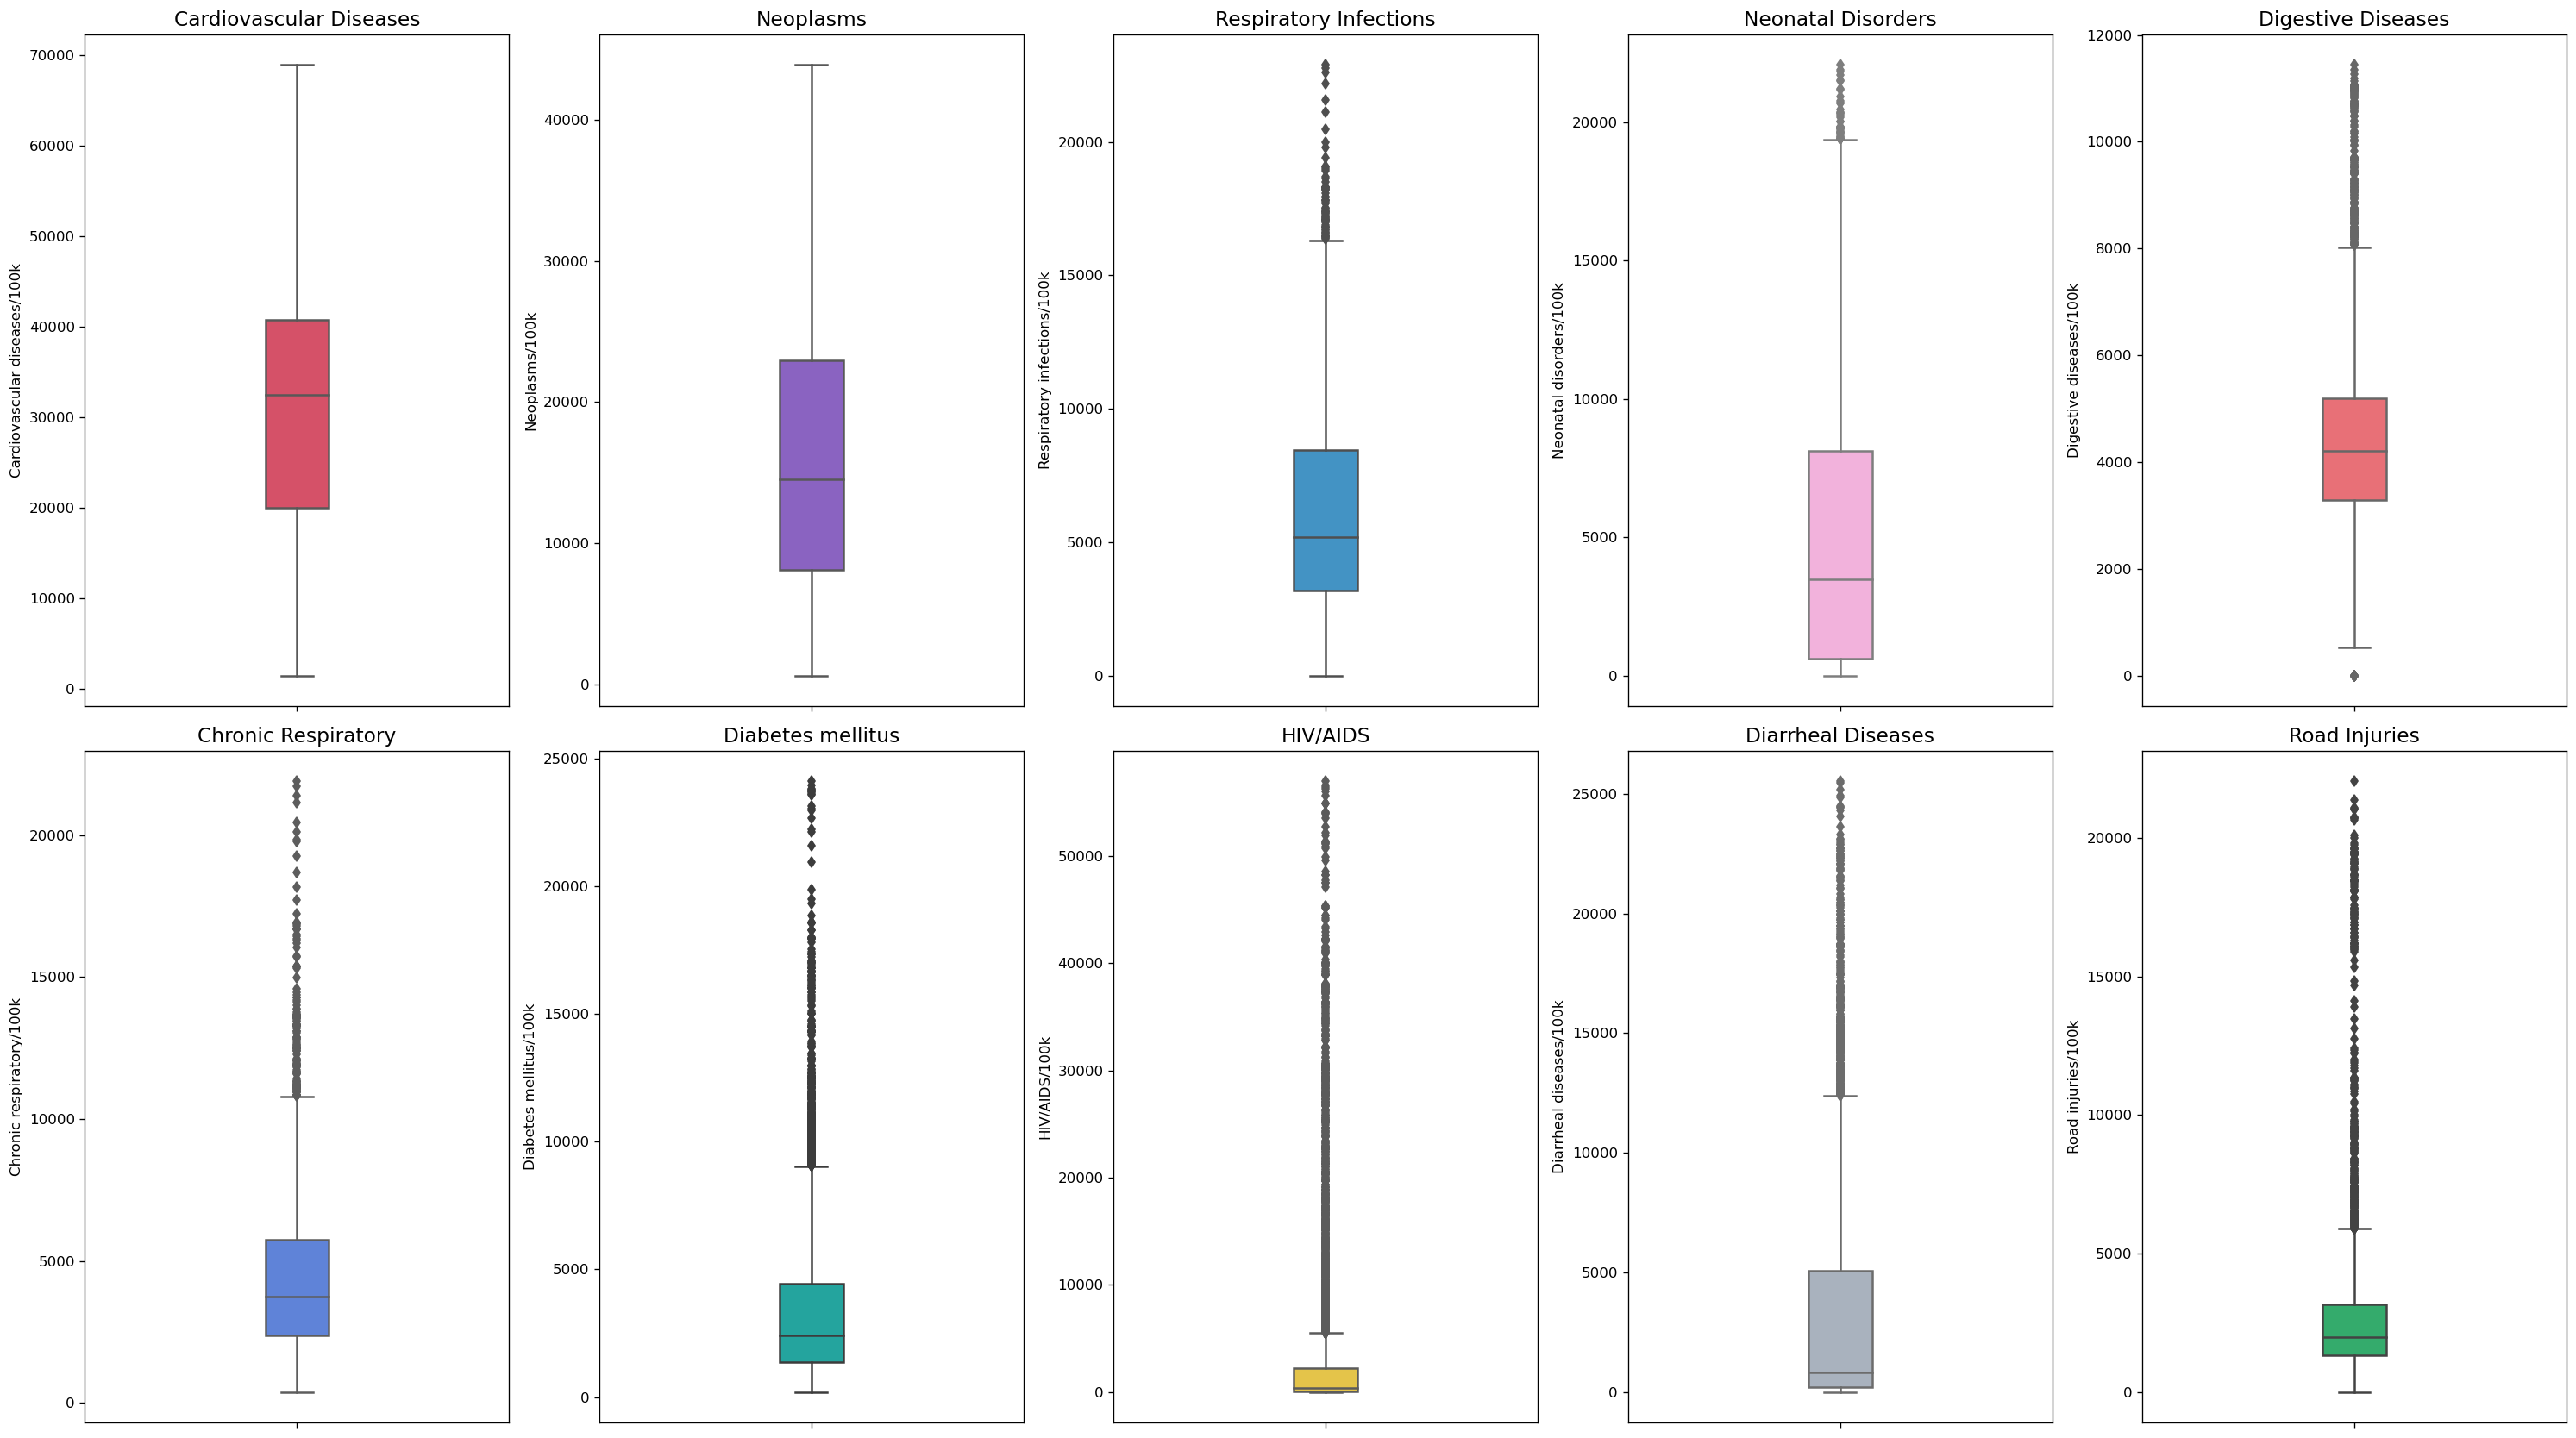

In [55]:
fig, ax = plt.subplots(nrows=2,ncols=5,dpi=120,figsize = (25,14))

ax[0,0].set_title('Cardiovascular Diseases',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Cardiovascular diseases/100k'], data=country_rates_df, color='#eb3b5a', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Neoplasms',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Neoplasms/100k'], data=country_rates_df, color='#8854d0', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Respiratory Infections',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Respiratory infections/100k'], data=country_rates_df, color='#2d98da', width = 0.15, ax = ax[0,2])

ax[0,3].set_title('Neonatal Disorders',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Neonatal disorders/100k'], data=country_rates_df, color='#FDA7DF', width = 0.15, ax = ax[0,3])

ax[0,4].set_title('Digestive Diseases',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Digestive diseases/100k'], data=country_rates_df, color='#fc5c65', width = 0.15, ax = ax[0,4])

ax[1,0].set_title('Chronic Respiratory',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Chronic respiratory/100k'], data=country_rates_df, color='#4b7bec', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('Diabetes mellitus',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Diabetes mellitus/100k'], data=country_rates_df, color='#0fb9b1', width = 0.15, ax = ax[1,1])

ax[1,2].set_title('HIV/AIDS',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['HIV/AIDS/100k'], data=country_rates_df, color='#fed330', width = 0.15, ax = ax[1,2])

ax[1,3].set_title('Diarrheal Diseases',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Diarrheal diseases/100k'], data=country_rates_df, color='#a5b1c2', width = 0.15, ax = ax[1,3])

ax[1,4].set_title('Road Injuries',fontdict={'fontsize':14})
sns.boxplot(y = country_rates_df['Road injuries/100k'], data=country_rates_df, color='#20bf6b', width = 0.15, ax = ax[1,4])


plt.tight_layout()
plt.show()


#### These boxplots show us that cardiovascular diseases and neoplasms death rates have most of the observations gathered in a notably wide range of values, showing no outliers. Conversely, the rest of the global top 10 causes of death rates display a narrower dispersion, presenting a big amount of outliers. This means that most of the observations were located closer to the center, while a minor portion of these had extreme values, as seen for example in HIV/AIDS or Road Injuries boxplots. Although it may seem like most of their observations had extremely high rates, the upper bigot of the boxplot indicates us that 95% of the observations are below that line.

### Histograms - Top 10 Global Death Causes Rates

array([[<Axes: title={'center': 'Cardiovascular diseases/100k'}>,
        <Axes: title={'center': 'Neoplasms/100k'}>,
        <Axes: title={'center': 'Respiratory infections/100k'}>],
       [<Axes: title={'center': 'Neonatal disorders/100k'}>,
        <Axes: title={'center': 'Digestive diseases/100k'}>,
        <Axes: title={'center': 'Chronic respiratory/100k'}>],
       [<Axes: title={'center': 'Diabetes mellitus/100k'}>,
        <Axes: title={'center': 'HIV/AIDS/100k'}>,
        <Axes: title={'center': 'Diarrheal diseases/100k'}>],
       [<Axes: title={'center': 'Road injuries/100k'}>, <Axes: >,
        <Axes: >]], dtype=object)

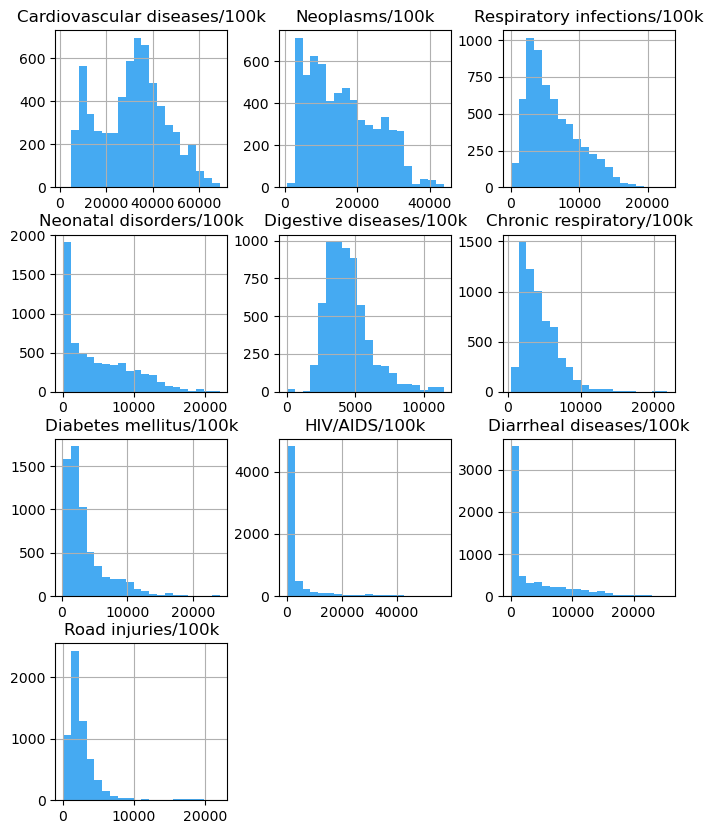

In [56]:
global_top_col = ['Cardiovascular diseases/100k','Neoplasms/100k','Respiratory infections/100k','Neonatal disorders/100k','Digestive diseases/100k',
                 'Chronic respiratory/100k','Diabetes mellitus/100k','HIV/AIDS/100k','Diarrheal diseases/100k','Road injuries/100k']
country_rates_df[global_top_col].hist(bins=20, figsize=(8,10), color = '#45aaf2')

#### Observing these histograms it is possible to confirm what was seen in the boxplots, where most of the observations in each death cause actually corresponded to low rates, while some outliers showed extreme death rate values. An exception to this could be de cardiovascular diseases histogram, where we can see that it resembles a normal distribution, displaying the highest frequencies close to the intermediate values.

### Heatmap - Correlation between Top 10 Global Death Causes Rates

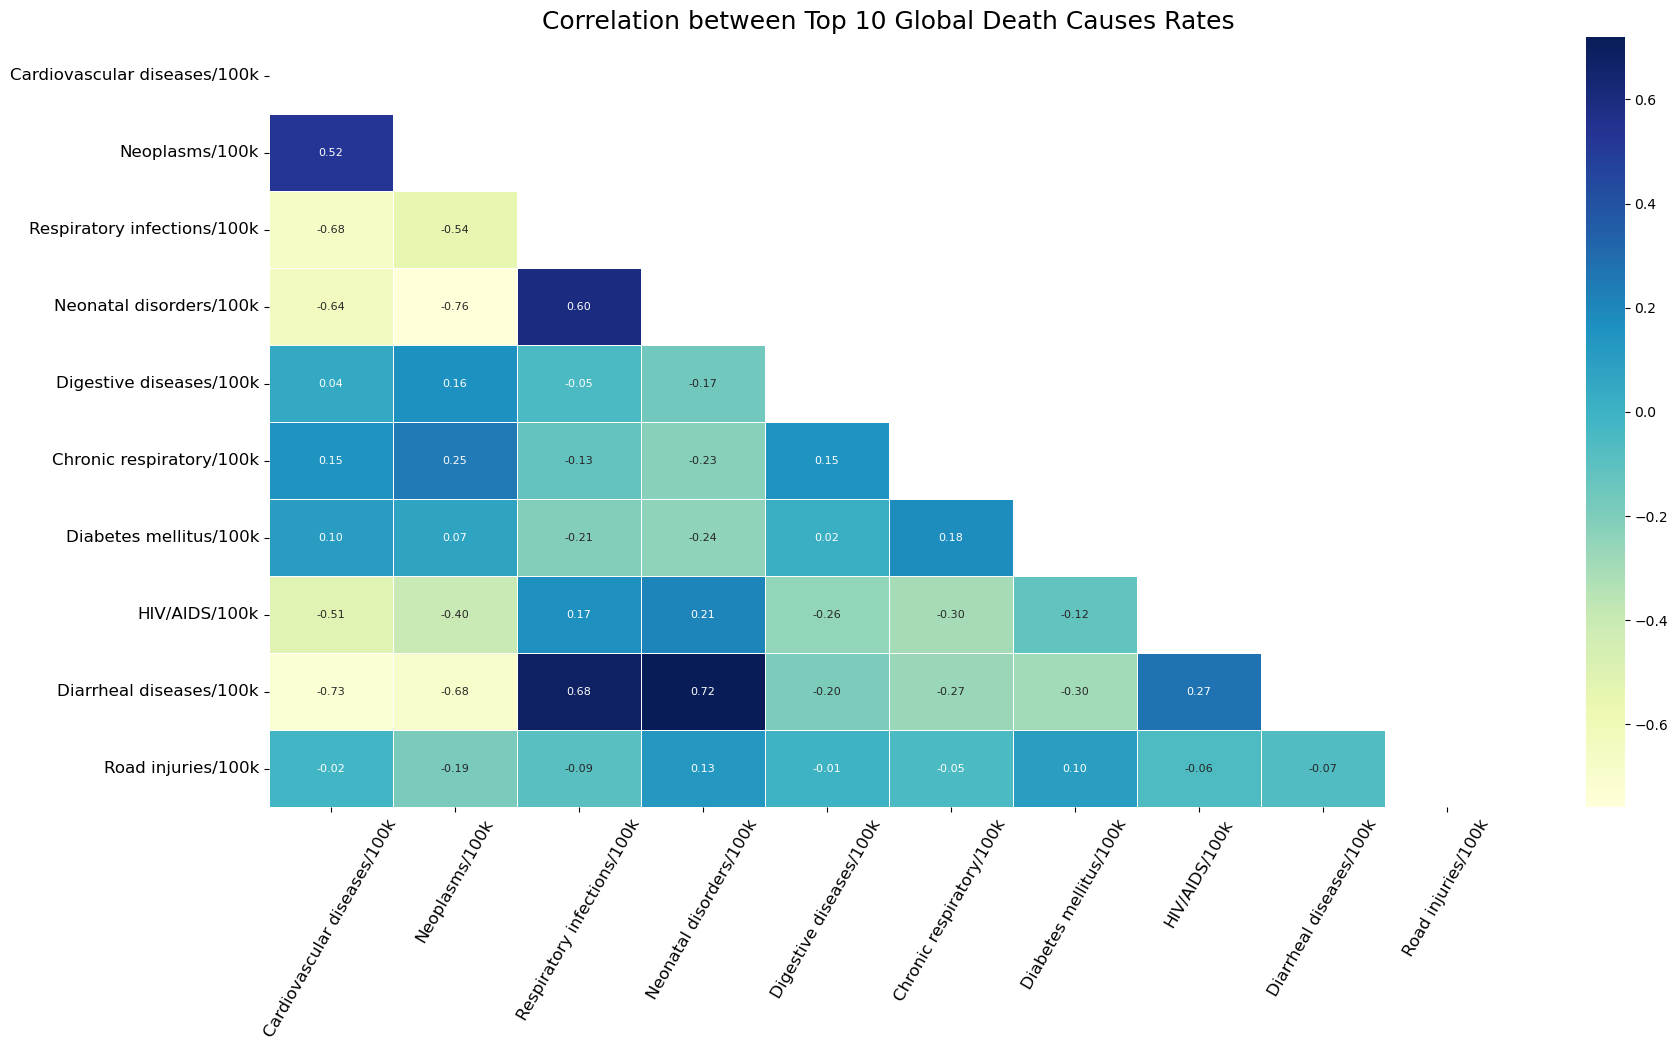

In [57]:
#Preparing mask to avoid repetition

mask = np.zeros_like(country_rates_df[global_top_col].corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

# Plotting heatmap without repetition

f, ax = plt.subplots(figsize=(20,10))
#sns.set_style(style = 'white')
sns.heatmap(country_rates_df[global_top_col].corr(), annot = True, annot_kws = {"size": 8}, mask = mask,  linewidth=0.4, fmt='.2f', cmap = 'YlGnBu', ax=ax)
plt.title('Correlation between Top 10 Global Death Causes Rates', fontsize = 18)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 60, fontsize = 12)

# plt.savefig('', dpi = 150)
plt.show()

#### This heatmap shows that some of the diseases or disorders that were previously hypothesized as likely associated to low income countries, are positively correlated between each other. For example, Diarrheal diseases are correlated with Neonatal disorders or respiratory infections.

## $\color{blue}{\text{Income Classes}}$
***

### High Income Countries Descriptive Statistics

In [58]:
(hi_income_rates.loc[:, hi_income_rates.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False)

count      mean      std       min  \
Cardiovascular diseases/100k          30.0  37186.93  3366.63  33370.01   
Neoplasms/100k                        30.0  28665.28  1551.11  25733.79   
Chronic respiratory/100k              30.0   5418.59   409.47   4731.34   
Alzheimer's/Other dementias/100k      30.0   4905.24  1114.90   3121.38   
Digestive diseases/100k               30.0   4795.91    85.70   4662.19   
Respiratory infections/100k           30.0   3969.11   138.39   3684.75   
Diabetes mellitus/100k                30.0   2425.38   141.65   2126.92   
Chronic kidney disease/100k           30.0   2363.61   589.21   1534.09   
Liver diseases/100k                   30.0   2347.04    76.23   2168.87   
Year                                  30.0   2004.50     8.80   1990.00   
Self/100k                             30.0   1843.48    87.55   1586.27   
Road injuries/100k                    30.0   1721.99   356.37   1229.27   
Parkinson's disease/100k              30.0    958.83   196.66    662.70   
Neonatal disorders/100k               30.0    449.22   151.52    231.79   
Drug use disorders/100k               30.0    423.68   193.81    159.25   
Alcohol use disorders/100k            30.0    403.77    30.43    335.94   
Interpersonal violence/100k           30.0    378.70    69.58    275.69   
HIV/AIDS/100k                         30.0    337.21   216.91    131.87   
Tuberculosis/100k                     30.0    247.30    80.36    151.50   
Drowning/100k                         30.0    241.62    26.43    191.97   
Diarrheal diseases/100k               30.0    227.39   105.96     97.30   
Fire, heat, and hot substances/100k   30.0    157.73    25.22    118.47   
Nutritional deficiencies/100k         30.0    148.23    19.81    112.66   
Protein/100k                          30.0    125.45    20.65     87.30   
Heat/Cold Exposure/100k               30.0     73.38     5.45     64.33   
Meningitis/100k                       30.0     62.39    18.93     38.73   
Poisonings/100k                       30.0     56.14    14.81     38.93   
Maternal disorders/100k               30.0     21.34     2.28     16.61   
Forces of Nature/100k                 30.0     20.65    39.42      2.63   
Conflict and terrorism/100k           30.0     12.06    12.13      0.39   
Acute hepatitis/100k                  30.0     11.85     3.52      7.19   
Malaria/100k                          30.0      0.51     0.73      0.02   

                                          25%       50%       75%       max  
Cardiovascular diseases/100k         33840.92  36588.78  40140.89  43281.20  
Neoplasms/100k                       27399.91  29155.11  30050.94  30276.13  
Chronic respiratory/100k              5097.49   5420.17   5793.54   5979.67  
Alzheimer's/Other dementias/100k      3972.65   4845.84   5957.23   6490.38  
Digestive diseases/100k               4716.36   4817.80   4877.48   4894.78  
Respiratory infections/100k           3874.90   3956.73   4077.41   4217.71  
Diabetes mellitus/100k                2352.88   2407.18   2539.72   2638.28  
Chronic kidney disease/100k           1797.04   2365.07   2941.08   3150.37  
Liver diseases/100k                   2296.10   2374.04   2405.94   2434.25  
Year                                  1997.25   2004.50   2011.75   2019.00  
Self/100k                             1846.76   1870.79   1893.86   1934.03  
Road injuries/100k                    1380.93   1708.32   2028.29   2326.80  
Parkinson's disease/100k               774.44    970.92   1151.20   1213.26  
Neonatal disorders/100k                326.38    430.70    529.88    797.32  
Drug use disorders/100k                252.90    417.70    532.21    789.45  
Alcohol use disorders/100k             381.52    411.62    431.50    437.64  
Interpersonal violence/100k            320.70    377.46    412.92    504.33  
HIV/AIDS/100k                          170.09    273.63    382.07    842.34  
Tuberculosis/100k                      176.84    230.02    309.94    412.11  
D

- #### As in the global scale, high income countries also present the cardiovascular diseases and neoplasms as their death causes with highest means. Likewise, both of these show an apparent normal distribution behavior, with similar mean and median values.

- #### The lowest death rate was that of Malaria, suggesting that most of the high income countries are not located where this disease is endemic.

- #### Alzheimer's disease and other dementias have the fourth highest death rate within the high income countries. This may be related to the higher life expectancy, since these causes are more frequent in more aged populations.

### Boxplots - Top 10 High Income Death Causes Rates

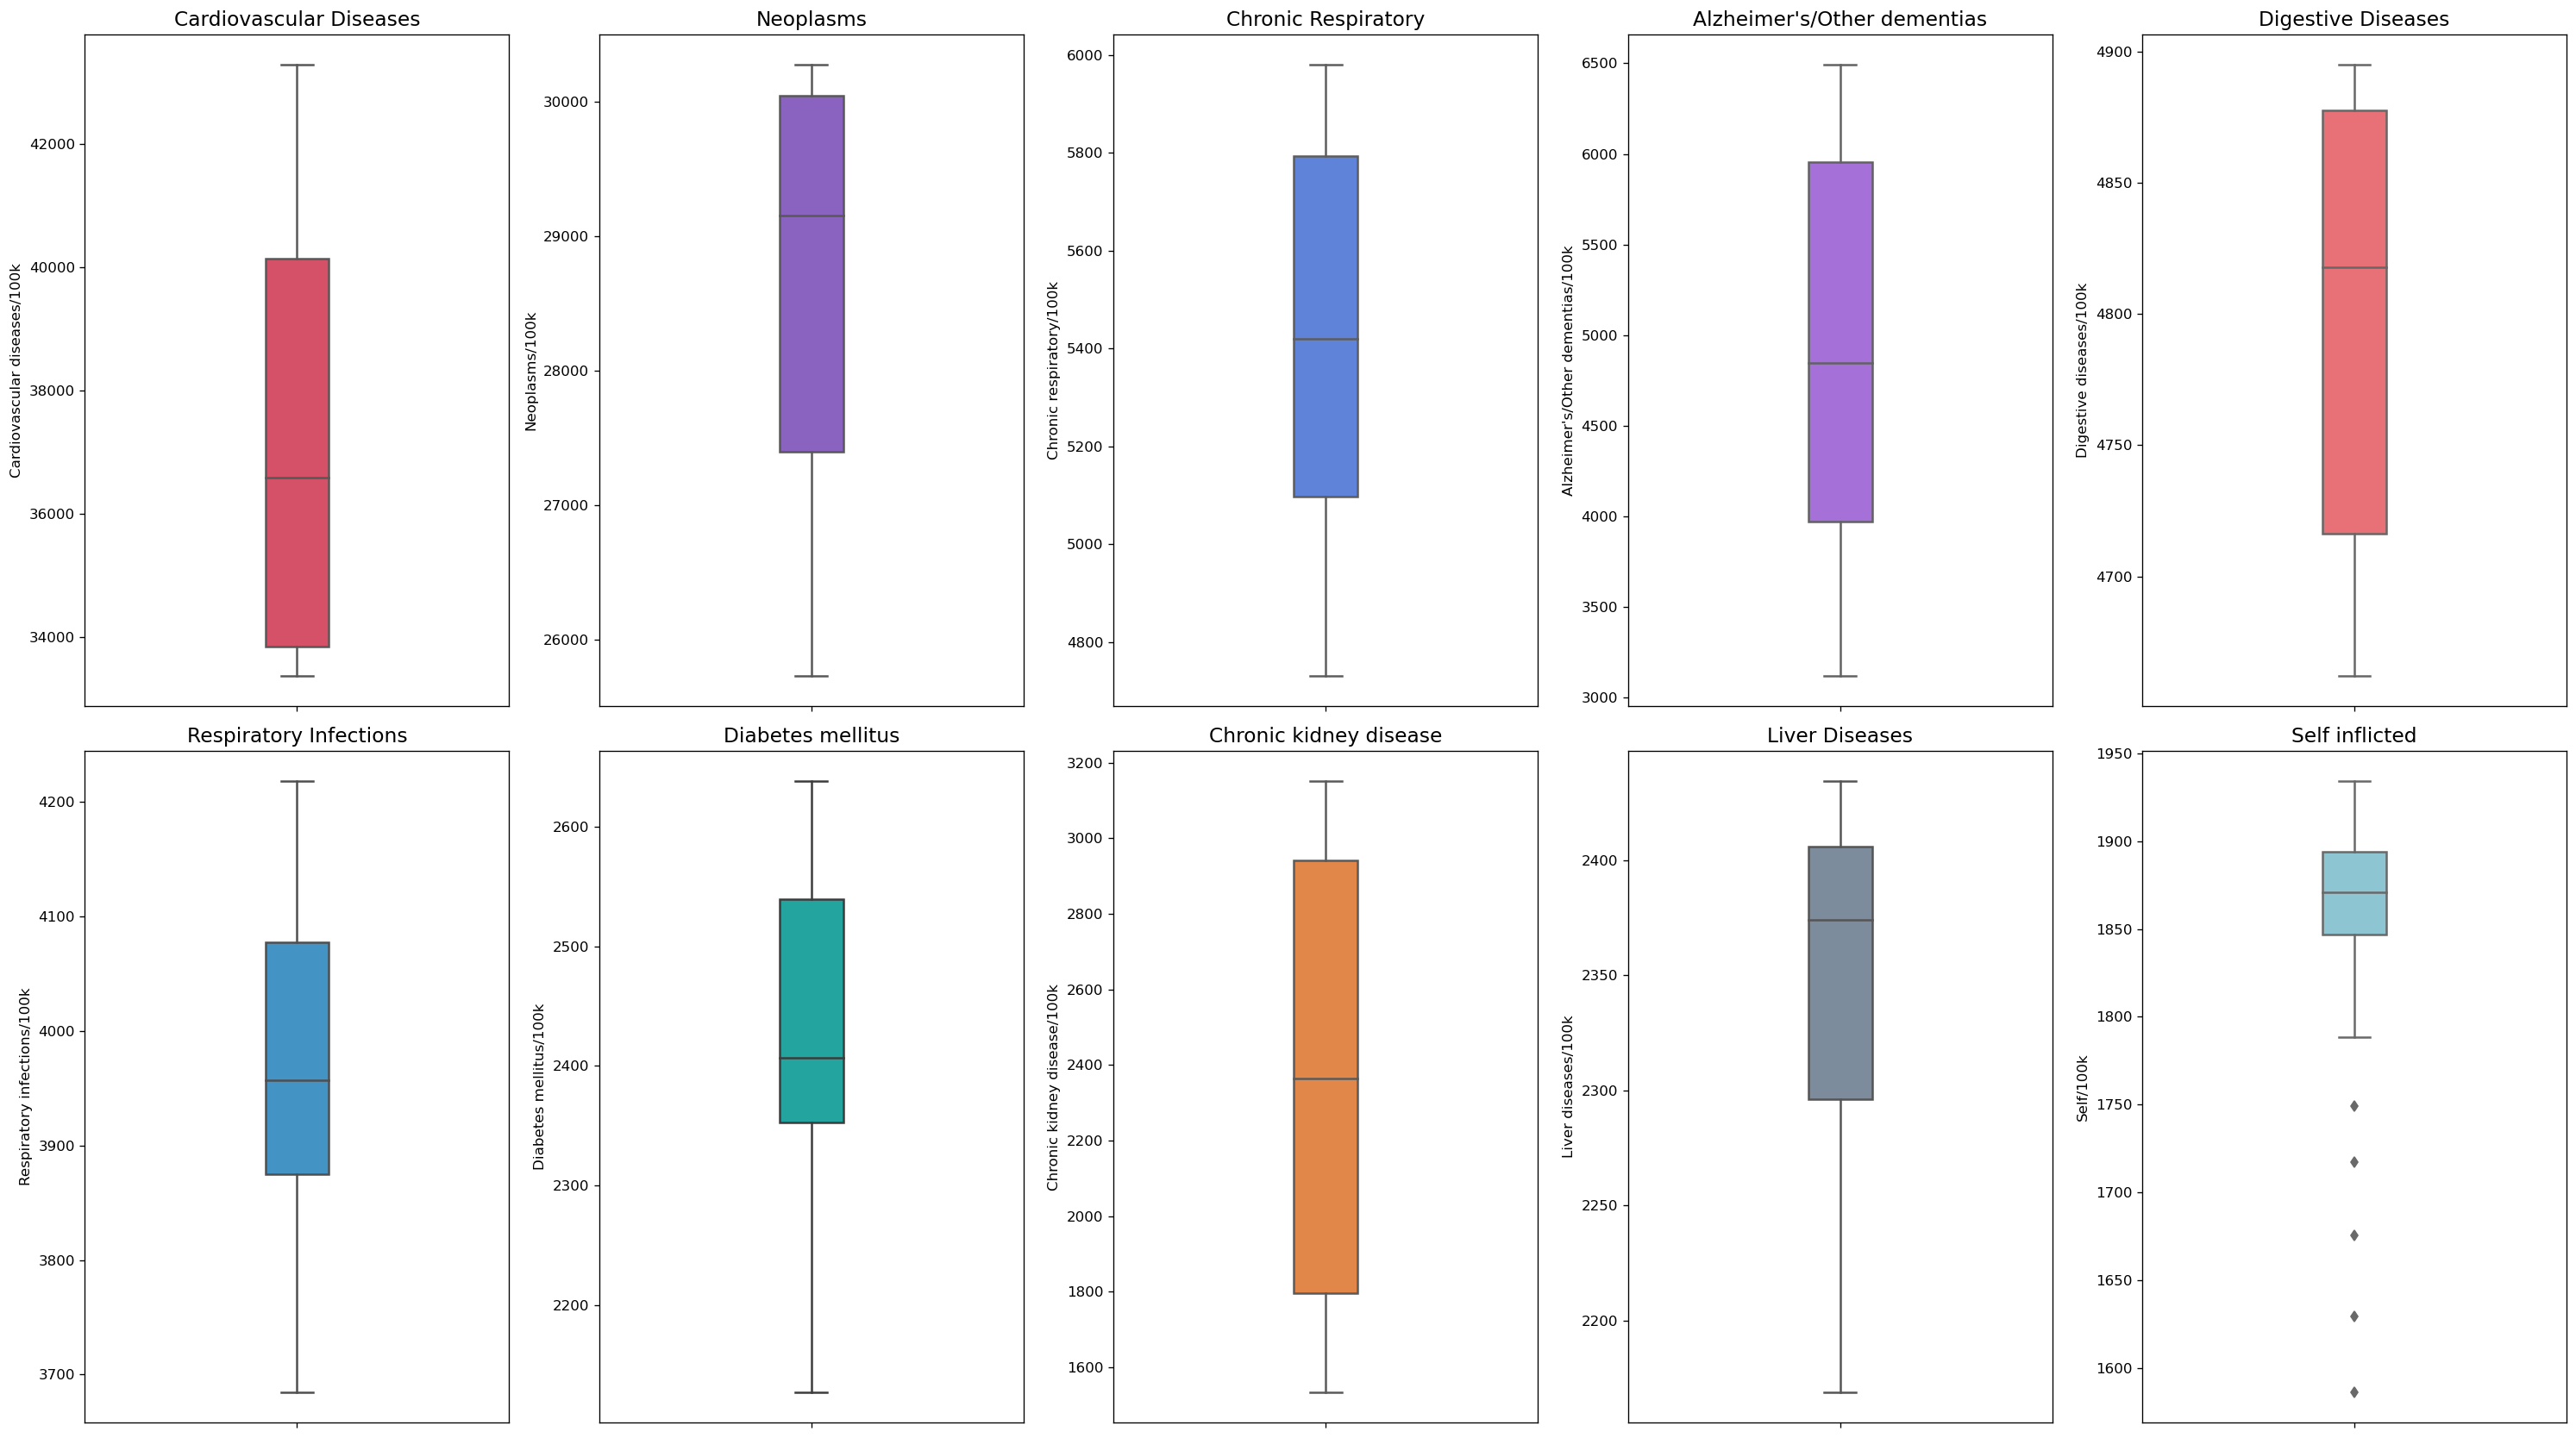

In [59]:
fig, ax = plt.subplots(nrows=2,ncols=5,dpi=120,figsize = (25,14))

ax[0,0].set_title('Cardiovascular Diseases',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Cardiovascular diseases/100k'], data=hi_income_rates, color='#eb3b5a', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Neoplasms',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Neoplasms/100k'], data=hi_income_rates, color='#8854d0', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Chronic Respiratory',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Chronic respiratory/100k'], data=hi_income_rates, color='#4b7bec', width = 0.15, ax = ax[0,2])

ax[0,3].set_title("Alzheimer's/Other dementias",fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates["Alzheimer's/Other dementias/100k"], data=hi_income_rates, color='#a55eea', width = 0.15, ax = ax[0,3])

ax[0,4].set_title('Digestive Diseases',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Digestive diseases/100k'], data=hi_income_rates, color='#fc5c65', width = 0.15, ax = ax[0,4])

ax[1,0].set_title('Respiratory Infections',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Respiratory infections/100k'], data=hi_income_rates, color='#2d98da', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('Diabetes mellitus',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Diabetes mellitus/100k'], data=hi_income_rates, color='#0fb9b1', width = 0.15, ax = ax[1,1])

ax[1,2].set_title('Chronic kidney disease',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Chronic kidney disease/100k'], data=hi_income_rates, color='#fa8231', width = 0.15, ax = ax[1,2])

ax[1,3].set_title('Liver Diseases',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Liver diseases/100k'], data=hi_income_rates, color='#778ca3', width = 0.15, ax = ax[1,3])

ax[1,4].set_title('Self inflicted',fontdict={'fontsize':14})
sns.boxplot(y = hi_income_rates['Self/100k'], data=hi_income_rates, color='#82ccdd', width = 0.15, ax = ax[1,4])


plt.tight_layout()
plt.show()


#### These boxplots demonstrate that there is much less variation within the high income countries than in the global scale (as it would be expected). Note that the number of outliers is really small. Again, the cardiovascular diseases and neoplasms death rates show a wide range of distribution, while all rhe rest of the causes are subordinated to a much lesser variation. This should be related to the fact that the number of observations is lower than the global scale number.

### Histograms - Top 10 High Income Death Causes Rates

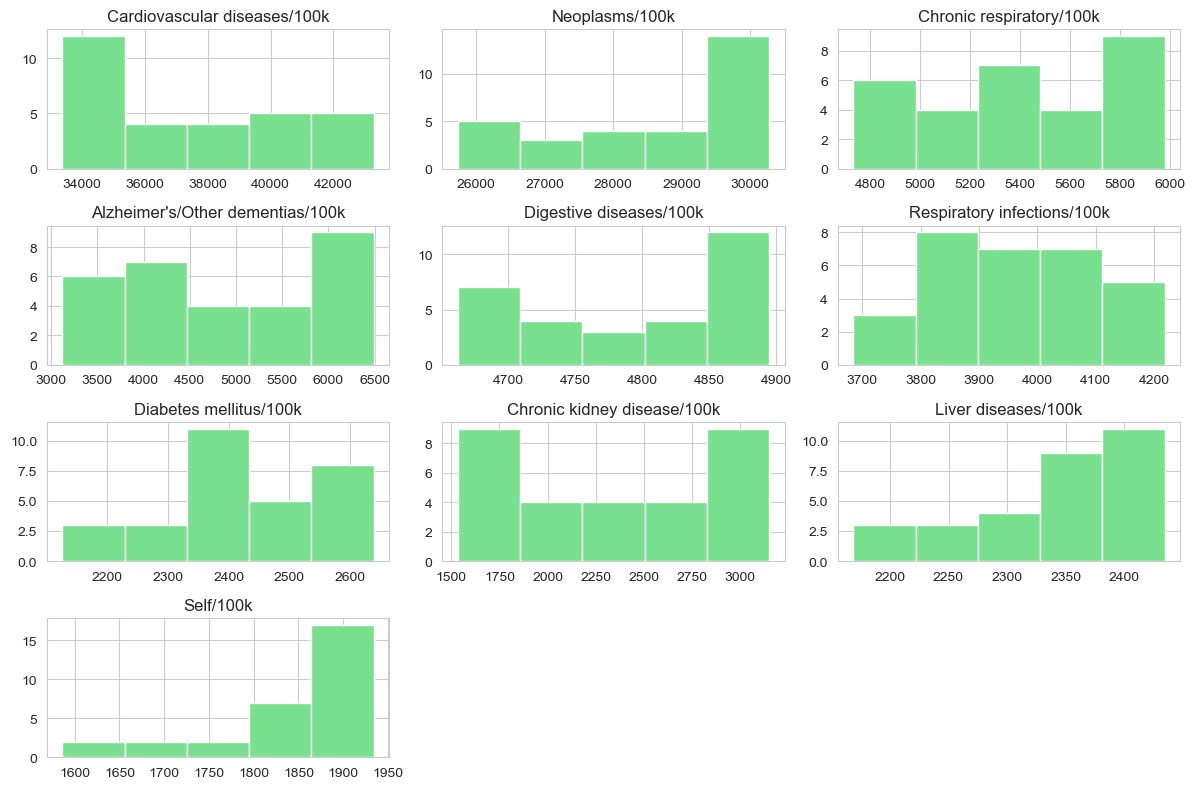

In [196]:
hi_income_top_col = ['Cardiovascular diseases/100k','Neoplasms/100k','Chronic respiratory/100k',"Alzheimer's/Other dementias/100k",'Digestive diseases/100k',
                 'Respiratory infections/100k','Diabetes mellitus/100k','Chronic kidney disease/100k','Liver diseases/100k','Self/100k']
hi_income_rates[hi_income_top_col].hist(bins=5, figsize=(12,8), color = '#78e08f')

plt.tight_layout()
plt.show()

#### This boxplots suggest that the variation within the high income countries death rates is balanced. Mostly due to a reduced number of observations. 

***
### Low Income Countries Descriptive Statistics

In [61]:
(lo_income_rates.loc[:, lo_income_rates.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False)

count      mean      std      min  \
Cardiovascular diseases/100k          30.0  12194.75  2454.63  9252.13   
Neonatal disorders/100k               30.0  10178.76   559.74  9088.97   
Respiratory infections/100k           30.0  10140.66  1024.17  8989.87   
HIV/AIDS/100k                         30.0   9918.07  3093.69  4727.46   
Diarrheal diseases/100k               30.0   9582.05  1510.04  7309.11   
Malaria/100k                          30.0   8134.68   763.29  6428.66   
Tuberculosis/100k                     30.0   6345.94   359.88  5905.87   
Neoplasms/100k                        30.0   5381.88  1241.24  3974.02   
Digestive diseases/100k               30.0   3367.80   522.43  2706.57   
Nutritional deficiencies/100k         30.0   3333.09  1157.41  1920.81   
Protein/100k                          30.0   3235.84  1134.48  1848.14   
Chronic respiratory/100k              30.0   3004.16   486.66  2424.89   
Meningitis/100k                       30.0   2227.20   240.99  1777.89   
Road injuries/100k                    30.0   2091.36   288.76  1697.61   
Year                                  30.0   2004.50     8.80  1990.00   
Liver diseases/100k                   30.0   1987.39   277.51  1617.67   
Diabetes mellitus/100k                30.0   1410.19   325.19  1025.69   
Maternal disorders/100k               30.0   1388.97   109.45  1201.73   
Chronic kidney disease/100k           30.0   1196.64   250.11   905.13   
Conflict and terrorism/100k           30.0   1030.98  1801.45   201.47   
Self/100k                             30.0    752.86   128.25   592.31   
Interpersonal violence/100k           30.0    703.40   163.15   488.71   
Alzheimer's/Other dementias/100k      30.0    532.56   182.14   331.52   
Drowning/100k                         30.0    493.72    42.93   446.24   
Acute hepatitis/100k                  30.0    310.19    34.09   255.25   
Fire, heat, and hot substances/100k   30.0    277.23    28.20   240.71   
Poisonings/100k                       30.0    272.09    19.83   243.46   
Forces of Nature/100k                 30.0    190.18   802.81     5.61   
Parkinson's disease/100k              30.0    141.82    39.54    96.69   
Alcohol use disorders/100k            30.0     76.14    15.86    57.68   
Heat/Cold Exposure/100k               30.0     72.72     7.27    62.00   
Drug use disorders/100k               30.0     26.64     8.97    17.53   

                                          25%       50%       75%       max  
Cardiovascular diseases/100k         10254.65  11268.30  14128.70  17290.87  
Neonatal disorders/100k               9575.23  10307.76  10633.34  10919.30  
Respiratory infections/100k           9489.60   9758.56  10577.58  12599.64  
HIV/AIDS/100k                         7195.82   9728.56  12676.38  14383.42  
Diarrheal diseases/100k               8222.32   9226.64  10839.12  12333.78  
Malaria/100k                          7913.21   8385.33   8674.72   9170.14  
Tuberculosis/100k                     6154.62   6223.86   6365.86   7212.78  
Neoplasms/100k                        4408.23   4898.28   6288.99   8044.11  
Digestive diseases/100k               2944.35   3147.06   3737.62   4472.25  
Nutritional deficiencies/100k         2305.18   2805.07   4376.66   5677.60  
Protein/100k                          2232.96   2721.86   4268.85   5547.85  
Chronic respiratory/100k              2569.11   2775.89   3404.52   3987.59  
Meningitis/100k                       2116.10   2250.74   2353.26   2659.25  
Road injuries/100k                    1839.16   1994.86   2337.68   2621.37  
Year                                  1997.25   2004.50   2011.75   2019.00  
Liver diseases/100k                   1762.16   1887.96   2174.90   2598.29  
Diabetes mellitus/100k                1143.05   1295.43   1654.68   2102.73  
Maternal disorders/100k               1265.68   1398.74   1491.30   1529.75  
Chronic kidney disease/100k           1003.27   1098.82   1381.16   1723.31  
Conflict and terrorism/100k       

- #### Low income countries also present the cardiovascular diseases as their death cause with highest rate mean. Though it shows a narrower range of values. 
- #### As expected, these group of countries show higher rates related to death causes that could be associated to a lower income level. Such is the case of Neonatal disorders, respiratory infections, diarrheal diseases or even tuberculosis.
- #### HIV/AIDS death rate appears within the top 5 mean death rates.
- #### Low income countries show a notably low death rate for drug use disorders.

### Boxplots - Top 10 Low Income Death Causes Rates

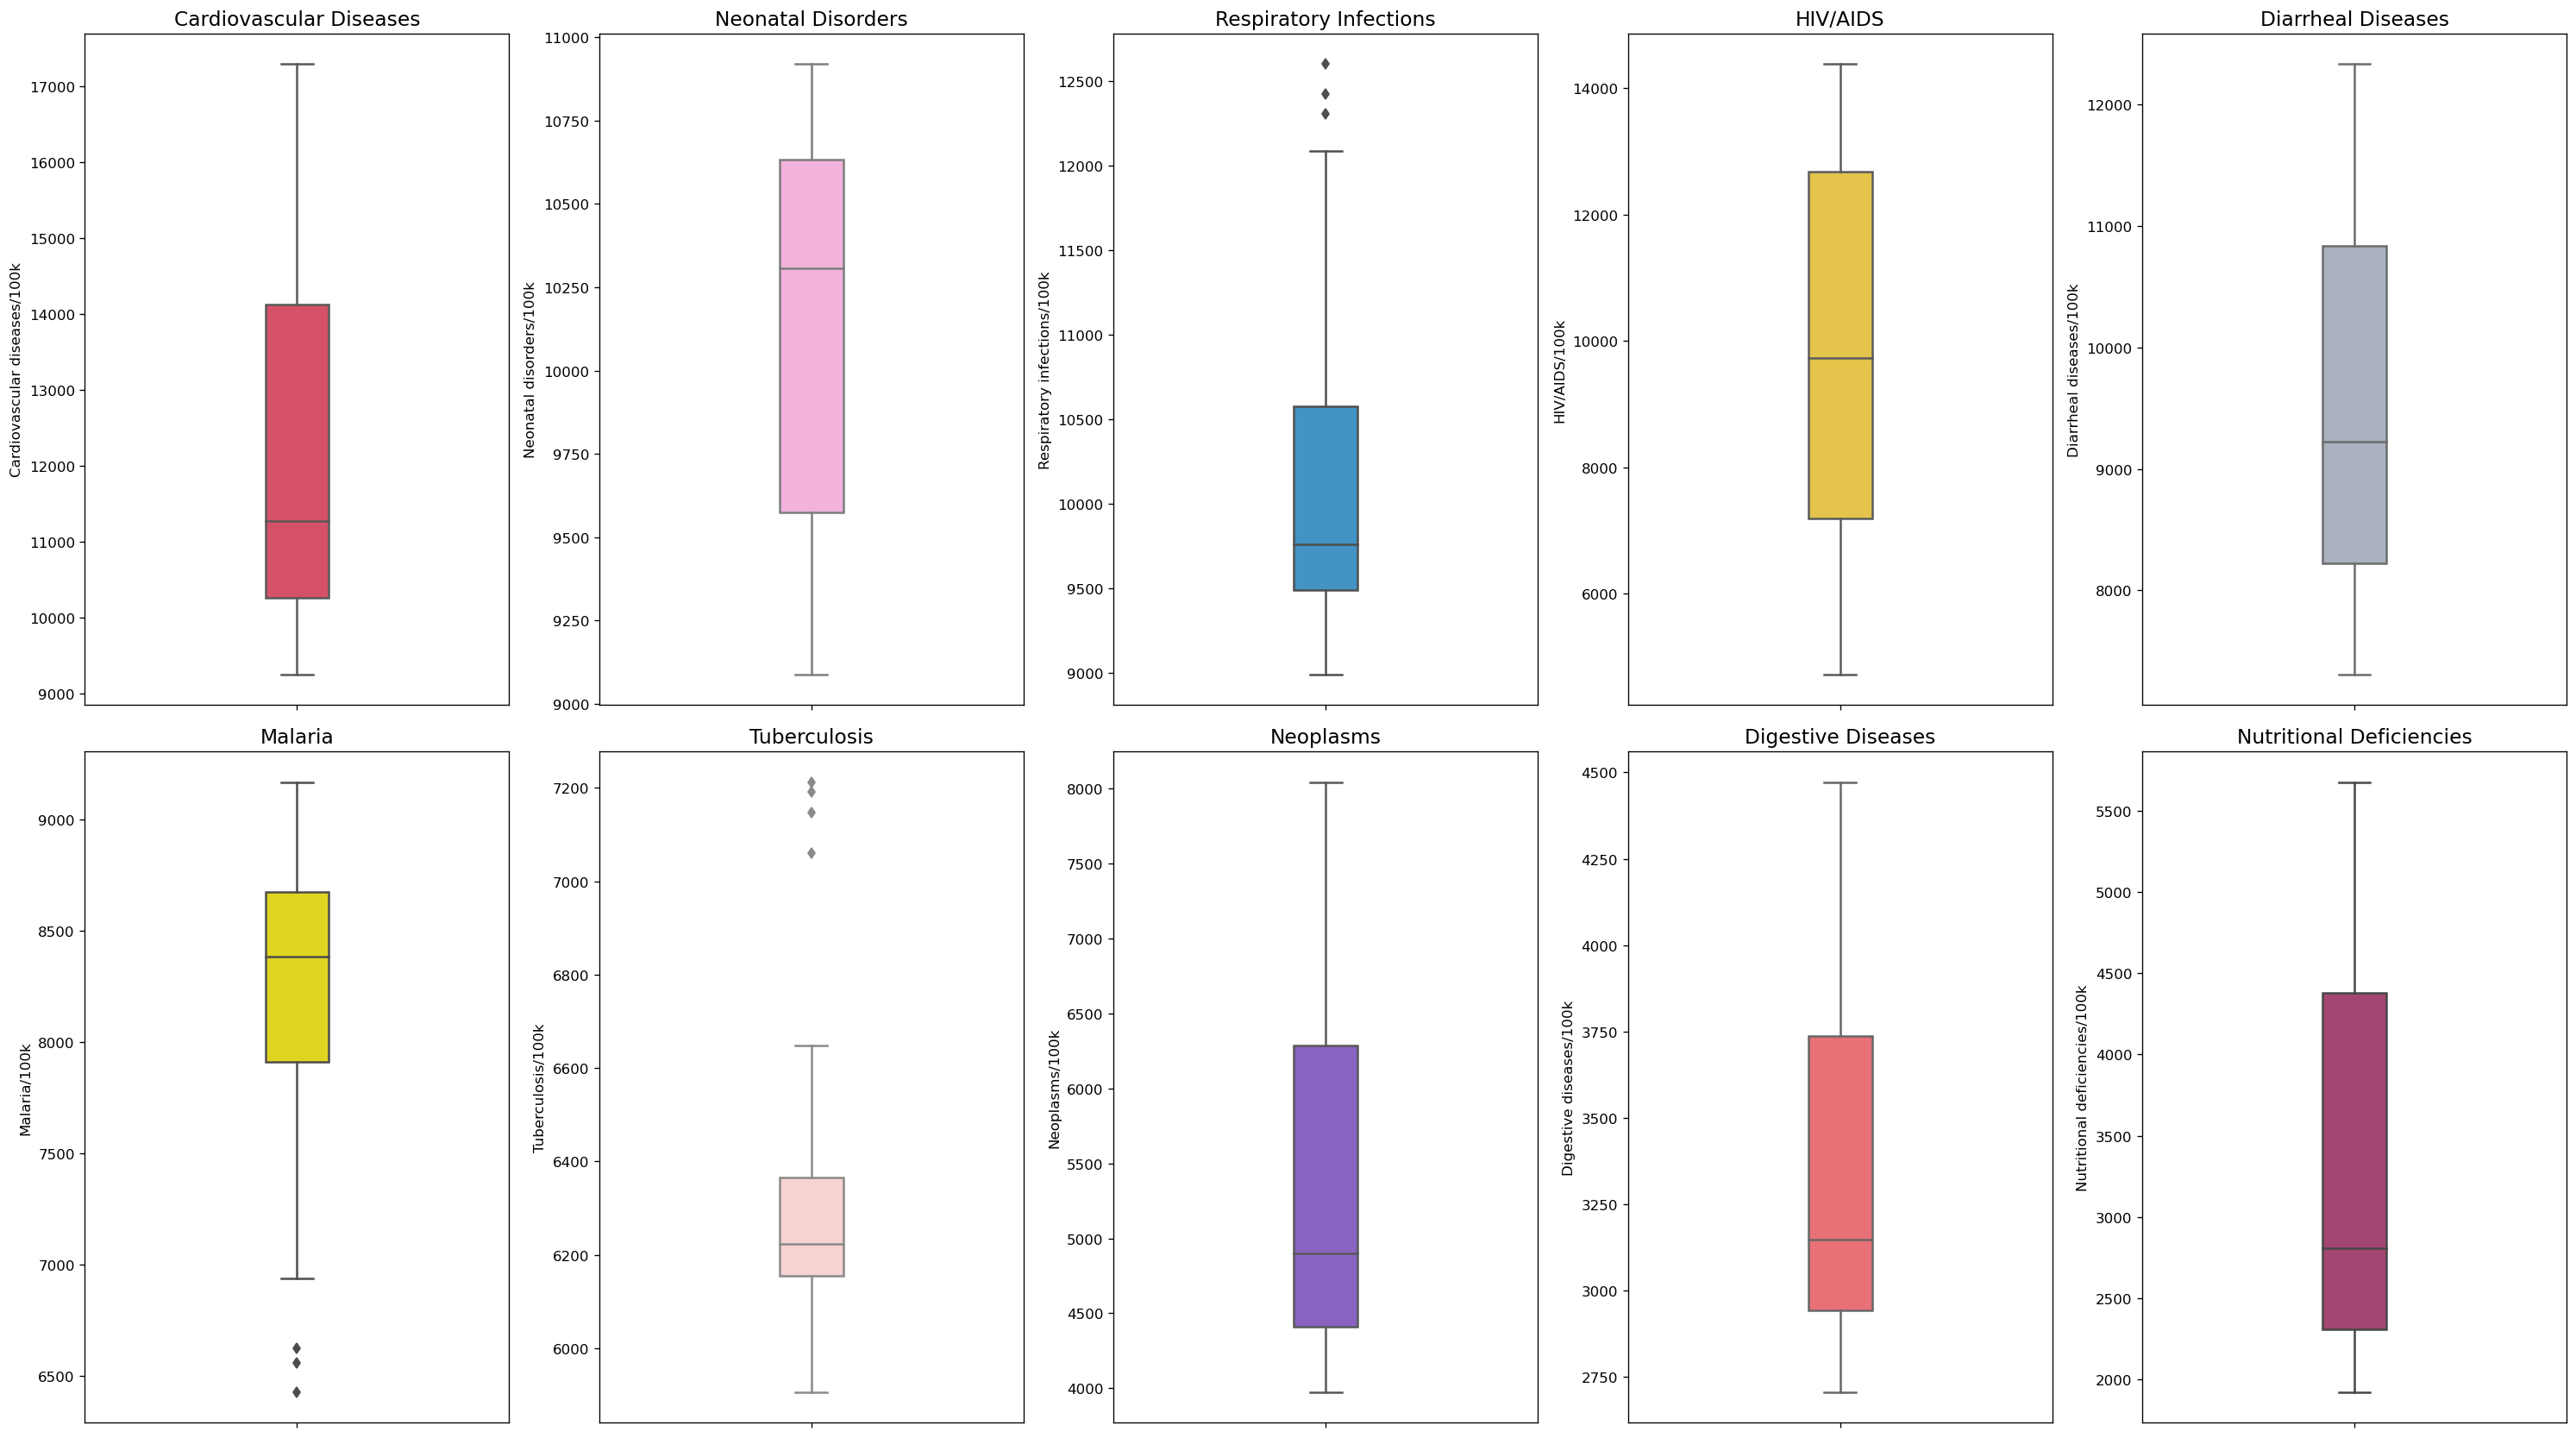

In [62]:
fig, ax = plt.subplots(nrows=2,ncols=5,dpi=120,figsize = (25,14))

ax[0,0].set_title('Cardiovascular Diseases',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Cardiovascular diseases/100k'], data=lo_income_rates, color='#eb3b5a', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Neonatal Disorders',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Neonatal disorders/100k'], data=lo_income_rates, color='#FDA7DF', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Respiratory Infections',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Respiratory infections/100k'], data=lo_income_rates, color='#2d98da', width = 0.15, ax = ax[0,2])

ax[0,3].set_title('HIV/AIDS',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['HIV/AIDS/100k'], data=lo_income_rates, color='#fed330', width = 0.15, ax = ax[0,3])

ax[0,4].set_title('Diarrheal Diseases',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Diarrheal diseases/100k'], data=lo_income_rates, color='#a5b1c2', width = 0.15, ax = ax[0,4])

ax[1,0].set_title('Malaria',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Malaria/100k'], data=lo_income_rates, color='#fff200', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('Tuberculosis',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Tuberculosis/100k'], data=lo_income_rates, color='#ffcccc', width = 0.15, ax = ax[1,1])

ax[1,2].set_title('Neoplasms',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Neoplasms/100k'], data=lo_income_rates, color='#8854d0', width = 0.15, ax = ax[1,2])

ax[1,3].set_title('Digestive Diseases',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Digestive diseases/100k'], data=lo_income_rates, color='#fc5c65', width = 0.15, ax = ax[1,3])

ax[1,4].set_title('Nutritional Deficiencies',fontdict={'fontsize':14})
sns.boxplot(y = lo_income_rates['Nutritional deficiencies/100k'], data=lo_income_rates, color='#B33771', width = 0.15, ax = ax[1,4])


plt.tight_layout()
plt.show()

#### As with high income countries, these low income group show a smaller variation than the global scale. Here most of the observations range within a narrower distribution. An exception for this is seen with Tuberculosis boxplot, where some outliers show extreme values of death rate.

### Histograms - Top 10 Low Income Death Causes Rates

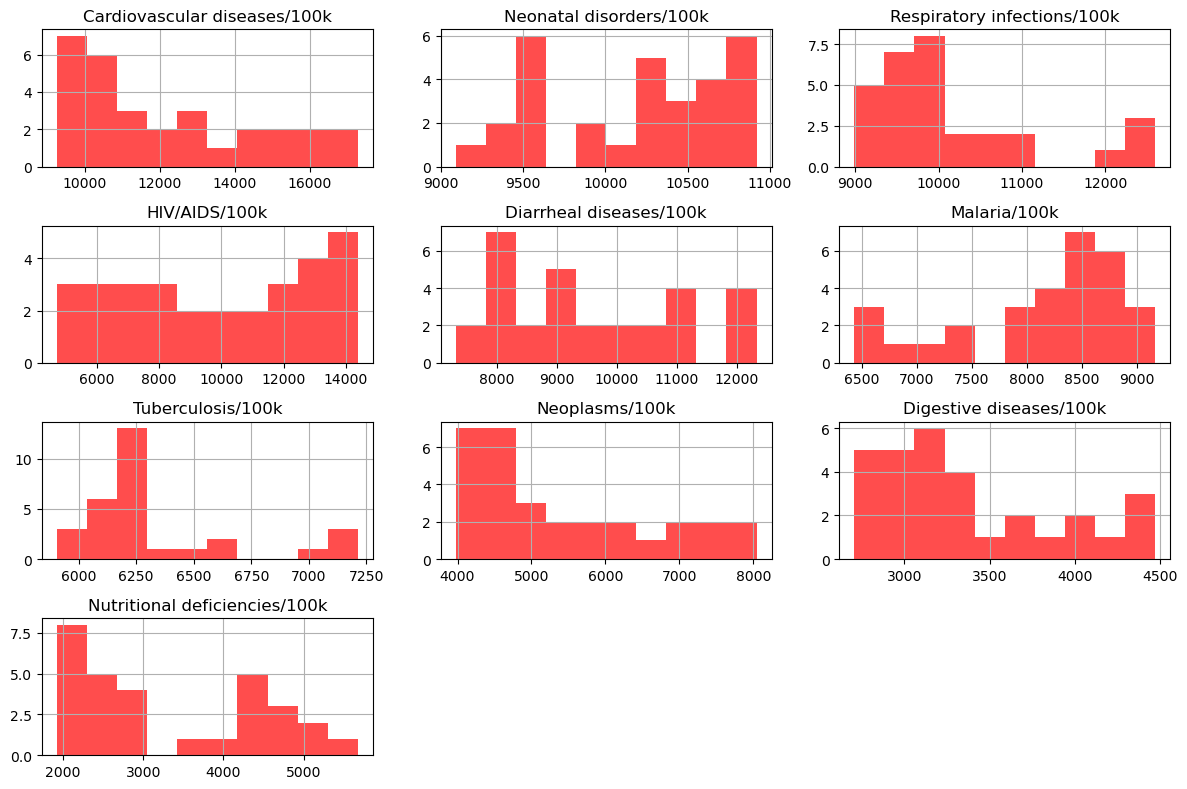

In [63]:
lo_income_top_col = ['Cardiovascular diseases/100k','Neonatal disorders/100k','Respiratory infections/100k','HIV/AIDS/100k',
                     'Diarrheal diseases/100k','Malaria/100k','Tuberculosis/100k','Neoplasms/100k','Digestive diseases/100k',
                     'Nutritional deficiencies/100k']
lo_income_rates[lo_income_top_col].hist(bins=10, figsize=(12,8), color = '#ff4d4d')

plt.tight_layout()
plt.show()

#### As in high income countries, low income histograms show that the variation is small and balanced, constrained to a small range of values when compared to global scale.

## $\color{blue}{\text{Argentina}}$
***

### Argentina's Descriptive Statistics

In [64]:
(arg_drates.loc[:, arg_drates.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False)

count      mean      std       min  \
Cardiovascular diseases/100k          30.0  33476.87  3556.76  30005.90   
Neoplasms/100k                        30.0  24683.32   509.03  23348.79   
Respiratory infections/100k           30.0   7898.22  2711.16   3595.11   
Chronic respiratory/100k              30.0   5382.51   523.80   4096.05   
Digestive diseases/100k               30.0   4928.19   210.81   4661.29   
Chronic kidney disease/100k           30.0   4129.68   588.67   2951.36   
Diabetes mellitus/100k                30.0   3259.72   207.08   2937.69   
Alzheimer's/Other dementias/100k      30.0   3011.10   532.30   2062.93   
Liver diseases/100k                   30.0   2350.11   113.07   2187.21   
Neonatal disorders/100k               30.0   2114.70   857.03    970.77   
Road injuries/100k                    30.0   2010.63    95.27   1805.42   
Year                                  30.0   2004.50     8.80   1990.00   
Self/100k                             30.0   1487.83   126.77   1141.79   
Interpersonal violence/100k           30.0    846.93    71.47    649.83   
Parkinson's disease/100k              30.0    790.05    86.91    618.51   
HIV/AIDS/100k                         30.0    566.39   118.34    231.42   
Nutritional deficiencies/100k         30.0    521.67    96.13    392.28   
Protein/100k                          30.0    496.76    93.19    368.50   
Tuberculosis/100k                     30.0    368.52   146.09    215.69   
Alcohol use disorders/100k            30.0    324.71    80.55    223.39   
Drowning/100k                         30.0    293.62   100.36    167.93   
Diarrheal diseases/100k               30.0    275.31    58.44    223.01   
Fire, heat, and hot substances/100k   30.0    247.87    26.55    199.38   
Meningitis/100k                       30.0    210.46    55.40    134.40   
Maternal disorders/100k               30.0    148.12    20.24    111.85   
Poisonings/100k                       30.0    102.38    12.56     80.70   
Acute hepatitis/100k                  30.0     21.32    12.27     10.54   
Heat/Cold Exposure/100k               30.0     18.44     5.31     12.01   
Drug use disorders/100k               30.0     17.45     5.10      9.11   
Conflict and terrorism/100k           30.0     10.47    21.07      0.00   
Forces of Nature/100k                 30.0      5.08     4.99      0.00   
Malaria/100k                          30.0      1.56     1.30      0.00   

                                          25%       50%       75%       max  
Cardiovascular diseases/100k         30392.00  32168.96  35845.77  40895.47  
Neoplasms/100k                       24499.54  24743.31  25049.48  25350.58  
Respiratory infections/100k           5387.56   8369.97  10427.26  11492.46  
Chronic respiratory/100k              5197.99   5689.54   5728.39   5788.97  
Digestive diseases/100k               4760.65   4899.35   5052.98   5298.10  
Chronic kidney disease/100k           3720.84   4450.05   4561.33   4647.65  
Diabetes mellitus/100k                3073.58   3217.51   3441.54   3585.61  
Alzheimer's/Other dementias/100k      2585.30   3061.16   3550.56   3678.64  
Liver diseases/100k                   2260.83   2338.40   2438.31   2531.33  
Neonatal disorders/100k               1445.87   1941.68   2641.57   3894.43  
Road injuries/100k                    1938.93   2016.22   2079.14   2156.46  
Year                                  1997.25   2004.50   2011.75   2019.00  
Self/100k                             1481.44   1528.42   1562.31   1654.76  
Interpersonal violence/100k            822.88    853.90    895.41    956.05  
Parkinson's disease/100k               733.10    802.57    864.21    902.83  
HIV/AIDS/100k                          538.46    573.39    643.56    781.49  
Nutritional deficiencies/100k          425.90    531.04    597.69    676.09  
Protein/100k                           402.44    510.60    571.84    643.05  
Tuberculosis/100k                      245.36    314.69    470.06    679.36  
A

- #### As in high income countries, Argentina also presents the cardiovascular diseases and neoplasms as their death causes with highest rate means. Both of them present similar mean and median values.

- #### The lowest death rate was that of Malaria, as Argentina is located far from where this disease is endemic.

- #### Within the highest death rate causes we find some that may be associated to low income countries, such as respiratory infections, neonatal disorders or road injuries.

- #### Alzheimer's disease and other dementias have the eigth highest death rate. This may be related to the higher life expectancy, since these causes are more frequent in more aged populations. It suggests certain resemblance between Argentine higher death rates and high income countries rates.

### Boxplots - Top 10 Argentina's Death Causes Rates

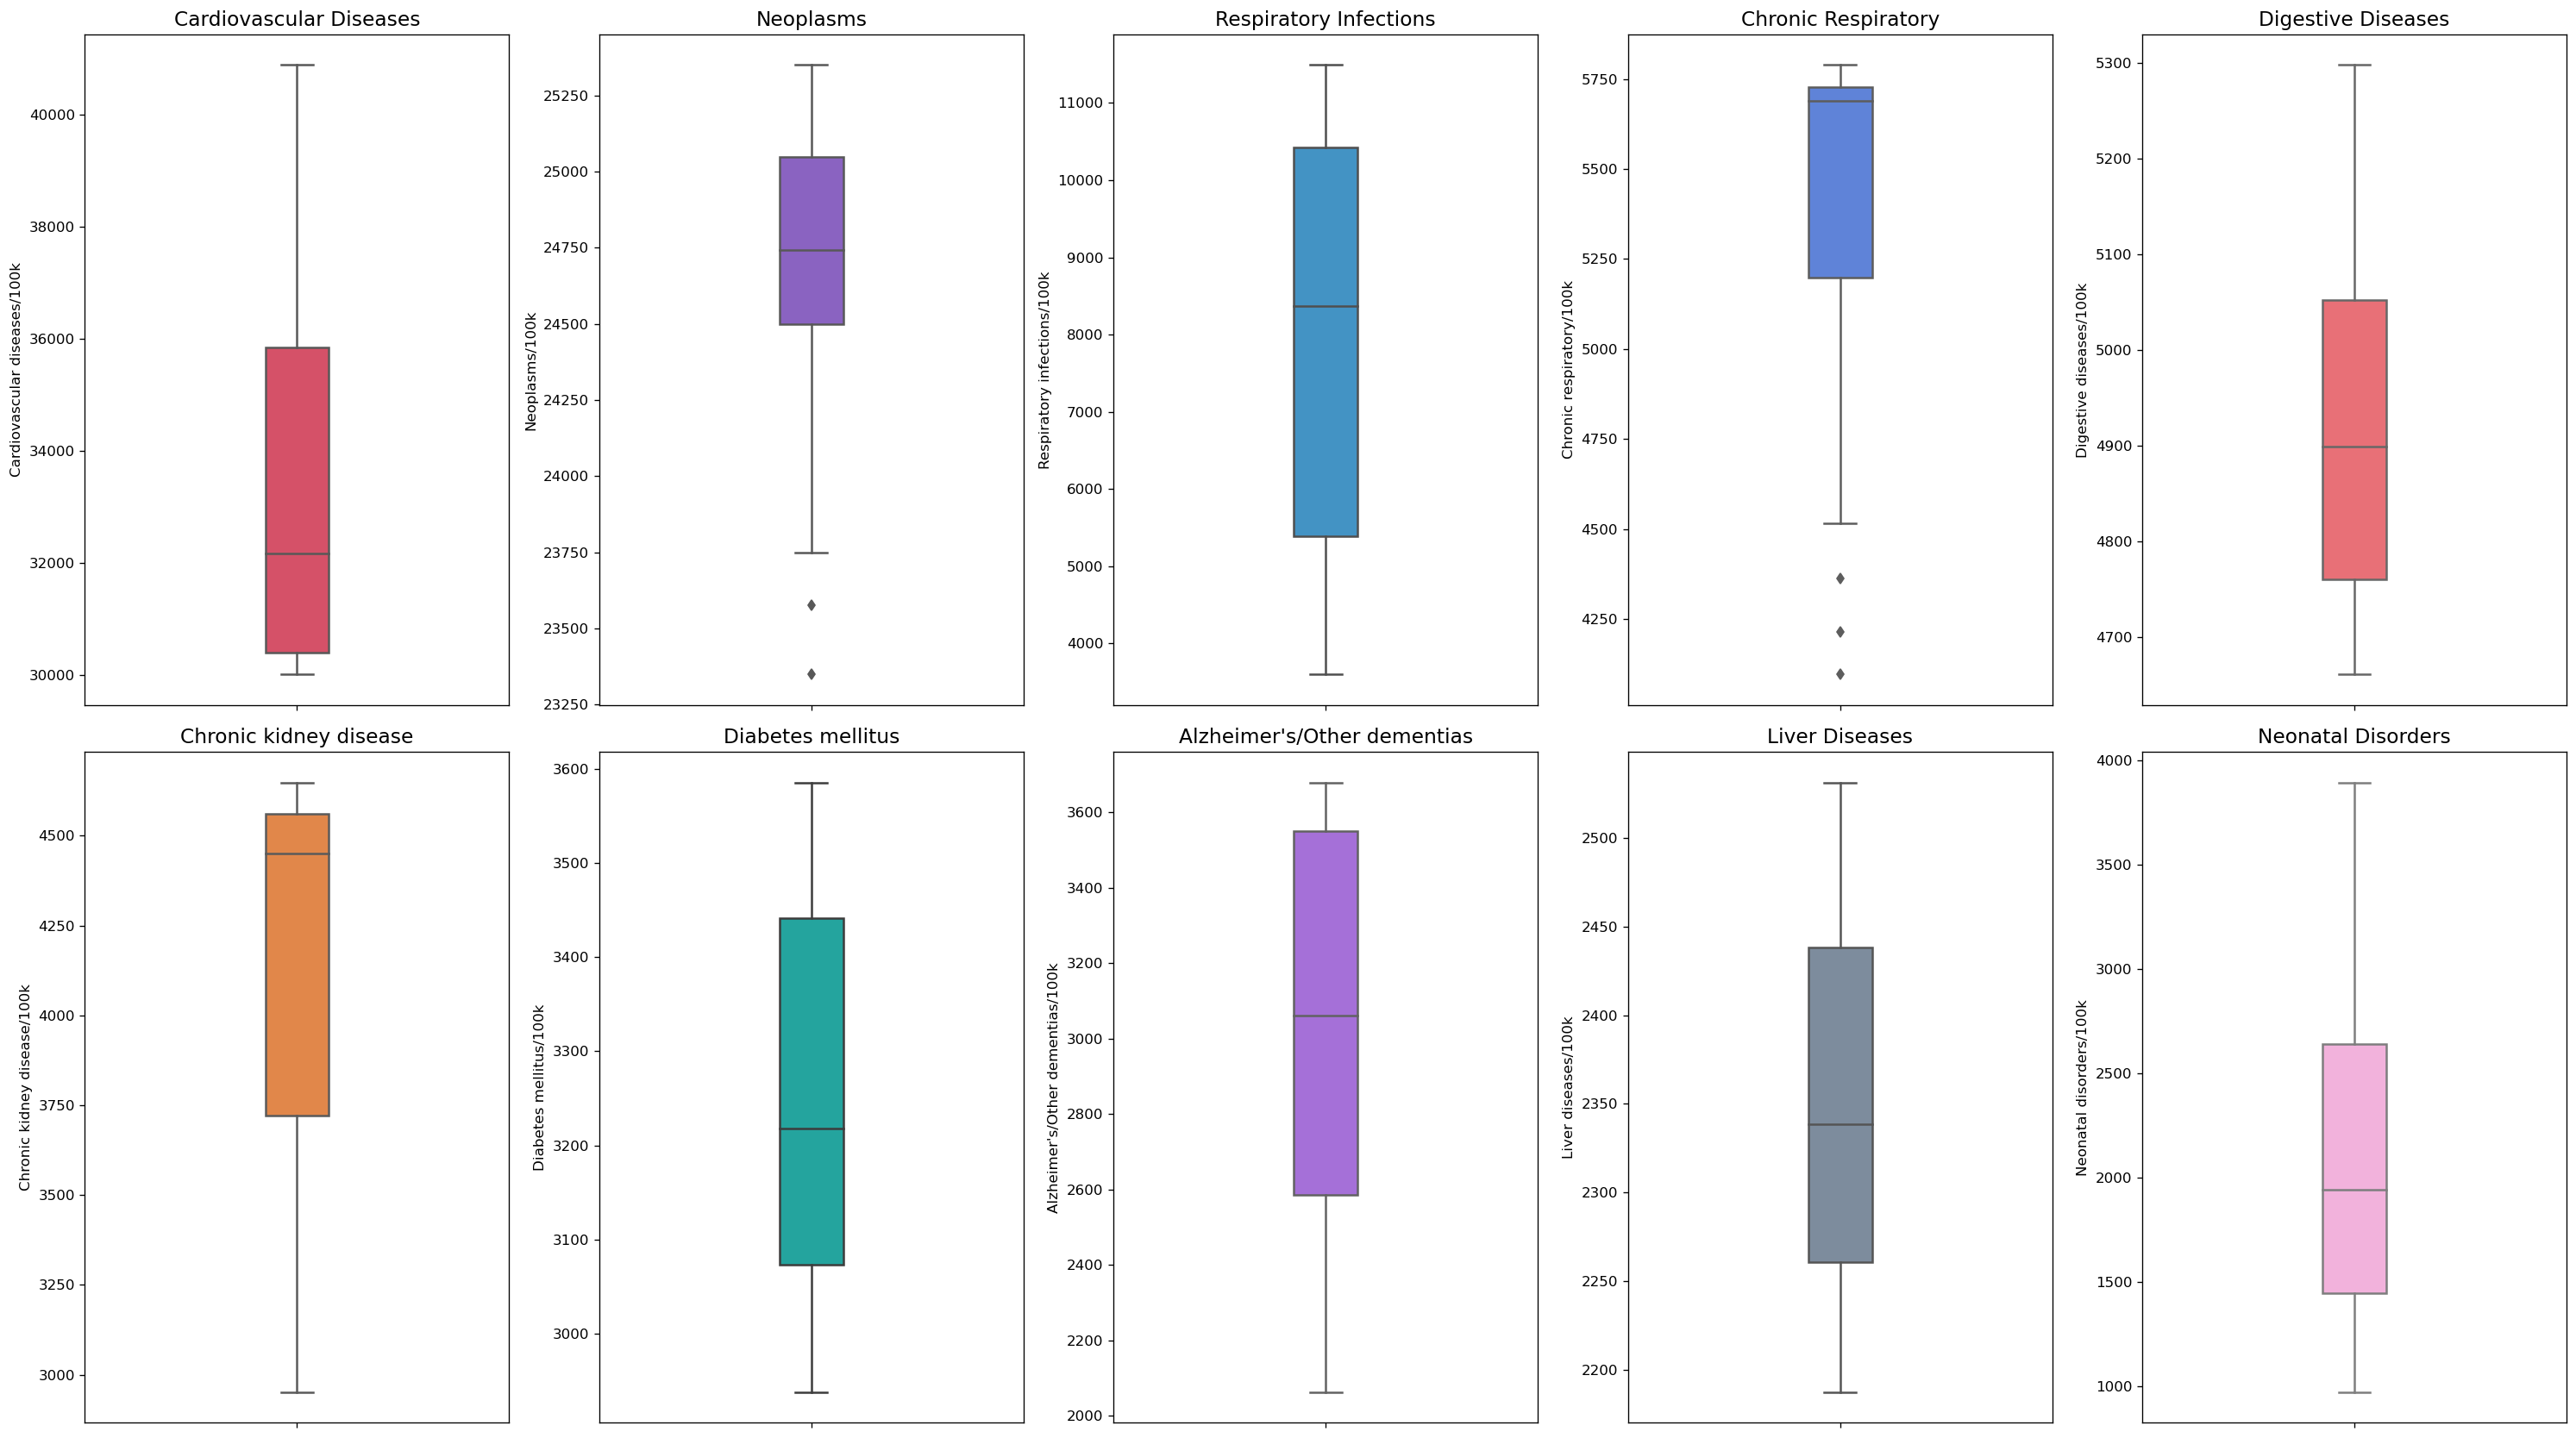

In [65]:
fig, ax = plt.subplots(nrows=2,ncols=5,dpi=120,figsize = (25,14))

ax[0,0].set_title('Cardiovascular Diseases',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Cardiovascular diseases/100k'], data=arg_drates, color='#eb3b5a', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Neoplasms',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Neoplasms/100k'], data=arg_drates, color='#8854d0', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Respiratory Infections',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Respiratory infections/100k'], data=arg_drates, color='#2d98da', width = 0.15, ax = ax[0,2])

ax[0,3].set_title('Chronic Respiratory',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Chronic respiratory/100k'], data=arg_drates, color='#4b7bec', width = 0.15, ax = ax[0,3])

ax[0,4].set_title('Digestive Diseases',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Digestive diseases/100k'], data=arg_drates, color='#fc5c65', width = 0.15, ax = ax[0,4])

ax[1,0].set_title('Chronic kidney disease',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Chronic kidney disease/100k'], data=arg_drates, color='#fa8231', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('Diabetes mellitus',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Diabetes mellitus/100k'], data=arg_drates, color='#0fb9b1', width = 0.15, ax = ax[1,1])

ax[1,2].set_title("Alzheimer's/Other dementias",fontdict={'fontsize':14})
sns.boxplot(y = arg_drates["Alzheimer's/Other dementias/100k"], data=arg_drates, color='#a55eea', width = 0.15, ax = ax[1,2])

ax[1,3].set_title('Liver Diseases',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Liver diseases/100k'], data=arg_drates, color='#778ca3', width = 0.15, ax = ax[1,3])

ax[1,4].set_title('Neonatal Disorders',fontdict={'fontsize':14})
sns.boxplot(y = arg_drates['Neonatal disorders/100k'], data=arg_drates, color='#FDA7DF', width = 0.15, ax = ax[1,4])



plt.tight_layout()
plt.show()


#### Cardiovascular diseases, neoplasms and respiratory infections show a wide distribution, while not showing many outliers. This is not the case in the rest of the death causes displayed, where most of the observations lie within a narrow range of values.

### Histograms - Top 10 Argentina's Death Causes Rates

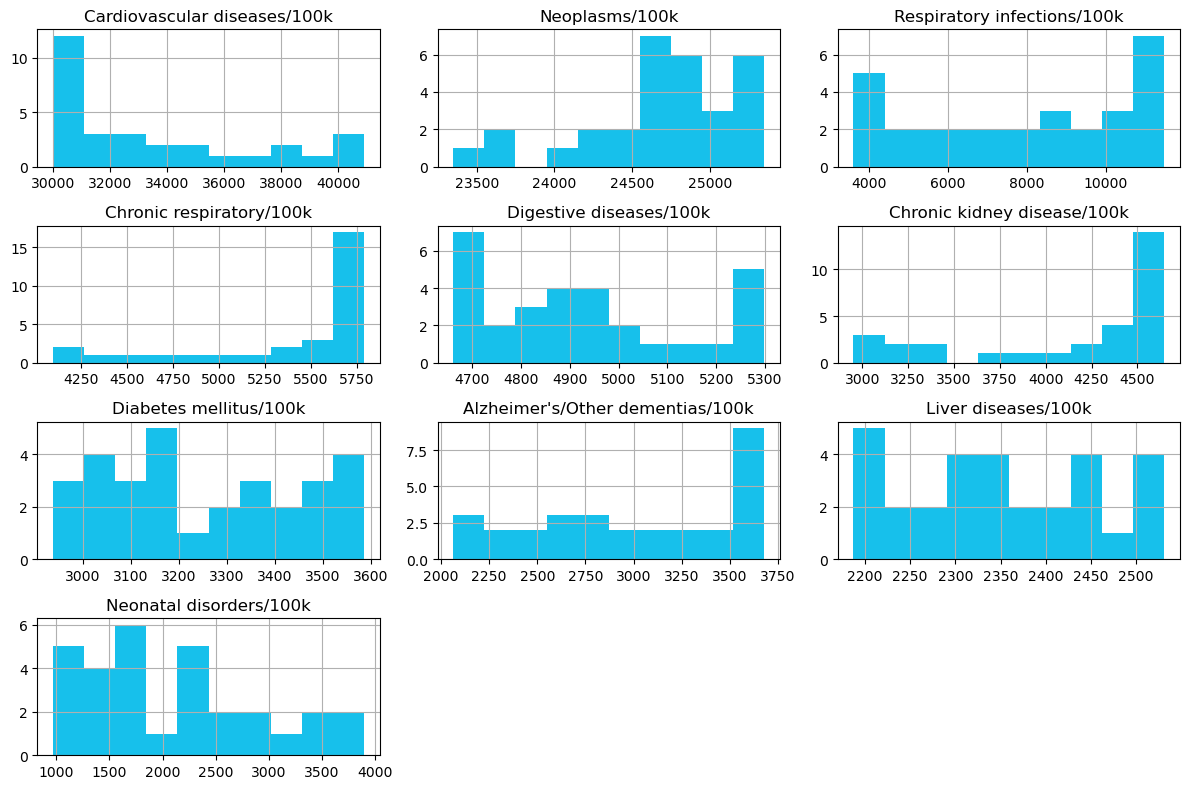

In [66]:
arg_top_col = ['Cardiovascular diseases/100k','Neoplasms/100k','Respiratory infections/100k','Chronic respiratory/100k',
               'Digestive diseases/100k','Chronic kidney disease/100k','Diabetes mellitus/100k',"Alzheimer's/Other dementias/100k",
               'Liver diseases/100k','Neonatal disorders/100k']
arg_drates[arg_top_col].hist(bins=10, figsize=(12,8), color = '#17c0eb')

plt.tight_layout()
plt.show()

## $\color{blue}{\text{Latin America & Caribbean}}$
***

### Latin America & Caribbean Descriptive Statistics

In [67]:
(latam_drates.loc[:, latam_drates.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False)

count      mean      std       min  \
Cardiovascular diseases/100k          30.0  26940.32   502.49  25397.93   
Neoplasms/100k                        30.0  17135.32  1764.49  13748.27   
Respiratory infections/100k           30.0   6221.67   485.32   5603.62   
Digestive diseases/100k               30.0   6201.22   267.80   5778.57   
Neonatal disorders/100k               30.0   4779.83  1761.33   2056.85   
Chronic respiratory/100k              30.0   4756.51   426.16   3784.44   
Diabetes mellitus/100k                30.0   4537.88   653.62   3341.81   
Interpersonal violence/100k           30.0   4455.20   243.36   3957.22   
Chronic kidney disease/100k           30.0   3893.19  1080.43   2146.99   
Road injuries/100k                    30.0   3578.33   294.15   2936.54   
Liver diseases/100k                   30.0   3445.93   142.54   3132.17   
Alzheimer's/Other dementias/100k      30.0   2689.56   690.93   1570.21   
Year                                  30.0   2004.50     8.80   1990.00   
Diarrheal diseases/100k               30.0   1906.51  1239.67    734.80   
HIV/AIDS/100k                         30.0   1480.99   292.86    701.22   
Self/100k                             30.0   1201.22    62.52   1050.34   
Nutritional deficiencies/100k         30.0   1199.01   421.11    689.51   
Protein/100k                          30.0   1104.84   385.48    634.19   
Tuberculosis/100k                     30.0    928.96   389.46    489.30   
Drowning/100k                         30.0    693.16   184.80    418.44   
Alcohol use disorders/100k            30.0    610.08    33.29    554.51   
Parkinson's disease/100k              30.0    568.29   121.80    368.74   
Meningitis/100k                       30.0    374.52   179.55    155.23   
Maternal disorders/100k               30.0    355.00    84.44    220.30   
Forces of Nature/100k                 30.0    319.18  1172.53      6.70   
Fire, heat, and hot substances/100k   30.0    224.73    53.79    158.29   
Malaria/100k                          30.0    134.48   107.01     26.75   
Poisonings/100k                       30.0     80.15    23.34     52.43   
Conflict and terrorism/100k           30.0     64.50    67.87      0.00   
Drug use disorders/100k               30.0     58.91    11.39     37.67   
Acute hepatitis/100k                  30.0     34.10    11.35     20.61   
Heat/Cold Exposure/100k               30.0     26.40     5.92     18.04   

                                          25%       50%       75%       max  
Cardiovascular diseases/100k         26656.43  26896.44  27120.63  28017.57  
Neoplasms/100k                       15780.21  17470.00  18649.55  19428.38  
Respiratory infections/100k           5866.31   6055.81   6352.92   7544.93  
Digestive diseases/100k               5972.61   6166.22   6418.47   6667.50  
Neonatal disorders/100k               3331.96   4723.74   6190.54   7934.97  
Chronic respiratory/100k              4576.66   4926.94   5060.67   5290.74  
Diabetes mellitus/100k                4046.78   4584.52   5024.85   5631.91  
Interpersonal violence/100k           4315.73   4435.58   4557.34   5090.15  
Chronic kidney disease/100k           2896.81   4088.68   4863.76   5330.26  
Road injuries/100k                    3413.28   3603.81   3837.55   3969.65  
Liver diseases/100k                   3353.20   3475.38   3544.61   3675.39  
Alzheimer's/Other dementias/100k      2097.37   2731.48   3309.58   3754.27  
Year                                  1997.25   2004.50   2011.75   2019.00  
Diarrheal diseases/100k                907.31   1429.62   2568.21   4805.98  
HIV/AIDS/100k                         1299.16   1507.04   1729.79   1822.89  
Self/100k                             1164.19   1218.06   1256.87   1266.14  
Nutritional deficiencies/100k          808.90   1144.47   1538.24   1996.16  
Protein/100k                           745.83   1059.53   1418.78   1827.89  
Tuberculosis/100k                      601.28    803.40   1213.45   1732.21  
D

- #### As in all the studied subsets, Latin America & the Caribbean also present the cardiovascular diseases and neoplasms as their death causes with highest rate means. Both of them present very similar mean and median values.

- #### The lowest death rate was that of heat or cold exposure.

- #### Within the highest death rate causes we find some that may be associated to low income countries, such as respiratory infections, neonatal disorders, interpersonal violence or road injuries.

### Boxplots - Top 10 LatAm & Caribbean Death Causes Rates

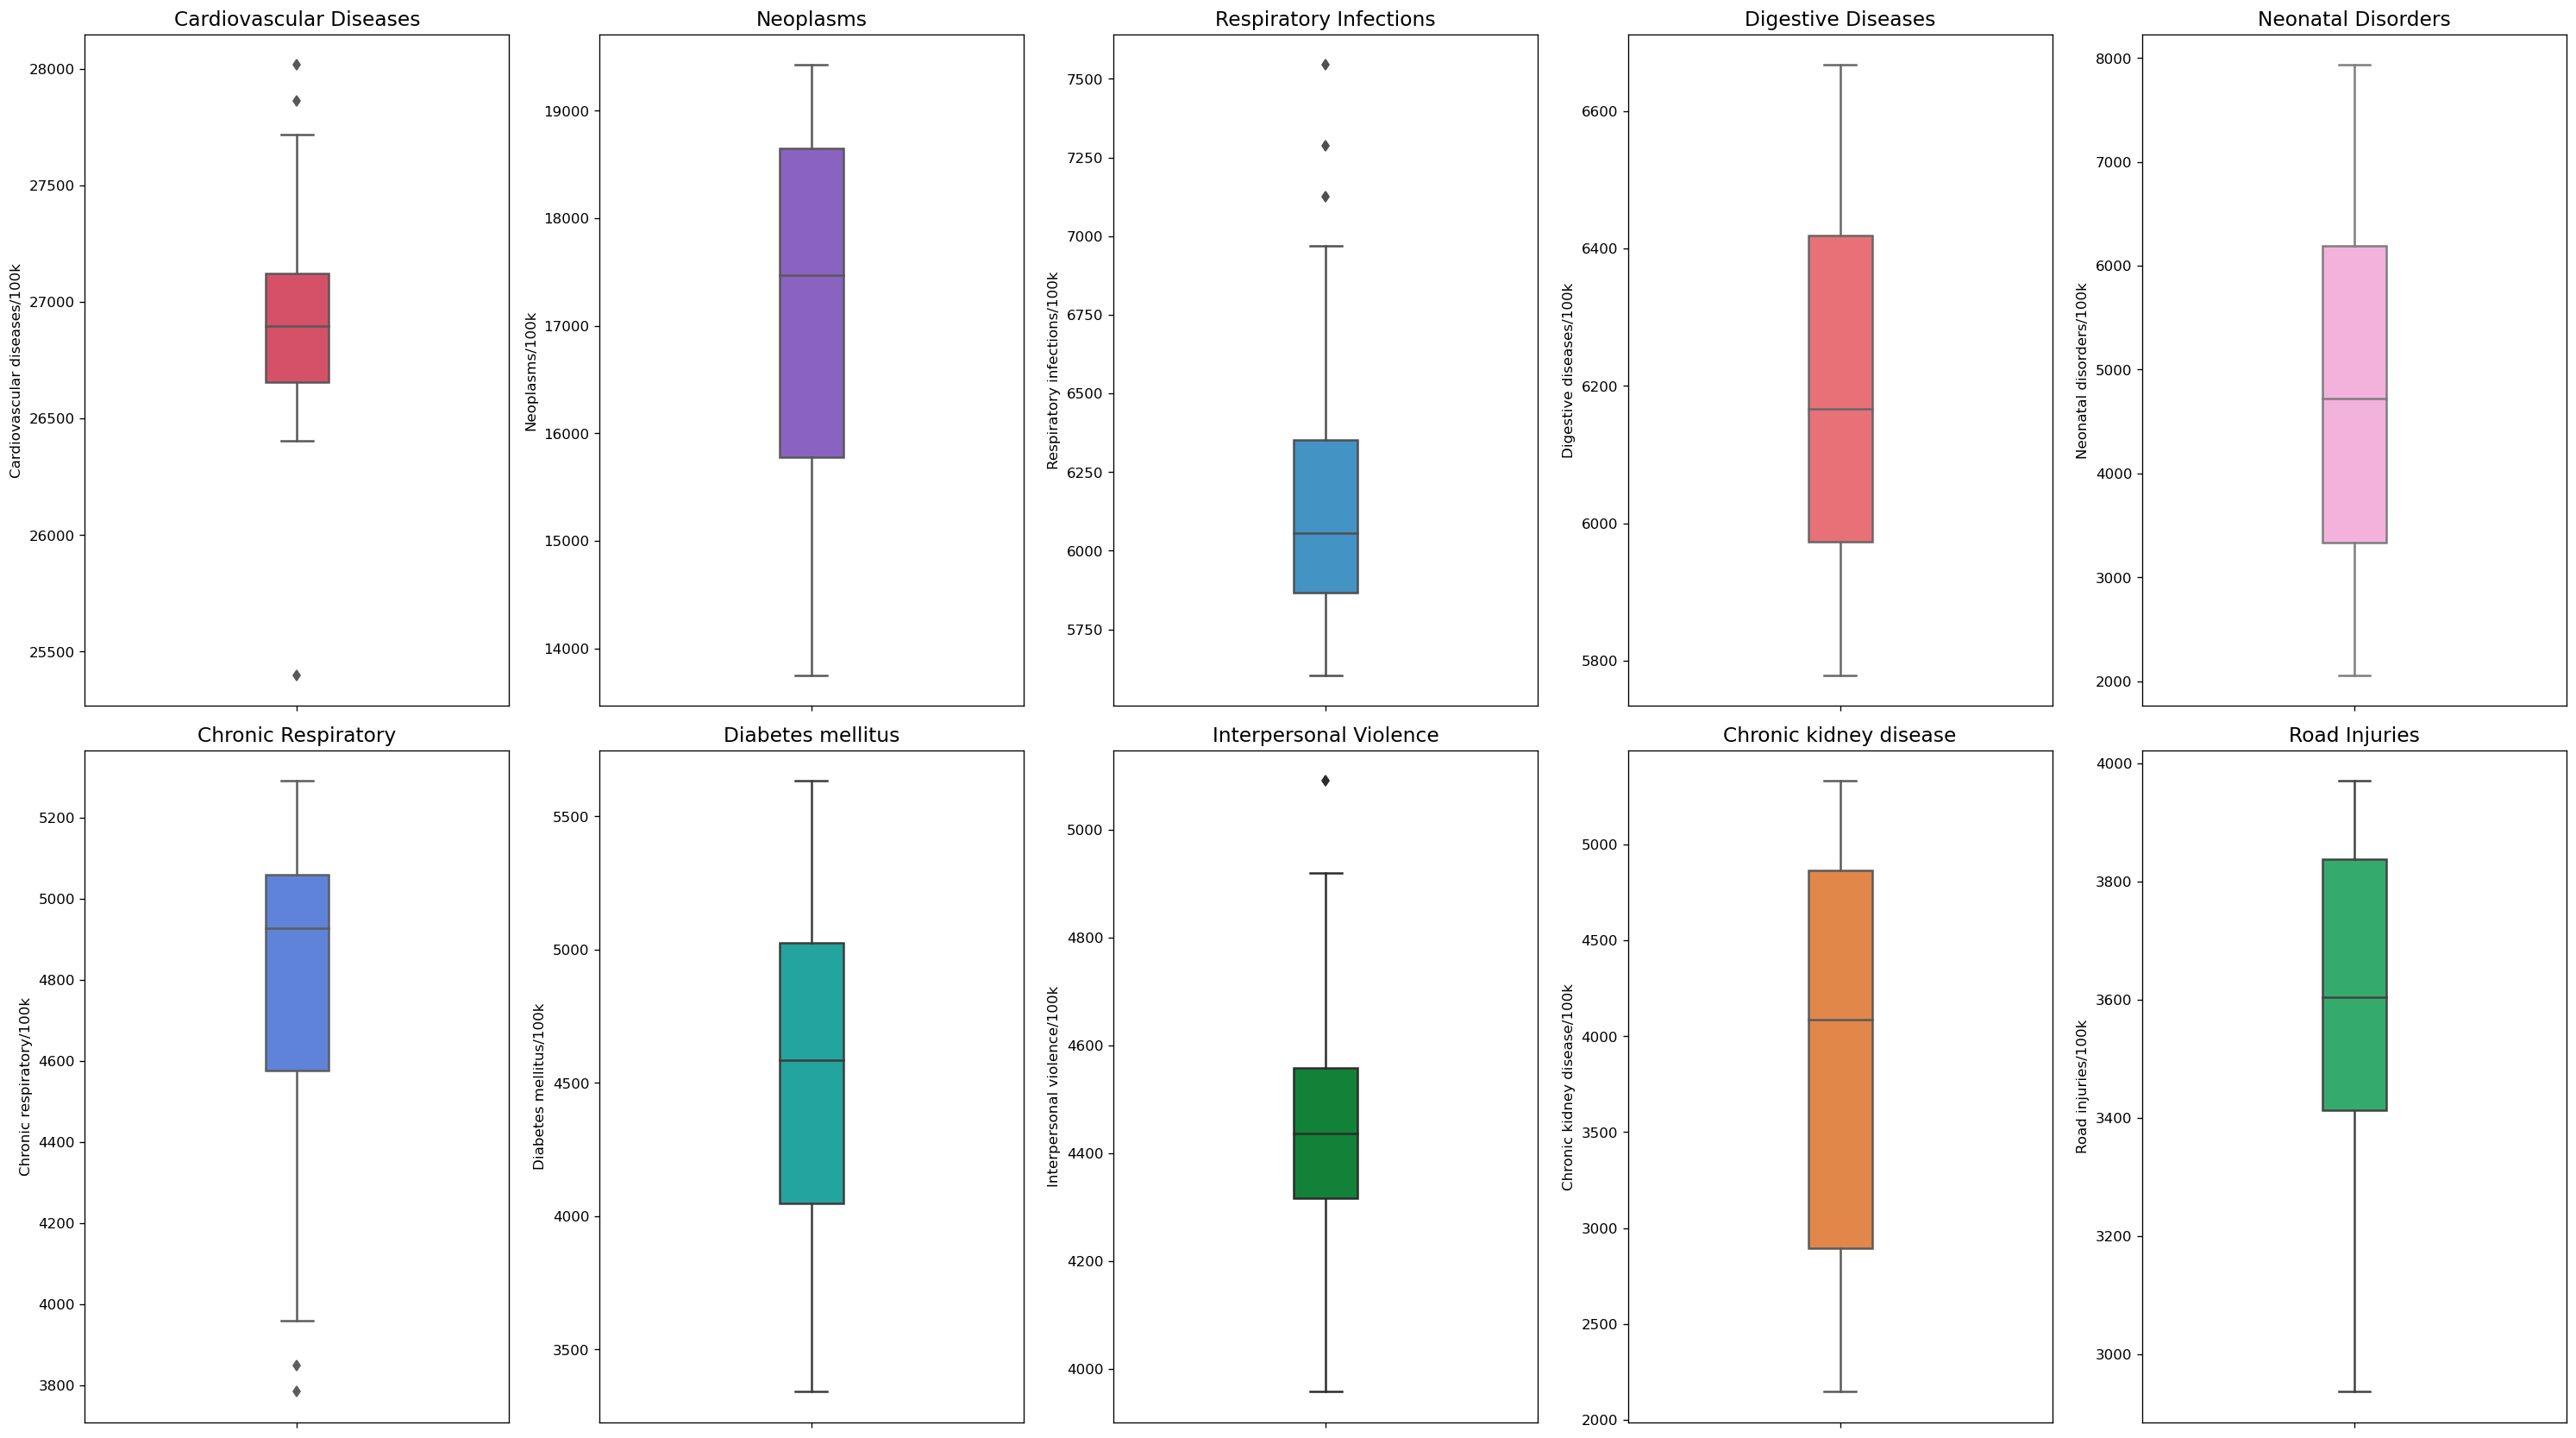

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=5,dpi=120,figsize = (25,14))

ax[0,0].set_title('Cardiovascular Diseases',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Cardiovascular diseases/100k'], data=latam_drates, color='#eb3b5a', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Neoplasms',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Neoplasms/100k'], data=latam_drates, color='#8854d0', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Respiratory Infections',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Respiratory infections/100k'], data=latam_drates, color='#2d98da', width = 0.15, ax = ax[0,2])

ax[0,3].set_title('Digestive Diseases',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Digestive diseases/100k'], data=latam_drates, color='#fc5c65', width = 0.15, ax = ax[0,3])

ax[0,4].set_title('Neonatal Disorders',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Neonatal disorders/100k'], data=latam_drates, color='#FDA7DF', width = 0.15, ax = ax[0,4])

ax[1,0].set_title('Chronic Respiratory',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Chronic respiratory/100k'], data=latam_drates, color='#4b7bec', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('Diabetes mellitus',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Diabetes mellitus/100k'], data=latam_drates, color='#0fb9b1', width = 0.15, ax = ax[1,1])

ax[1,2].set_title('Interpersonal Violence',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Interpersonal violence/100k'], data=latam_drates, color='#009432', width = 0.15, ax = ax[1,2])

ax[1,3].set_title('Chronic kidney disease',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Chronic kidney disease/100k'], data=latam_drates, color='#fa8231', width = 0.15, ax = ax[1,3])

ax[1,4].set_title('Road Injuries',fontdict={'fontsize':14})
sns.boxplot(y = latam_drates['Road injuries/100k'], data=latam_drates, color='#20bf6b', width = 0.15, ax = ax[1,4])


plt.tight_layout()
plt.show()


#### These boxplots show that most of the top rate death causes distributions are more even within the Latin American group. That is to say, even cardiovascular and neoplasm diseases display a narrow range of rate values, although some outliers can be seen throughout this plots.

### Histograms - Top 10 LatAm & Caribbean Death Causes Rates

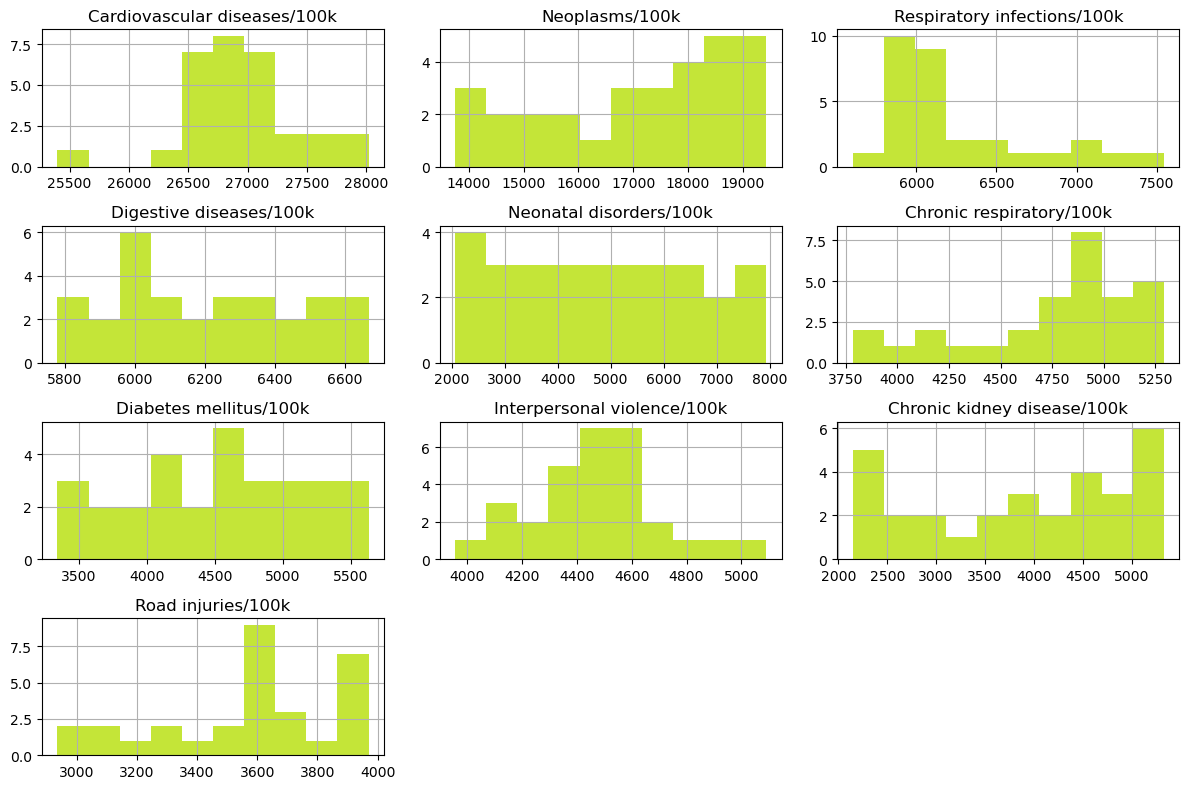

In [69]:
latam_top_col = ['Cardiovascular diseases/100k','Neoplasms/100k','Respiratory infections/100k','Digestive diseases/100k',
                 'Neonatal disorders/100k','Chronic respiratory/100k','Diabetes mellitus/100k','Interpersonal violence/100k',
                 'Chronic kidney disease/100k','Road injuries/100k']

latam_drates[latam_top_col].hist(bins=10, figsize=(12,8), color = '#C4E538')

plt.tight_layout()
plt.show()

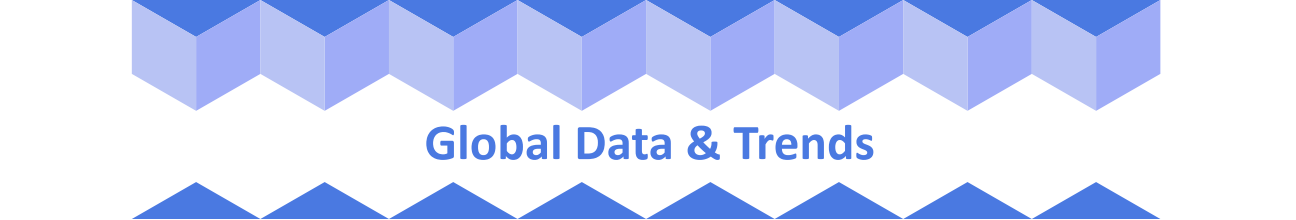

#### Next, I will analyze the global trends in terms of the number of deaths by cause and the death rates of each cause.

## $\color{blue}{\text{Total Number of Deaths by Cause}}$
***

In [70]:
deaths_per_cause = country_data.sum()
df_deathPerCause = pd.DataFrame(deaths_per_cause, columns = ['Total No. of Deaths'])
df_deathPerCause.drop(['Entity', 'Code', 'Year'], inplace=True)
df_deathPerCause.sort_values('Total No. of Deaths', ascending=False, inplace=True) # Sorting by totals, from max to min.
df_deathPerCause#.head(10)

Total No. of Deaths
Total Deaths                            1484987221
Cardiovascular diseases                  454182455
Neoplasms                                234816322
Chronic respiratory                      105867114
Respiratory infections                    84976262
Neonatal disorders                        76920166
Digestive diseases                        66448921
Diarrheal diseases                        66270350
Tuberculosis                              45865304
Liver diseases                            37716507
Road injuries                             36407090
HIV/AIDS                                  36375428
Diabetes mellitus                         31639524
Alzheimer's/Other dementias               30512267
Chronic kidney disease                    29076534
Malaria                                   25342676
Self                                      23879889
Nutritional deficiencies                  13796901
Interpersonal violence                    12766452
Protein                                   12034798
Meningitis                                10535810
Drowning                                  10311773
Maternal disorders                         7728753
Parkinson's disease                        7354460
Alcohol use disorders                      4855865
Acute hepatitis                            3785449
Fire, heat, and hot substances             3618137
Conflict and terrorism                     3294981
Drug use disorders                         2715337
Poisonings                                 2606851
Heat/Cold Exposure                         1794317
Forces of Nature                           1490528

- Almost **1.5 billion** deaths were recorded in this dataset, covering a three decade span on a **global scale**.
- Along that period, the vast majority of deaths were due to **cardiovascular diseases**, followed by those caused by **neosplasms**. The previous EDA section suggested that cardiovascular diseases were the main cause of death in all the subsets analyzed in this project.
- Among the most frequent causes of death, there are some that are **presumably associated to low income countries** (i.e. respiratory infections, tuberculosis, neonatal disorders, diarrheal diseases, HIV/AIDS, road injuries). In the next section (Income Class & Causes of Death) I will analyze if there is a significant difference between the rates of these causes of death of High and Low income countries.

- #### Selecting Top 10 Death Causes Worldwide

In [71]:
globalTop10 = df_deathPerCause[1:11]

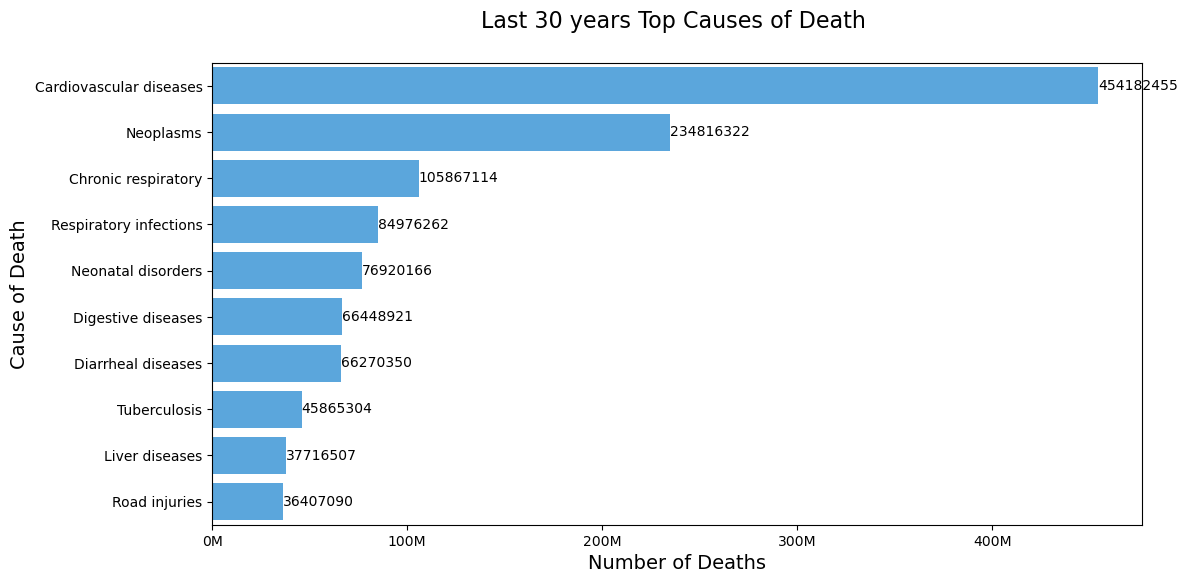

In [72]:
# Checking 'Total No. of Deaths' is numeric
globalTop10['Total No. of Deaths'] = pd.to_numeric(globalTop10['Total No. of Deaths'], errors='coerce')

# Creating a horizontal bar chart with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total No. of Deaths', y=globalTop10.index, data=globalTop10, color='#45aaf2')

# Adding values at the tips of the bars
for index, value in enumerate(globalTop10['Total No. of Deaths']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Number of Deaths', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Last 30 years Top Causes of Death \n', fontsize = 16)

# Function to format x-axis tick labels as millions
def format_ticks_millions(value, _):
    return '{:.0f}M'.format(value * 1e-6)

# Format x-axis tick labels as millions using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks_millions))

plt.show()


- #### The number of deaths caused by cardiovascular diseases is overwhelmingly superior. Followed in the distance by deaths caused by neoplasms (which includes cancer).
- #### Following these two causes, the third and fourth most frequent causes of death were those related to respiratory problems.
- #### The rest of the causes of death are more evenly distributed. It is surprising to find that neonatal disorders was the fifth most common death cause in the last 30 years, since technology and medicine showed many advances in that area.
- #### The presence of Tuberculosis as one of the top 10 most frequent causes of death is worrying, since it is a controlled disease in most of the countries.
- #### It is remarkable too the presence of road injuries as the tenth most frequent cause of death, since those are not a biological reason and could be avoided with better investment in roads and car safety. 

- #### Top 10 Death Causes Treemap

In [73]:
# Selecting only the top 10 causes of death worldwide
worldTop10 = df_deathPerCause.index[1:11] # Top 10 causes of death worldwide

In [74]:
df_top10 = country_data[worldTop10]
df_top10.head()

Cardiovascular diseases  Neoplasms  Chronic respiratory  \
0                    44899      11580                 5945   
1                    45492      11796                 6050   
2                    46557      12218                 6223   
3                    47951      12634                 6445   
4                    49308      12914                 6664   

   Respiratory infections  Neonatal disorders  Digestive diseases  \
0                   23741               15612                5005   
1                   24504               17128                5120   
2                   27404               20060                5335   
3                   31116               22335                5568   
4                   33390               23288                5739   

   Diarrheal diseases  Tuberculosis  Liver diseases  Road injuries  
0                4235          4661            2673           4154  
1                4927          4743            2728           4472  
2                6123          4976            2830           5106  
3                8174          5254            2943           5681  
4                8215          5470            3027           6001

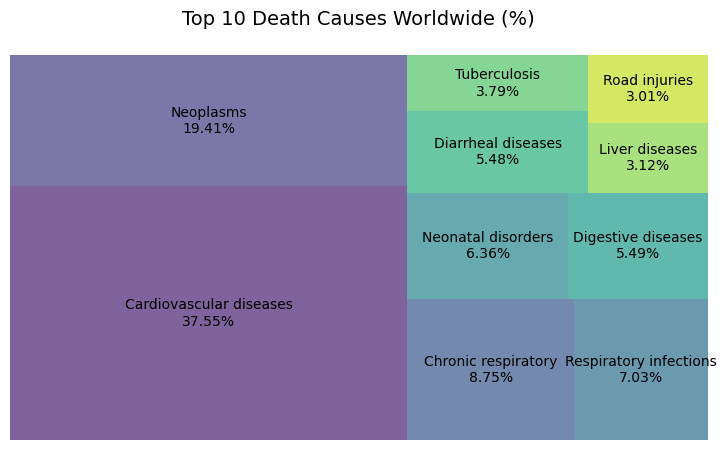

In [75]:
# Estimating percentages
percent = (df_top10.sum() / df_top10.sum().sum()) * 100

# Labels for the treemap(tm)
tm_labels = [f"{cause}\n{percentage:.2f}%" for cause, percentage in percent.items()]

# Setting color palette
colors = sns.color_palette('viridis', len(percent))

# Treemap construction
plt.figure(figsize=(9, 5))
squarify.plot(sizes=percent, label=tm_labels, alpha=0.7, color=colors)

# Title
plt.title('Top 10 Death Causes Worldwide (%)\n', fontsize=14)

# Getting rid of axes
plt.axis('off')

plt.show()


- #### This treemap shows us that, among the 10 most frequent causes of death on a global scale through the last three decades, cardiovascular diseases were the most prevalent with approximately 38% of the deceased, followed by deaths caused by neoplasms (which include any abnormal tissue growth, like benign and malignant tumors) with nearly 20%. This means that more than half of the deaths produced by the top 10 causes worldwide in the last thirty years were due to these two reasons.

- #### More than 15% of the deaths among the top 10 causes were a consequence of respiratory illnesses.

- #### Alas, some of the 10 most frequent death causes in the past thirty years were due to illnesses or infections that nowadays are erradicated (such as tuberculosis) or more controlled (i.e. HIV/AIDS) in many countries.

## $\color{blue}{\text{Cause of Death Rates}}$
***

In [76]:
# Working with the means of each death cause and selecting top 10
country_desc_stats = pd.DataFrame((country_rates_df.loc[:, country_rates_df.columns != 'Total Deaths'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False))
country_desc_stats.reset_index(inplace=True)
global_mean_rates = pd.DataFrame()
global_mean_rates['Cause'] = country_desc_stats['index'][0:10]
global_mean_rates['Mean'] = country_desc_stats['mean'][0:10]
global_mean_rates

Cause      Mean
0  Cardiovascular diseases/100k  31360.64
1                Neoplasms/100k  15965.38
2   Respiratory infections/100k   6139.59
3       Neonatal disorders/100k   4868.31
4       Digestive diseases/100k   4446.36
5      Chronic respiratory/100k   4365.19
6        Diabetes mellitus/100k   3601.63
7                 HIV/AIDS/100k   3402.13
8       Diarrheal diseases/100k   3352.90
9            Road injuries/100k   2695.14

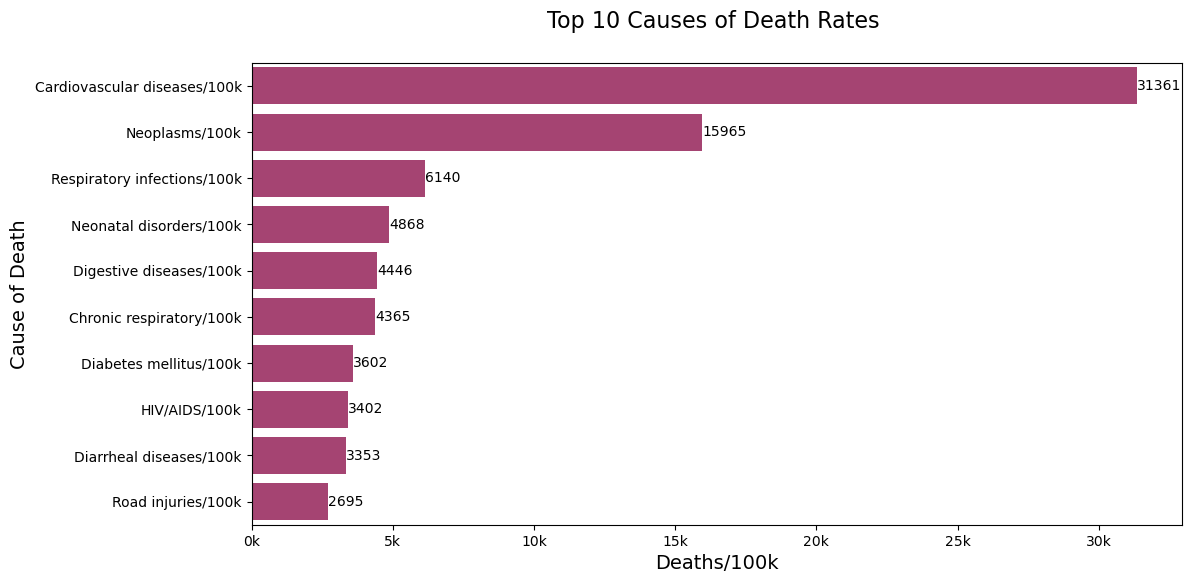

In [77]:
# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mean', y=global_mean_rates['Cause'], data=global_mean_rates, color='#B53471')

# Adding values at the tips of the bars
for index, value in enumerate(global_mean_rates['Mean']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Deaths/100k', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Top 10 Causes of Death Rates \n', fontsize = 16)

# Function to format x-axis tick labels as thousands
def format_ticks(value, _):
    return '{:.0f}k'.format(value * 1e-3)

# Format x-axis tick labels as thousands using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


- #### Seeing this plot it is clearer that there is an enormous difference between the death rates of cardiovascular diseases and the remaining death causes. Almost twice as high as the second highest rate: Neoplasms.
- #### Again, it is worrying to see that within the top 10 global highest death rates we find many that are supposedly associated to low income countries.

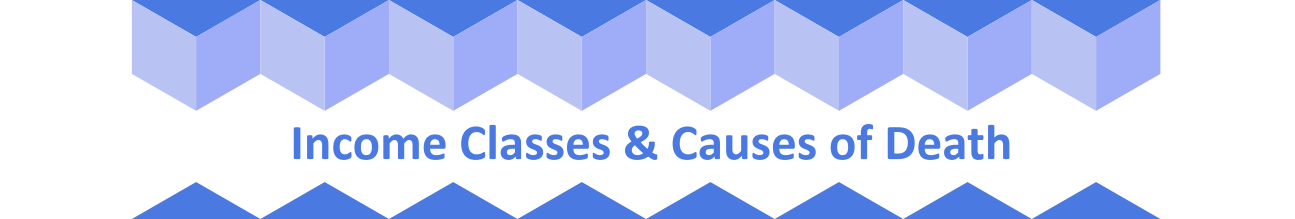

## $\color{blue}{\text{Cause of Death Rates}}$
***

### High Income

In [78]:
# Working with the means of each death cause and selecting top 10
hi_income_stats = pd.DataFrame((hi_income_rates.loc[:, hi_income_rates.columns != 'Year'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False))
hi_income_stats.reset_index(inplace=True)
hiIncome_mean_rates = pd.DataFrame()
hiIncome_mean_rates['Cause'] = hi_income_stats['index'][0:10]
hiIncome_mean_rates['Mean'] = hi_income_stats['mean'][0:10]
hiIncome_mean_rates

Cause      Mean
0      Cardiovascular diseases/100k  37186.93
1                    Neoplasms/100k  28665.28
2          Chronic respiratory/100k   5418.59
3  Alzheimer's/Other dementias/100k   4905.24
4           Digestive diseases/100k   4795.91
5       Respiratory infections/100k   3969.11
6            Diabetes mellitus/100k   2425.38
7       Chronic kidney disease/100k   2363.61
8               Liver diseases/100k   2347.04
9                         Self/100k   1843.48

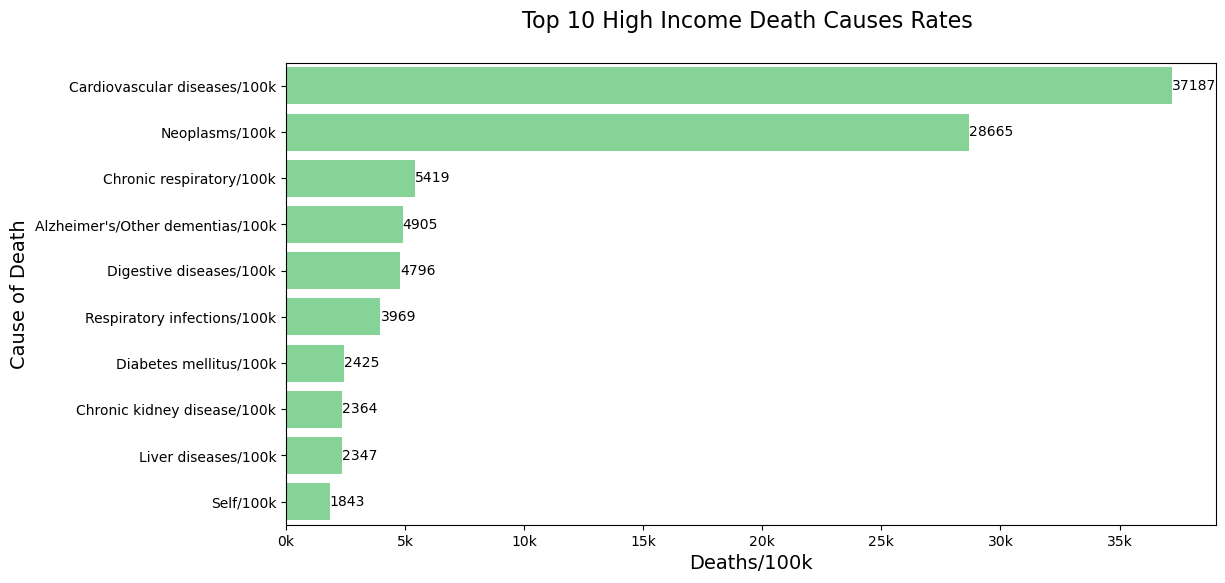

In [79]:
# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mean', y=hiIncome_mean_rates['Cause'], data=hiIncome_mean_rates, color='#78e08f')

# Adding values at the tips of the bars
for index, value in enumerate(hiIncome_mean_rates['Mean']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Deaths/100k', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Top 10 High Income Death Causes Rates \n', fontsize = 16)

# Function to format x-axis tick labels as thousands
def format_ticks(value, _):
    return '{:.0f}k'.format(value * 1e-3)

# Format x-axis tick labels as thousands using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


- #### As in global trends, the rate of deaths caused by cardiovascular diseases and neoplasms is outstanding.
- #### As noted before, it is curious to find Alzheimer's and other dementias with such a high death rate, being the fourth highest in high income countries.
- #### Causes like neonatal and maternal disorders, or road injuries, or tuberculosis are not present in the top 10 highest death rates.
- #### The tenth highest death rate within the high income countries corresponds to self inflicted, which includes suicides.

### Low Income

In [80]:
# Working with the means of each death cause and selecting top 10
lo_income_stats = pd.DataFrame((lo_income_rates.loc[:, lo_income_rates.columns != 'Year'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False))
lo_income_stats.reset_index(inplace=True)
loIncome_mean_rates = pd.DataFrame()
loIncome_mean_rates['Cause'] = lo_income_stats['index'][0:10]
loIncome_mean_rates['Mean'] = lo_income_stats['mean'][0:10]
loIncome_mean_rates

Cause      Mean
0   Cardiovascular diseases/100k  12194.75
1        Neonatal disorders/100k  10178.76
2    Respiratory infections/100k  10140.66
3                  HIV/AIDS/100k   9918.07
4        Diarrheal diseases/100k   9582.05
5                   Malaria/100k   8134.68
6              Tuberculosis/100k   6345.94
7                 Neoplasms/100k   5381.88
8        Digestive diseases/100k   3367.80
9  Nutritional deficiencies/100k   3333.09

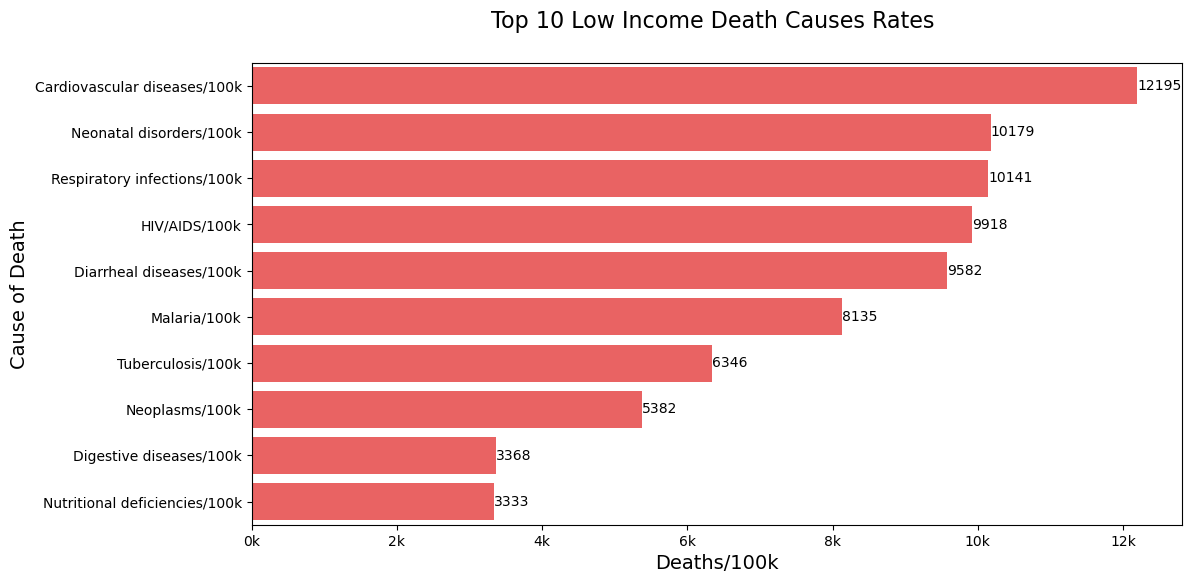

In [81]:
# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mean', y=loIncome_mean_rates['Cause'], data=loIncome_mean_rates, color='#ff4d4d')

# Adding values at the tips of the bars
for index, value in enumerate(loIncome_mean_rates['Mean']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Deaths/100k', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Top 10 Low Income Death Causes Rates \n', fontsize = 16)

# Function to format x-axis tick labels as thousands
def format_ticks(value, _):
    return '{:.0f}k'.format(value * 1e-3)

# Format x-axis tick labels as thousands using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


- #### One characteristic that is seen in this plot and not in the other horizontal bar charts of other subsets is that it presents more balanced death rates between the different causes.
- #### The rates of neonatal disorders and respiratory infections, two causes that might be associated with worse health infrastructure, are the second and third highest rates.
- #### The same happens with diarrheal diseases, HIV/AIDS or digestive diseases. Deaths that may be avoided with the tools we have nowadays.
- #### Nutritional deficiencies present the tenth highest death rate.

## $\color{blue}{\text{Comparing Causes of Death between Income classes}}$
***

### Respiratory Infections

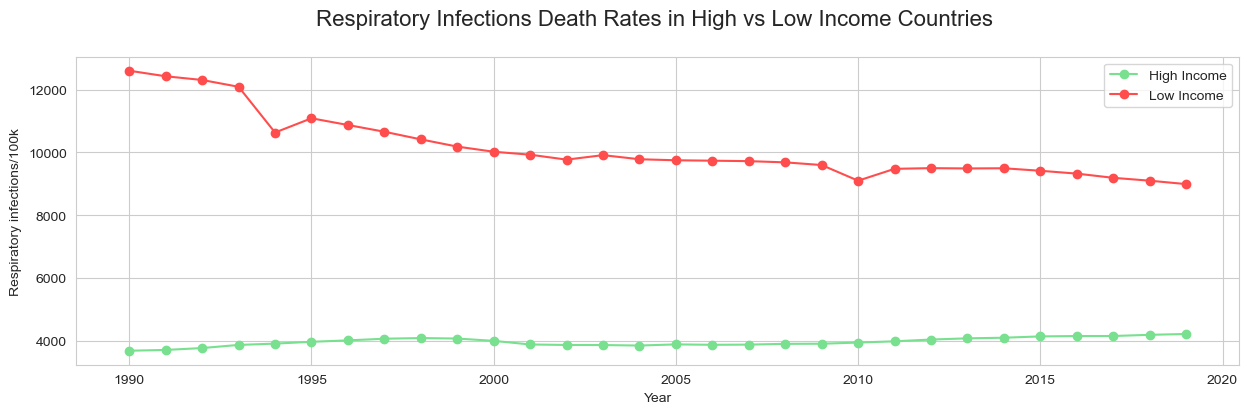

In [84]:
# Select a cause of death

selected_cause = 'Respiratory infections/100k'

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title('Respiratory Infections Death Rates in High vs Low Income Countries \n', fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**This time series shows us the evolution of the respiratory infection's death rate (per 100k deaths) along the last three decades in both high and low income countries. Through all these years, the highest rates correspond to the low income countries. Although their rate seems to be lowering, it still doubles that of high income countries. This chart seems to correspond to the initial idea that states that there is a higher prevalence of infections (and consequent deaths due to these) in lower income countries. This might have to do with worse hospital infrastructure, less hygienic environments, worse water quality, etc.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [115]:
resp_non_parametric = mannwhitneyu(hi_income_rates['Respiratory infections/100k'],
                                   lo_income_rates['Respiratory infections/100k'])

print(f"Mann-Whitney U Test Statistic: {resp_non_parametric.statistic}")
print(f"P-value: {resp_non_parametric.pvalue}")

if resp_non_parametric.pvalue < 0.05 and resp_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif resp_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 0.0
P-value: 3.019859359162157e-11
The difference between distributions is highly significant.


### Neonatal Disorders

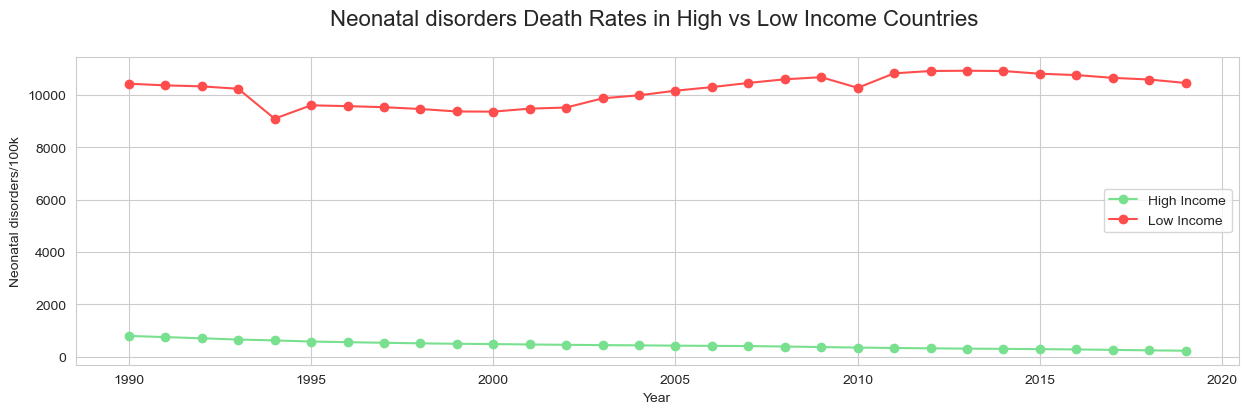

In [87]:
# Select a cause of death

selected_cause = 'Neonatal disorders/100k'

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title('Neonatal disorders Death Rates in High vs Low Income Countries \n', fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**As with respiratory infections, neonatal disorders _a priori_ could be related to worse hospital infrastructures and health systems, or even to a worse maternal nutrition (by the time of the pregnancy or at early development stages of the mother). This chart shows us that deaths due to Neonatal disorders are almost exclusively present at low income countries. Alas, low income countries rate seems to remain constant along the time, with almost 1000 out of 100,000 deaths being due to this reason.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [112]:
neon_non_parametric = mannwhitneyu(hi_income_rates['Neonatal disorders/100k'],
                                   lo_income_rates['Neonatal disorders/100k'])

print(f"Mann-Whitney U Test Statistic: {neon_non_parametric.statistic}")
print(f"P-value: {neon_non_parametric.pvalue}")

if neon_non_parametric.pvalue < 0.05 and neon_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif neon_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 0.0
P-value: 3.019859359162157e-11
The difference between distributions is highly significant.


### Maternal Disorders

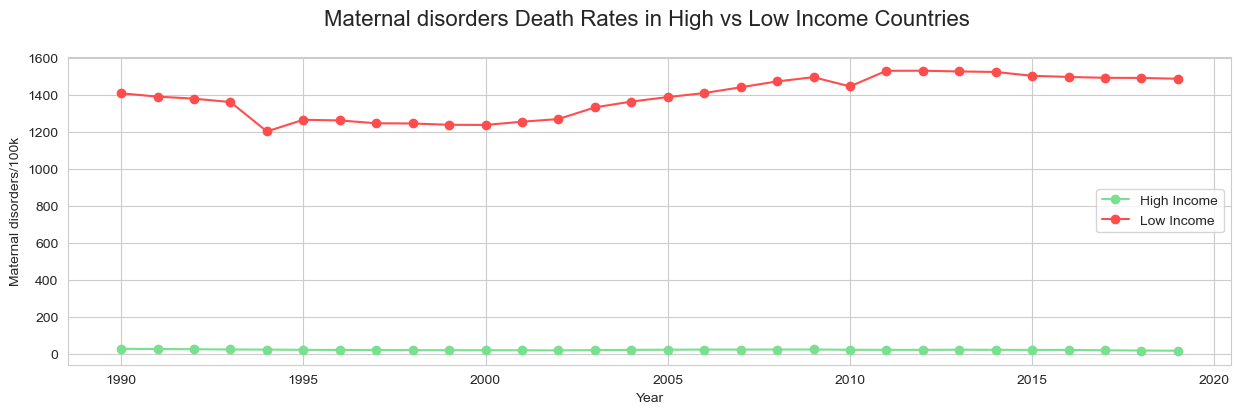

In [88]:
# Select a cause of death

selected_cause = "Maternal disorders/100k"

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title("Maternal disorders Death Rates in High vs Low Income Countries \n", fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**Although much lower than the neonatal disorders death rate, the maternal disorders deaths also seem to be mainly a problem in low income countries. And it is also approximately constant through the years, remaining above the 1440/100,000 deaths rate.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [114]:
mater_non_parametric = mannwhitneyu(hi_income_rates['Maternal disorders/100k'],
                                   lo_income_rates['Maternal disorders/100k'])

print(f"Mann-Whitney U Test Statistic: {mater_non_parametric.statistic}")
print(f"P-value: {mater_non_parametric.pvalue}")

if mater_non_parametric.pvalue < 0.05 and mater_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif mater_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 0.0
P-value: 3.0179667984904466e-11
The difference between distributions is highly significant.


 ### Nutritional Deficiencies

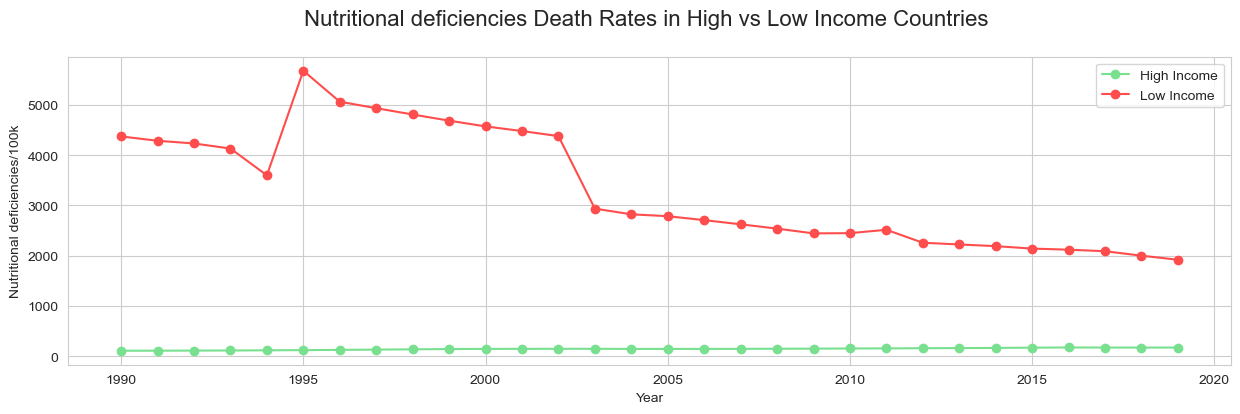

In [89]:
# Select a cause of death

selected_cause = 'Nutritional deficiencies/100k'

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title('Nutritional deficiencies Death Rates in High vs Low Income Countries \n', fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**As expected, the deaths due to nutritional deficiencies are almost exclusive to low income countries. What is encouraging about this chart is that this rate is following a descendant trend through the years, meaning that constant efforts to end these kind of deficiencies seem to be working and should be reinforced.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [116]:
nutr_non_parametric = mannwhitneyu(hi_income_rates['Nutritional deficiencies/100k'],
                                   lo_income_rates['Nutritional deficiencies/100k'])

print(f"Mann-Whitney U Test Statistic: {nutr_non_parametric.statistic}")
print(f"P-value: {nutr_non_parametric.pvalue}")

if nutr_non_parametric.pvalue < 0.05 and nutr_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif nutr_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 0.0
P-value: 3.0179667984904466e-11
The difference between distributions is highly significant.


### HIV/AIDS

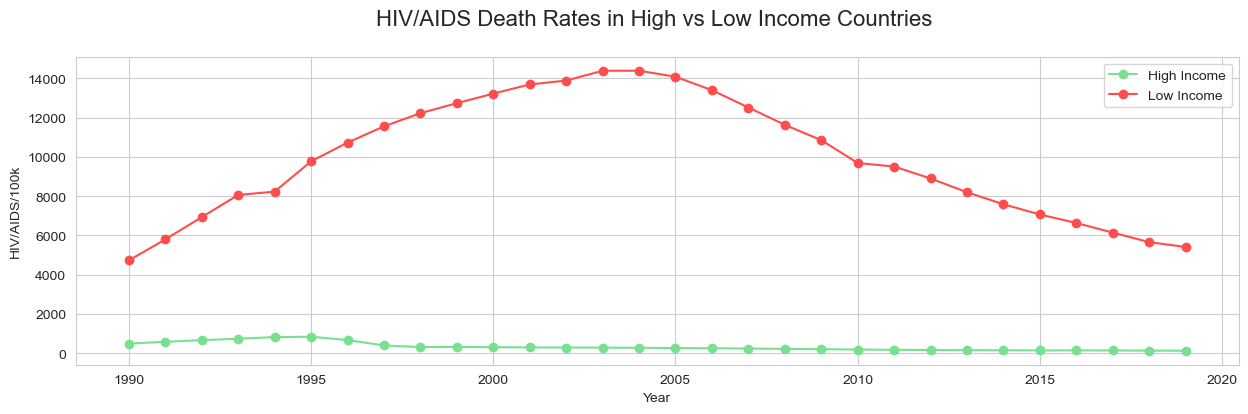

In [90]:
# Select a cause of death

selected_cause = 'HIV/AIDS/100k'

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title('HIV/AIDS Death Rates in High vs Low Income Countries \n', fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**This chart shows us that HIV/AIDS related deaths in high income countries were mostly found in the first half of the 90s, but even at that time the death rate was very low. We find the opposite in low income countries, where the death rate of HIV/AIDS was immensely higher, reaching its peak at the first half of this century's first decade.
New scientific advances and efficient campaigns seem to have helped significantly to the steep descent of HIV/AIDS death rate since 2005 to this day.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [118]:
hiv_non_parametric = mannwhitneyu(hi_income_rates['HIV/AIDS/100k'],
                                   lo_income_rates['HIV/AIDS/100k'])

print(f"Mann-Whitney U Test Statistic: {hiv_non_parametric.statistic}")
print(f"P-value: {hiv_non_parametric.pvalue}")

if hiv_non_parametric.pvalue < 0.05 and hiv_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif hiv_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 0.0
P-value: 3.019859359162157e-11
The difference between distributions is highly significant.


### Road Injuries

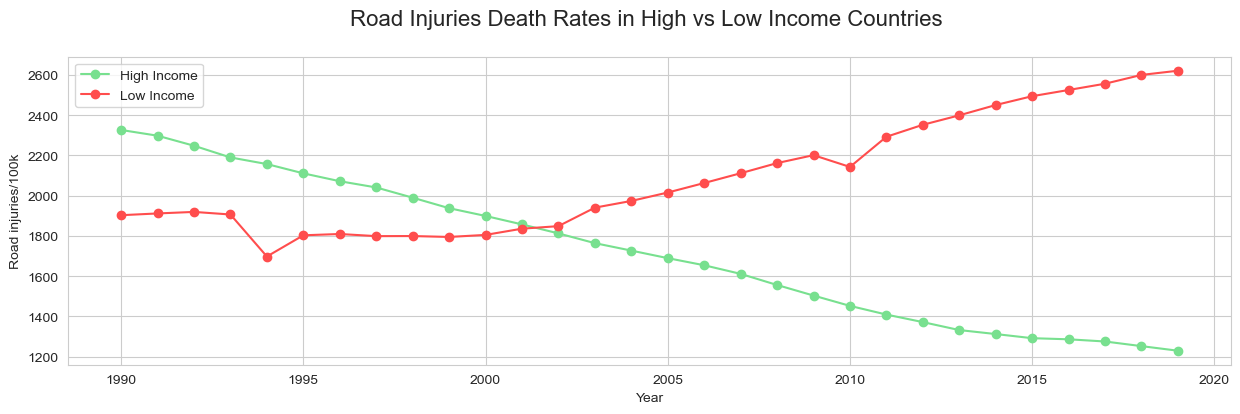

In [91]:
# Select a cause of death

selected_cause = 'Road injuries/100k'

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title('Road Injuries Death Rates in High vs Low Income Countries \n', fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**According to the WHO, more than 90% of road traffic deaths occur in low- and middle-income countries. Road traffic injury death rates are highest in the African region and lowest in the European region. This time series shows us that it was not always like this. Until 2001, high income countries have shown a higher death rate due to road injuries, although it was following a constant descendant trend through all these years. Conversely, low income countries followed an ascendant trend in road injuries death rate, and since 2001 there has been an increasing gap between the road injuries casualties in low and high income countries.**
**This could correspond to an access to better and safer cars in higher income countries, along with having roads in better conditions than in lower income countries. The ascent in low income road injuries rates could be related to a major insertion of the automotive industry, although not necessarily top range cars. Also, roads in low income countries usually are not properly maintained.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [119]:
road_non_parametric = mannwhitneyu(hi_income_rates['Road injuries/100k'],
                                   lo_income_rates['Road injuries/100k'])

print(f"Mann-Whitney U Test Statistic: {road_non_parametric.statistic}")
print(f"P-value: {road_non_parametric.pvalue}")

if road_non_parametric.pvalue < 0.05 and road_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif road_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 209.0
P-value: 0.0003770395640831686
The difference between distributions is highly significant.


### Alzheimer's and Other Dementias

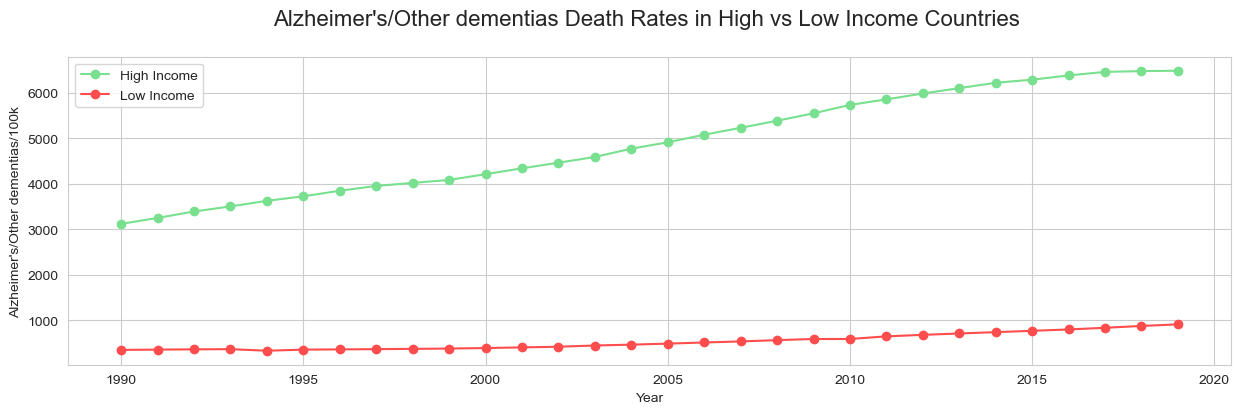

In [92]:
# Select a cause of death

selected_cause = "Alzheimer's/Other dementias/100k"

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title("Alzheimer's/Other dementias Death Rates in High vs Low Income Countries \n", fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**This chart suggests that there is a significant difference between the Alzheimer's and other dementias death rates between high income countries and low income countries. I find this interesting, since high income countries show a much higher prevalence of these kind of diseases. This fact could be associated with a higher life expectancy in high income countries, for, although these diseases are not exclusive to elder people, they are more frequent in people at advanced ages. Thus, having a more aged society could make way to a much higher prevalence of Alzheimer's disease and other dementias.** 

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [120]:
alz_non_parametric = mannwhitneyu(hi_income_rates["Alzheimer's/Other dementias/100k"],
                                   lo_income_rates["Alzheimer's/Other dementias/100k"])

print(f"Mann-Whitney U Test Statistic: {alz_non_parametric.statistic}")
print(f"P-value: {alz_non_parametric.pvalue}")

if alz_non_parametric.pvalue < 0.05 and alz_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif alz_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 900.0
P-value: 3.0179667984904466e-11
The difference between distributions is highly significant.


### Drug use disorders

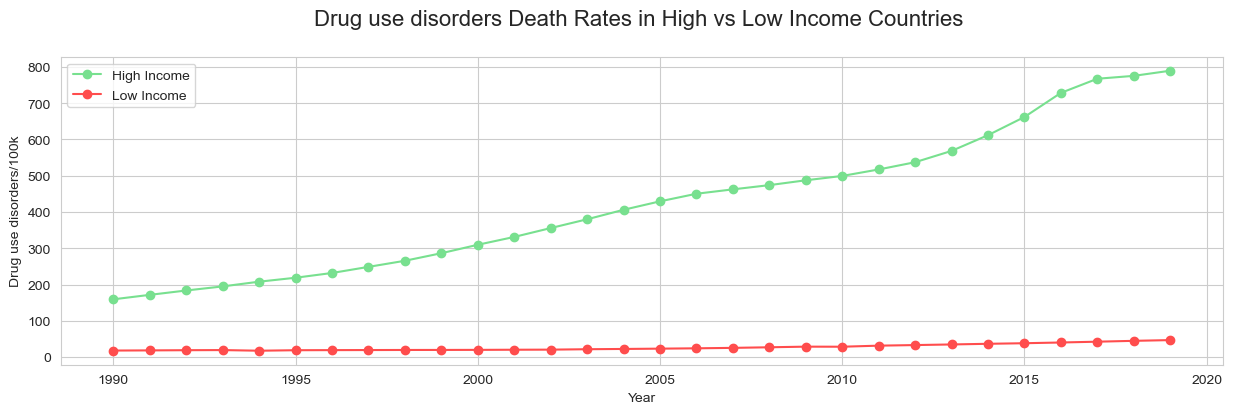

In [94]:
# Select a cause of death

selected_cause = "Drug use disorders/100k"

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title("Drug use disorders Death Rates in High vs Low Income Countries \n", fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**This death cause also shows significantly higher rates in high income countries. And this chart shows how this is a crescent problematic in these countries, since the rate of deaths due to drug use has almost increased eight times since 1990.
Although 800 out of 100,000 may seem a low rate, we should keep in mind that these are all avoidable deaths.**
**Conversely, in low income countries this has not been a significant problematic through the years.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [121]:
drug_non_parametric = mannwhitneyu(hi_income_rates['Drug use disorders/100k'],
                                   lo_income_rates['Drug use disorders/100k'])

print(f"Mann-Whitney U Test Statistic: {drug_non_parametric.statistic}")
print(f"P-value: {drug_non_parametric.pvalue}")

if drug_non_parametric.pvalue < 0.05 and drug_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif drug_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 900.0
P-value: 3.019859359162157e-11
The difference between distributions is highly significant.


### Alcohol use disorders

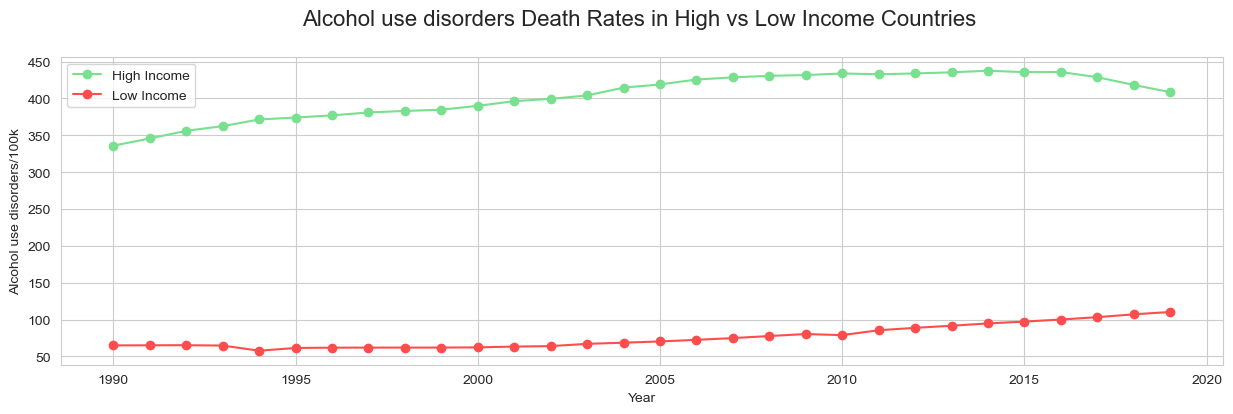

In [95]:
# Select a cause of death

selected_cause = "Alcohol use disorders/100k"

# Extract data for the selected cause in high-income countries
hi_income_cardio = hi_income_rates[['Year', selected_cause]].set_index('Year')

# Extract data for the selected cause in low-income countries
lo_income_cardio = lo_income_rates[['Year', selected_cause]].set_index('Year')

# Plotting
sns.set_style(style = 'whitegrid') # For this plot I prefer visible grids
plt.figure(figsize=(15, 4))

# Specify colors for high-income and low-income lines
hi_income_color = '#78e08f'
lo_income_color = '#ff4d4d'

plt.plot(hi_income_cardio.index, hi_income_cardio[selected_cause], label='High Income', marker='o', color=hi_income_color)
plt.plot(lo_income_cardio.index, lo_income_cardio[selected_cause], label='Low Income', marker='o', color=lo_income_color)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel(selected_cause)
plt.title("Alcohol use disorders Death Rates in High vs Low Income Countries \n", fontsize = 16 )

# Adding legend
plt.legend()

# Display the plot
plt.show()

**The rates of this death cause behave similarly to that of drug use disorders. With a much higher rate in high income countries and a very low rate in low income countries. Nevertheless, high income countries death rate of alcohol use disorders is almost half of that of drug use disorders in this group. Opposite to this, low income countries show a higher alcohol use disorders death rate than that of drug use disorders death rate in the same group.**

- #### Testing the significance of the difference - Mann-Whitney's U Statistic

In [122]:
alc_non_parametric = mannwhitneyu(hi_income_rates['Alcohol use disorders/100k'],
                                   lo_income_rates['Alcohol use disorders/100k'])

print(f"Mann-Whitney U Test Statistic: {alc_non_parametric.statistic}")
print(f"P-value: {alc_non_parametric.pvalue}")

if alc_non_parametric.pvalue < 0.05 and alc_non_parametric.pvalue > 0.01:
    print("The distributions are significantly different.")
elif alc_non_parametric.pvalue < 0.01:
    print("The difference between distributions is highly significant.")
else:
    print("There is not enough evidence to suggest a significant difference in distributions.")

Mann-Whitney U Test Statistic: 900.0
P-value: 3.019859359162157e-11
The difference between distributions is highly significant.


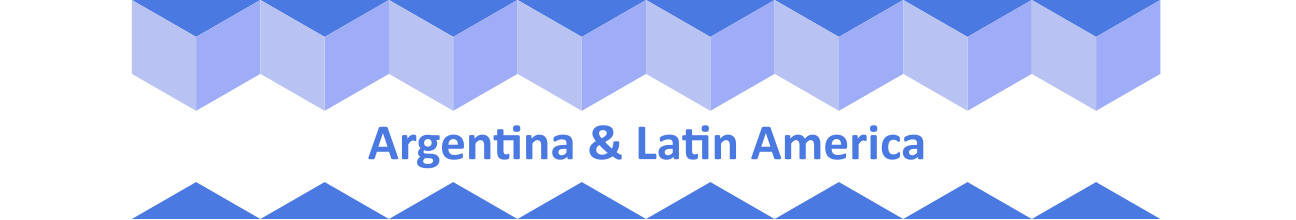

## $\color{blue}{\text{Argentina}}$
***

In [128]:
# Working with the means of each death cause and selecting top 10
arg_stats = pd.DataFrame((arg_drates.loc[:, arg_drates.columns != 'Year'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False))
arg_stats.reset_index(inplace=True)
arg_mean_rates = pd.DataFrame()
arg_mean_rates['Cause'] = arg_stats['index'][0:10]
arg_mean_rates['Mean'] = arg_stats['mean'][0:10]
arg_mean_rates

Cause      Mean
0      Cardiovascular diseases/100k  33476.87
1                    Neoplasms/100k  24683.32
2       Respiratory infections/100k   7898.22
3          Chronic respiratory/100k   5382.51
4           Digestive diseases/100k   4928.19
5       Chronic kidney disease/100k   4129.68
6            Diabetes mellitus/100k   3259.72
7  Alzheimer's/Other dementias/100k   3011.10
8               Liver diseases/100k   2350.11
9           Neonatal disorders/100k   2114.70

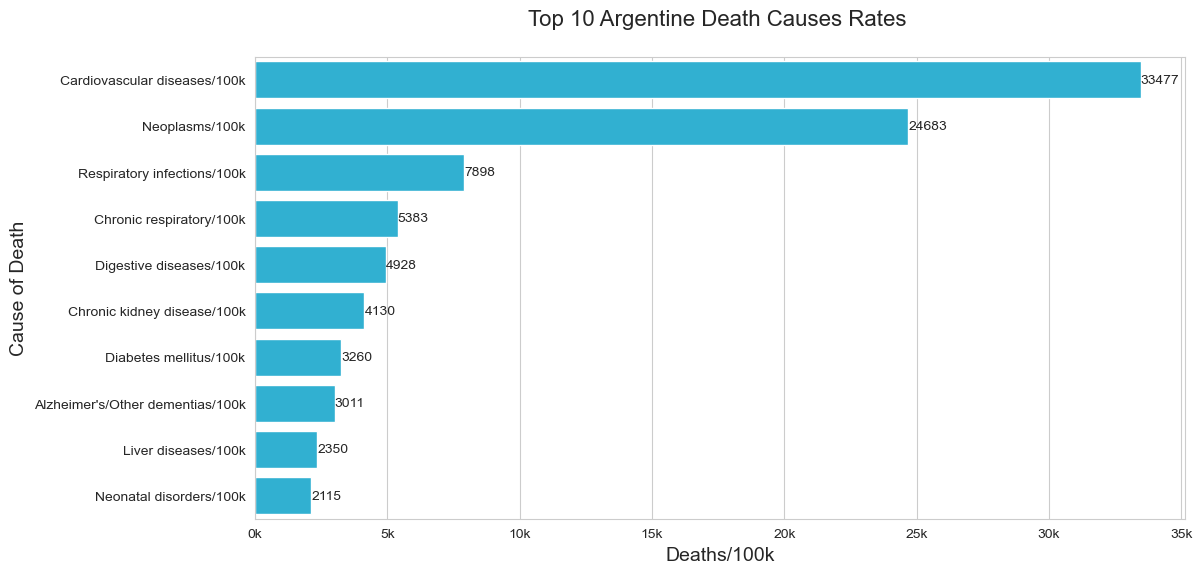

In [130]:
# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mean', y=arg_mean_rates['Cause'], data=arg_mean_rates, color='#17c0eb')

# Adding values at the tips of the bars
for index, value in enumerate(arg_mean_rates['Mean']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Deaths/100k', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Top 10 Argentine Death Causes Rates \n', fontsize = 16)

# Function to format x-axis tick labels as thousands
def format_ticks(value, _):
    return '{:.0f}k'.format(value * 1e-3)

# Format x-axis tick labels as thousands using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


- #### Argentina seems to show characteristics of both high and low income countries in respect of death causes. On one side, cardiovascular diseases and neoplasms have by far the highest death rates. Followed in the distance by respiratory issues (infections and chronic diseases included). It also shows that Alzheimer's and other dementias death causes are among the 10 highest rates. These patterns, as seen before, seem to be similar to those of high income countries. But, on the other side, Neonatal disorders is the tenth highest death rate, something that is mostly associated to low income countries.

## $\color{blue}{\text{Latin America & Caribbean}}$
***

In [132]:
# Working with the means of each death cause and selecting top 10
latam_stats = pd.DataFrame((latam_drates.loc[:, latam_drates.columns != 'Year'].describe().round(2).T).sort_values('mean', ascending=False, inplace=False))
latam_stats.reset_index(inplace=True)
latam_mean_rates = pd.DataFrame()
latam_mean_rates['Cause'] = latam_stats['index'][0:10]
latam_mean_rates['Mean'] = latam_stats['mean'][0:10]
latam_mean_rates

Cause      Mean
0  Cardiovascular diseases/100k  26940.32
1                Neoplasms/100k  17135.32
2   Respiratory infections/100k   6221.67
3       Digestive diseases/100k   6201.22
4       Neonatal disorders/100k   4779.83
5      Chronic respiratory/100k   4756.51
6        Diabetes mellitus/100k   4537.88
7   Interpersonal violence/100k   4455.20
8   Chronic kidney disease/100k   3893.19
9            Road injuries/100k   3578.33

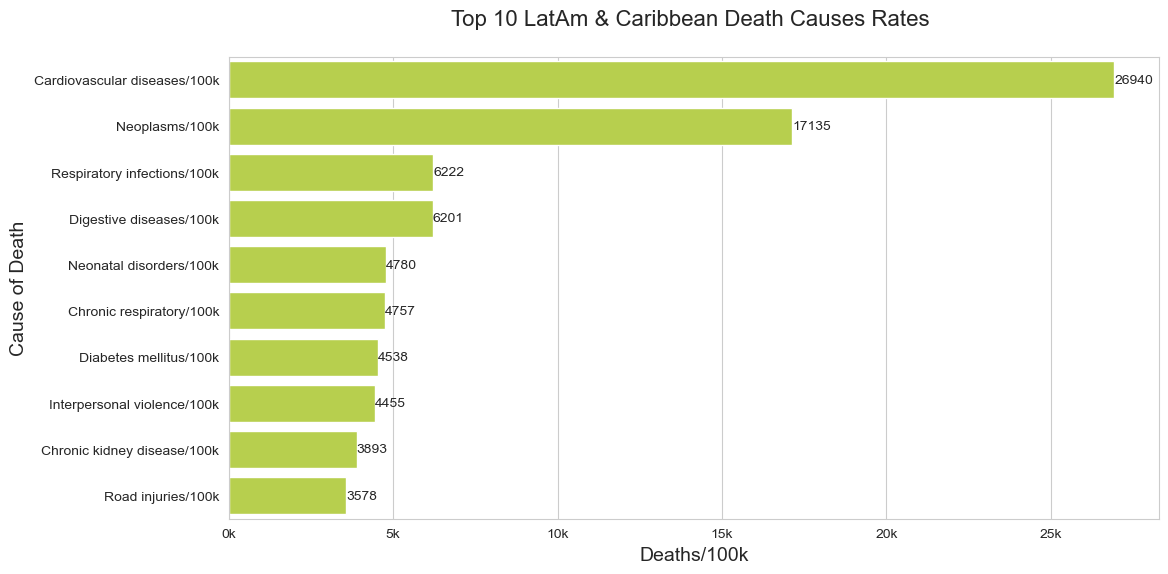

In [133]:
# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mean', y=latam_mean_rates['Cause'], data=latam_mean_rates, color='#C4E538')

# Adding values at the tips of the bars
for index, value in enumerate(latam_mean_rates['Mean']):
    ax.text(value, index, f'{value:.0f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Deaths/100k', fontsize = 14)
plt.ylabel('Cause of Death', fontsize = 14)
plt.title('Top 10 LatAm & Caribbean Death Causes Rates \n', fontsize = 16)

# Function to format x-axis tick labels as thousands
def format_ticks(value, _):
    return '{:.0f}k'.format(value * 1e-3)

# Format x-axis tick labels as thousands using the custom function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


- #### The Latin America & Caribbean region displays some characteristics similar to Argentina. Cardiovascular diseases and neoplasms as the two highest death rates. But it also shows some patterns that could be associated to low income countries, such as respiratory infections and high neonatal disorders death rates, or the presence of interpersonal violence and road injuries as part of the top 10 highest death rates. 

## $\color{blue}{\text{Argentina, Latin America & Caribbean and High Income Countries}}$
***

**First, I will evaluate how Latin America & Caribbean region and High Income Countries perform on Argentina's top 10 higher death rates. I will first do so by plotting a group bar chart.**

In [141]:
# These are the top 10 death rates in Argentina
arg_mean_rates

Cause      Mean
0      Cardiovascular diseases/100k  33476.87
1                    Neoplasms/100k  24683.32
2       Respiratory infections/100k   7898.22
3          Chronic respiratory/100k   5382.51
4           Digestive diseases/100k   4928.19
5       Chronic kidney disease/100k   4129.68
6            Diabetes mellitus/100k   3259.72
7  Alzheimer's/Other dementias/100k   3011.10
8               Liver diseases/100k   2350.11
9           Neonatal disorders/100k   2114.70

In [147]:
cause_list = arg_mean_rates['Cause']

0        Cardiovascular diseases/100k
1                      Neoplasms/100k
2         Respiratory infections/100k
3            Chronic respiratory/100k
4             Digestive diseases/100k
5         Chronic kidney disease/100k
6              Diabetes mellitus/100k
7    Alzheimer's/Other dementias/100k
8                 Liver diseases/100k
9             Neonatal disorders/100k
Name: Cause, dtype: object

In [139]:
# Building dataframe with mean rates of all death causes
latam_allmean_rates = pd.DataFrame()
latam_allmean_rates['Cause'] = latam_stats['index']
latam_allmean_rates['Mean'] = latam_stats['mean']
#latam_allmean_rates

In [153]:
# selecting the same death causes as in Argentina's top 10 death rates
LatamvsArgMeans = latam_allmean_rates[latam_allmean_rates['Cause'].isin(cause_list)]
type(LatamvsArgMeans)

pandas.core.frame.DataFrame

In [166]:
# Building dataframe with mean rates of all death causes
hiIncome_allmean_rates = pd.DataFrame()
hiIncome_allmean_rates['Cause'] = hi_income_stats['index']
hiIncome_allmean_rates['Mean'] = hi_income_stats['mean']
#hiIncome_allmean_rates

In [151]:
# selecting the same death causes as in Argentina's top 10 death rates
hiIncomevsArgMeans = hiIncome_allmean_rates[hiIncome_allmean_rates['Cause'].isin(cause_list)]
type(hiIncomevsArgMeans)

pandas.core.frame.DataFrame

In [165]:
# Merging the three dataframes to plot them together

df_combined = pd.merge(arg_mean_rates, LatamvsArgMeans, on='Cause', how='outer', suffixes=('_Arg', '_LatAm'))
df_combined = pd.merge(df_combined, hiIncomevsArgMeans, on='Cause', how='outer')
df_combined = df_combined.rename(columns={
    'Mean': 'High Income',
    'Mean_Arg': 'Argentina',
    'Mean_LatAm': 'LatAm'})
df_combined

Cause  Argentina     LatAm  High Income
0      Cardiovascular diseases/100k   33476.87  26940.32     37186.93
1                    Neoplasms/100k   24683.32  17135.32     28665.28
2       Respiratory infections/100k    7898.22   6221.67      3969.11
3          Chronic respiratory/100k    5382.51   4756.51      5418.59
4           Digestive diseases/100k    4928.19   6201.22      4795.91
5       Chronic kidney disease/100k    4129.68   3893.19      2363.61
6            Diabetes mellitus/100k    3259.72   4537.88      2425.38
7  Alzheimer's/Other dementias/100k    3011.10   2689.56      4905.24
8               Liver diseases/100k    2350.11   3445.93      2347.04
9           Neonatal disorders/100k    2114.70   4779.83       449.22

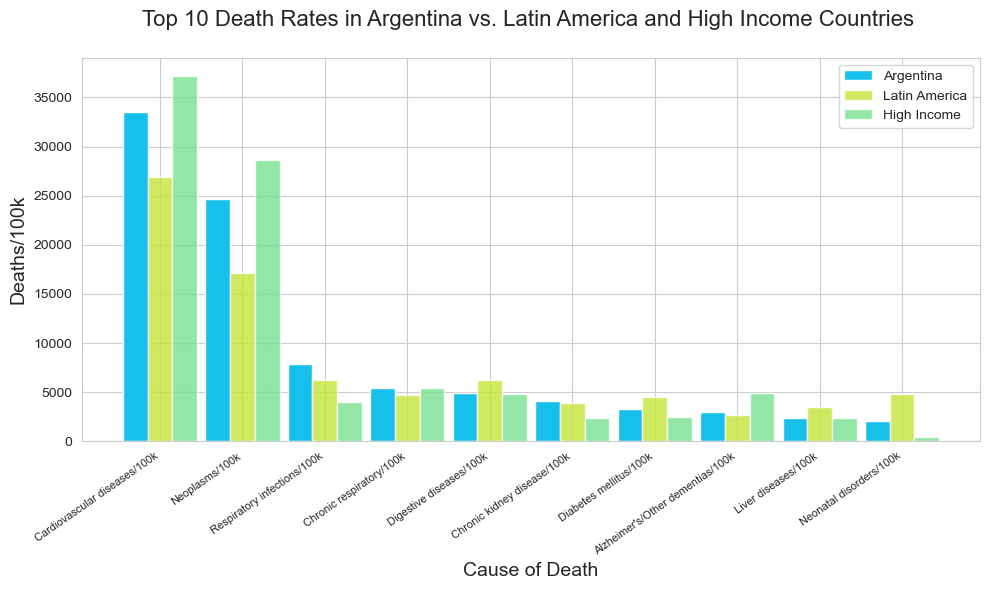

In [179]:
plt.figure(figsize=(10, 6))

# Bar widths
bar_width = 0.3 

# Creating an array of indices for each set of bars, to plot them side by side and not overlayed
indices = np.arange(len(df_combined['Cause']))

# Plotting Argentina data
plt.bar(indices, df_combined['Argentina'], width=bar_width, color='#17c0eb', label='Argentina')

# Plotting Latin America data next to Argentina data
plt.bar(indices + bar_width, df_combined['LatAm'], width=bar_width, color='#C4E538', label='Latin America', alpha=0.8)

# Plotting high-income data next to Argentina data
plt.bar(indices + 2 * bar_width, df_combined['High Income'], width=bar_width, color='#78e08f', label='High Income', alpha=0.8)

# Adding labels and title
plt.xlabel('Cause of Death', fontsize = 14)
plt.ylabel('Deaths/100k', fontsize = 14)
plt.title('Top 10 Death Rates in Argentina vs. Latin America and High Income Countries \n', fontsize=16)

# Set x-axis ticks and labels
plt.xticks(indices + bar_width, df_combined['Cause'], rotation=35, ha='right', fontsize = 8)

plt.legend()

plt.tight_layout()
plt.show()

- As expected, the highest death rates in each subset were those caused by cardiovascular diseases. This was something seen along all this project.
- Excluding Cardiovascular diseases and Neoplasms death rates, where Argentina and High Income countries show much higher rates than Latin America, the rest of the death rates do not seem to show considerable differences. An exception of this could appear in the death rates for Neonatal disorders, where high income countries have nearly zero deaths, while Argentina seems to be acting like an intermediate between the lowest high income rate and the highest Latin American rate for this cause.

***
### Testing the significance of the difference between Argentina's top 10 death rates and LatAm's

In [195]:
# Create an empty list to store DataFrames
dfs_to_concat = []

# Looping through each cause of death
for cause in cause_list: #arg_drates.columns[3:34]: to check all differences
    # Extract death rates for the cause from Argentina and Latam DataFrames
    data_argentina = arg_drates[cause]
    data_latam = latam_drates[cause]

    # Mann-Whitney U test
    U_statistic, p_value = mannwhitneyu(data_argentina, data_latam)

    # Create a DataFrame for the result
    result_argVSlatam = pd.DataFrame({
        'Cause': [cause],
        'U Statistic': [U_statistic],
        'P-value': [p_value]
    })
    
    # Append the DataFrame to the list
    dfs_to_concat.append(result_argVSlatam)

# Concatenate all DataFrames in the list
results_df = pd.concat(dfs_to_concat, ignore_index=True)

# Display the results DataFrame
results_df.sort_values('P-value', ascending=False, inplace=False)


Cause  U Statistic       P-value
5       Chronic kidney disease/100k        488.0  5.792942e-01
7  Alzheimer's/Other dementias/100k        572.0  7.244560e-02
2       Respiratory infections/100k        610.0  1.836796e-02
3          Chronic respiratory/100k        750.0  9.513938e-06
9           Neonatal disorders/100k         74.0  2.831449e-08
6            Diabetes mellitus/100k         22.0  2.609853e-10
0      Cardiovascular diseases/100k        900.0  3.019859e-11
1                    Neoplasms/100k        900.0  3.019859e-11
4           Digestive diseases/100k          0.0  3.019859e-11
8               Liver diseases/100k          0.0  3.019859e-11

**When comparing how Latin America & the Caribbean region performs on Argentina's Top 10 highest death causes rates, we can see that their rates are significantly different. Suggesting that Argentina is not behaving, in terms of its main death causes, like the rest of the region where it is located. 
There are here two exceptions to this, and those are:**

- Chronic kidney diseases death rates; 
- Alzheimer's and other dementias death rates.

**Argentina's and Latin America's death rates for these two causes are not significantly different.**

***
### Testing the significance of the difference between Argentina's death rates and those of the High Income Countries

**Although Argentina was not a high income country in the past three decades, and in spite of the subsequent economic crises this country went through, its public health service and policies are renowned as one of the best in the Latin American region. If so, it would be expected that Argentina's death causes rates had no significant differences with those of the rich countries, although this South American country is often classified as a Middle Income country.
I will test the significance of the possible differences between all death causes rates using the Mann-Whitney U test for non-parametric samples to compare the rates of Argentina with the rates of High Income countries.**

In [192]:
# Create an empty list to store DataFrames
dfs_to_concat = []

# Looping through each cause of death
for cause in arg_drates.columns[3:34]:#cause_list:
    # Extract death rates for the cause from Argentina and Latam DataFrames
    data_argentina = arg_drates[cause]
    data_hiInc = hi_income_rates[cause]

    # Mann-Whitney U test
    U_statistic, p_value = mannwhitneyu(data_argentina, data_hiInc)

    # Create a DataFrame for the result
    result_argVSincome = pd.DataFrame({
        'Cause': [cause],
        'U Statistic': [U_statistic],
        'P-value': [p_value]
    })
    
    # Append the DataFrame to the list
    dfs_to_concat.append(result_argVSincome)

# Concatenate all DataFrames in the list
results2_df = pd.concat(dfs_to_concat, ignore_index=True)

# Display the results DataFrame
results2_df.sort_values('P-value', ascending=False, inplace=False)


Cause  U Statistic       P-value
27                  Liver diseases/100k        446.0  9.587315e-01
26             Chronic respiratory/100k        459.0  8.999950e-01
17              Diarrheal diseases/100k        525.0  2.707053e-01
5                         Drowning/100k        547.0  1.536672e-01
4                          Malaria/100k        563.5  9.357674e-02
28              Digestive diseases/100k        612.0  1.695488e-02
25                   Road injuries/100k        661.0  1.857480e-03
2              Parkinson's disease/100k        236.0  1.596887e-03
10                    Tuberculosis/100k        685.0  5.264042e-04
14           Alcohol use disorders/100k        215.0  5.264042e-04
30                 Acute hepatitis/100k        691.0  3.769687e-04
20          Conflict and terrorism/100k        199.0  1.534792e-04
11         Cardiovascular diseases/100k        188.0  1.105773e-04
8                         HIV/AIDS/100k        717.0  8.146484e-05
16                Forces of Nature/100k        174.5  4.775756e-05
12          Respiratory infections/100k        806.0  1.473317e-07
1      Alzheimer's/Other dementias/100k         49.0  3.196740e-09
22          Chronic kidney disease/100k        878.0  2.609853e-10
23                      Poisonings/100k        886.0  1.205668e-10
15                            Self/100k          5.0  4.975166e-11
29  Fire, heat, and hot substances/100k        897.0  4.077165e-11
19                       Neoplasms/100k          0.0  3.019859e-11
21               Diabetes mellitus/100k        900.0  3.019859e-11
18              Heat/Cold Exposure/100k          0.0  3.019859e-11
13              Neonatal disorders/100k        900.0  3.019859e-11
24                         Protein/100k        900.0  3.019859e-11
9               Drug use disorders/100k          0.0  3.019859e-11
6           Interpersonal violence/100k        900.0  3.019859e-11
0                       Meningitis/100k        900.0  3.019859e-11
7               Maternal disorders/100k        900.0  3.017967e-11
3         Nutritional deficiencies/100k        900.0  3.017967e-11

**Against my previous assumption, Argentina's causes of death rates were significantly distinct to the vast majority of the rates from high income countries. This supports the idea that Argentina's death rates do not behave as high income countries death rates. Moreover, as we seen right above, Argentina also behaves mostly differently to the rest of Latin America & the Caribbean in terms of its death causes.
There were some exceptions in which Argentina and High Income countries behaved alike. Those were:**

- Liver diseases death rates;
- Chronic respiratory death rates;
- Diarrheal diseases death rates;
- Drowning death rates;
- Malaria death rates (mainly because that is an endemic disease from other regions)

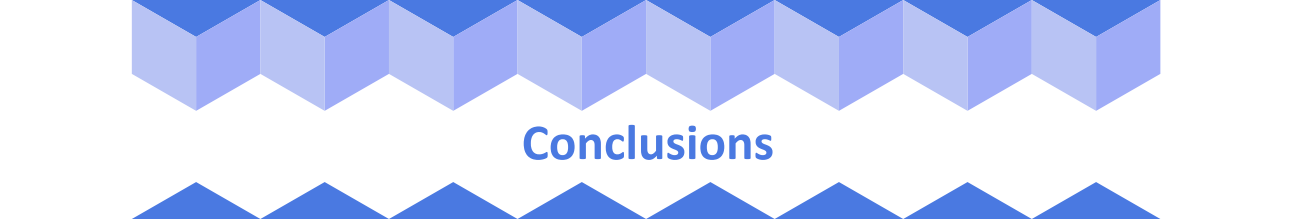

For this assignment I have selected a database that gathers data from the most recent publication of the **2019 Global Burden of Disease study by the Institute for Health Metrics and Evaluation (IHME)**, and the **Global Terrorism Database**.

This is a very rich database, spanning from 1990 to 2019, which allows to address an enormous amount of subjects and trends on causes of death at a worldwide scale. For this reason, here I explored only a portion of these subjects.

Firstly, after properly **cleaning and preparing the data**, I carried out a wide scope exploration of the information, seeking to **understand worldwide patterns and trends in the last three decades.** These are some of the most interesting facts I have found while doing so:

- Almost **1.5 billion** deaths were recorded in this dataset, covering a three decade timespan on a **global scale**.
- Along that period, the vast majority of deaths were due to **cardiovascular diseases**, followed by those caused by **neosplasms**. If we take into account the 10 most frequent death causes in the last 30 years, more than 50% of the deaths caused by these were due to cardiovascular diseases and neoplasms.
- Following these two causes, the third and fourth most frequent causes of death were those related to respiratory problems.
- It was surprising (and sad) to find that neonatal disorders was the fifth most common death cause in the last 30 years, since technology and medicine showed many advances in that area. Also, the presence of Tuberculosis as one of the top 10 most frequent causes of death is worrying, since it is a controlled disease in most of the countries.
- Among the most frequent causes of death, there were some that are **presumably associated to low income countries** (i.e. respiratory infections, tuberculosis, neonatal disorders, diarrheal diseases, HIV/AIDS, road injuries).

Condidering the rates of each death cause, these were the 10 causes that showed the highest death rates:

- Cardiovascular diseases
- Neoplasms
- Respiratory infections
- Neonatal disorders
- Digestive diseases
- Chronic respiratory diseases
- Diabetes mellitus
- HIV/AIDS
- Diarrheal diseases
- Road injuries.

***
Secondly, based on the fact that there is a continuously widening gap between the developed countries and the poorest communities of the developing world, and that this gap actively affects several aspects beyond economic indicators, such as the prevalence of different causes of death supposedly associated with high or low income countries, the main goal of the present work was to examine possible associations between the income level and distinct causes of death.
Following previous studies and reports, I assumed that countries with low income would show higher prevalence of deaths caused by infections, nutritional deficiencies, perinatal inconvenients, HIV/AIDS and road injuries, among others. If so, I would have expected to find a significant difference between the death rates of these causes in high income and low income countries.

After analyzing the subsets of high and low income countries separatedly, I found these to be the 10 highest death rates for each group:

- High Income Countries Main Death Rates:
    - Cardiovascular diseases
    - Neoplasms
    - Chronic Respiratory Diseases
    - Alzheimer's disease and other dementias
    - Digestive diseases
    - Respiratory infections
    - Diabetes mellitus
    - Chronic Kidney diseases
    - Liver Diseases
    - Self caused (i.e. suicides)
    
  

- Low Income Countries Main Death Rates:
    - Cardiovascular diseases
    - Neonatal disorders
    - Respiratory infections
    - HIV/AIDS
    - Diarrheal diseases
    - Malaria
    - Tuberculosis
    - Neoplasms
    - Digestive diseases
    - Nutritional deficiencies

As a next step, I analyzed the evolution of the death rates through time, considering the death causes that were presumably associated to one income level, and comparing those rates of high and low income countries. Next, I tested the significance of the differences between both income groups for each cause, using Mann-Whitney's U statistic. As a result of this, I found that all the differences were highly significant, meaning that there might be diseases strictly associated to each country's income level. The tested causes were: Respiratory infections, Neonatal disorders, Maternal disorders, Nutritional deficiencies, HIV/AIDS, Road injuries, Alzheimer's and other dementias, Drug use disorders and Alcohol use disorders.

***
The third objective of this project was to compare Argentine data on death causes to that of the region where the country is located: Latin America & Caribbean.


Argentina's top 10 causes with highest death rates were:

- Cardiovascular diseases
- Neoplasms
- Respiratory infections
- Chronic respiratory diseases
- Digestive diseases
- Chronic kidney diseases
- Diabetes
- Alzheimer's disease and other dementias
- Liver diseases
- Neonatal disorders

Latin America & Caribbean region showed these as the causes with highest rates:

- Cardiovascular diseases
- Neoplasms
- Respiratory infections
- Digestive diseases
- Neonatal disorders
- Chronic respiratory diseases
- Diabetes mellitus
- Interpersonal violence
- Chronic kidney diseases
- Road injuries.

The Latin America & Caribbean region displayed some characteristics similar to Argentina. Cardiovascular diseases and neoplasms as the two highest death rates. But it also shows some patterns that could be associated to low income countries, such as respiratory infections and high neonatal disorders death rates, or the presence of interpersonal violence and road injuries as part of the top 10 highest death rates. 

After this, I tested how Latin America & the Caribbean region performed on Argentina's Top 10 highest death causes rates. 
I found that their rates were significantly different. Suggesting that Argentina is not behaving, in terms of its main death causes, like the rest of the region where it is located. 
There were two exceptions to this:

- Chronic kidney diseases death rates; 
- Alzheimer's and other dementias death rates.

Argentina's and Latin America's death rates for these two causes were not significantly different.

***
Finally, after visually comparing Argentina, Latin America & Caribbean region and High Income countries in respect of their performance in Argentina's top 10 death rates, these three groups acted similarly. Thus, I tested for the significance of the difference between Argentina and the High Income countries death rates, again using Mann-Whitney's U statistic.

The results showed that these two groups showed significant differences between the death rates of all but 5 causes.

Therefore, despite of its renowned health system and policies, Argentina is significantly different in terms of its death causes to the high income countries. Moreover, it also behaves different than the geographic region where it is located, the Latin American & Caribbean region.

**My results suggest that there are some causes of death that may be associated with certain income levels, and Argentina shows characteristics of both high income countries and low income countries.**

Further studies are needed to better understand how death causes behave in each country and region, and to make diseases that are vastly erradicated or controlled disappear from low income countries.